### Importing all the necessary libraries

In [211]:
# loading packages
# basic + dates 
import numpy as np
import pandas as pd
from pandas import datetime
from datetime import datetime

# data visualization
import matplotlib.pyplot as plt
import matplotlib.style
plt.style.use('seaborn')
from pylab import rcParams
from sklearn import metrics #model performance metrics
import seaborn as sns # advanced vizs
%matplotlib inline

# statistics
from statsmodels.distributions.empirical_distribution import ECDF

# time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import warnings
warnings.filterwarnings("ignore")

# Problem 1: Rose Wine

For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.

In [212]:
df = pd.read_csv('Rose.csv')

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YearMonth  187 non-null    object 
 1   Rose       185 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.0+ KB


In [214]:
df.shape

(187, 2)

In [215]:
df.head()

YearMonth   Rose
0   1980-01  112.0
1   1980-02  118.0
2   1980-03  129.0
3   1980-04   99.0
4   1980-05  116.0

In [216]:
df.tail(5)

YearMonth  Rose
182   1995-03  45.0
183   1995-04  52.0
184   1995-05  28.0
185   1995-06  40.0
186   1995-07  62.0

## 1. Read the data as an appropriate Time Series data and plot the data.

In [217]:
Time_Stamp= pd.date_range(start='1/1/1980',end='8/1/1995',freq='M')
Time_Stamp

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [218]:
df['Time_Stamp'] = Time_Stamp
df.head()

YearMonth   Rose Time_Stamp
0   1980-01  112.0 1980-01-31
1   1980-02  118.0 1980-02-29
2   1980-03  129.0 1980-03-31
3   1980-04   99.0 1980-04-30
4   1980-05  116.0 1980-05-31

In [219]:
df.set_index(keys='Time_Stamp', inplace=True)
df.drop(['YearMonth'], axis=1, inplace=True)
df.head()

Rose
Time_Stamp       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0

In [220]:
df.tail()

Rose
Time_Stamp      
1995-03-31  45.0
1995-04-30  52.0
1995-05-31  28.0
1995-06-30  40.0
1995-07-31  62.0

### Renaming the column

In [221]:
df.rename(columns={'Rose':'Rose_Wine_Sales'}, inplace=True)
df.head()

Rose_Wine_Sales
Time_Stamp                 
1980-01-31            112.0
1980-02-29            118.0
1980-03-31            129.0
1980-04-30             99.0
1980-05-31            116.0

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-31 to 1995-07-31
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rose_Wine_Sales  185 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


### Checking for missing values

In [223]:
df.isnull().sum()

Rose_Wine_Sales    2
dtype: int64

In [224]:
df[df.isnull().values]

Rose_Wine_Sales
Time_Stamp                 
1994-07-31              NaN
1994-08-31              NaN

Since its a time series, we cannot remove the null values and hence it must be imputed.

### Plot the Time Series to understand the behaviour of the data.

Text(0, 0.5, 'Wine Units Sold')

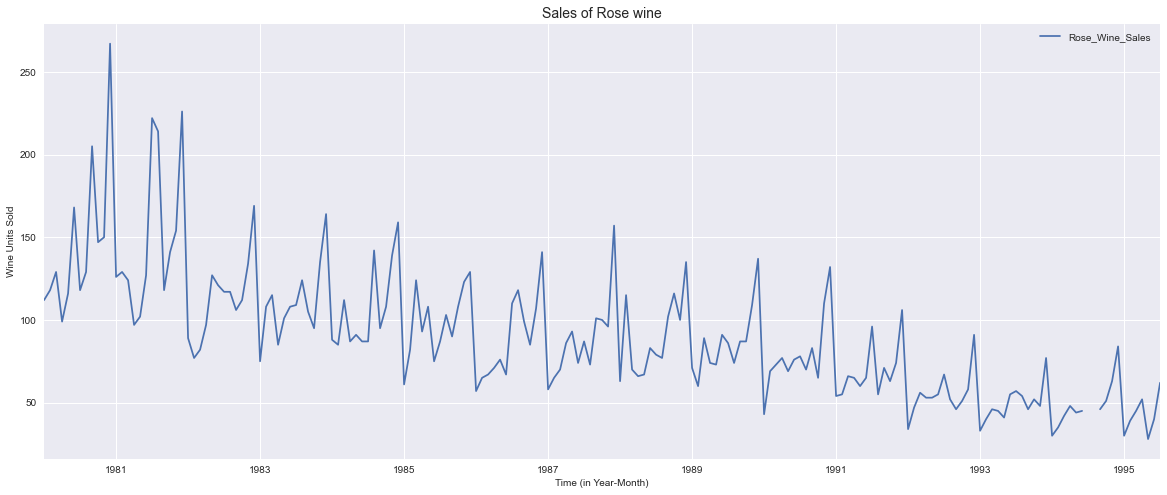

In [225]:
rcParams['figure.figsize'] = 20,8
df.plot(grid=True);
plt.title('Sales of Rose wine', fontsize=14)
plt.xlabel('Time (in Year-Month)',fontsize=10)
plt.ylabel('Wine Units Sold',fontsize=10)


## 2.2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

In [226]:
df.head()

Rose_Wine_Sales
Time_Stamp                 
1980-01-31            112.0
1980-02-29            118.0
1980-03-31            129.0
1980-04-30             99.0
1980-05-31            116.0

### Handling missing values

In [227]:
df.converted = df.Rose_Wine_Sales
temp = df.converted.resample('D').mean()
df.Rose_Wine_Sales = round(temp.interpolate(methods='linear'),2)
df.Rose_Wine_Sales['1994']

Time_Stamp
1994-01-31    30.00
1994-02-28    35.00
1994-03-31    42.00
1994-04-30    48.00
1994-05-31    44.00
1994-06-30    45.00
1994-07-31    45.34
1994-08-31    45.67
1994-09-30    46.00
1994-10-31    51.00
1994-11-30    63.00
1994-12-31    84.00
Name: Rose_Wine_Sales, dtype: float64

The missing values for the months of July and August have been imputed with linear interpolation 

In [228]:
df.isnull().sum()

Rose_Wine_Sales    0
dtype: int64

### Check the basic measures of descriptive statistics

In [229]:
df.describe()

Rose_Wine_Sales
count       187.000000
mean         89.914492
std          39.238264
min          28.000000
25%          62.500000
50%          85.000000
75%         111.000000
max         267.000000

1. The average sales of Rose wine is around 90 units
2. The minimuim quantity of sales recorded is 28 and the max is 267 units
3. Around 50% of the sales recorded in a month are around 85 units
4. Only 25% of the sales recorded in a month are above 111 units

### Plot a boxplot to understand the spread of sales across different years and within different months across years.

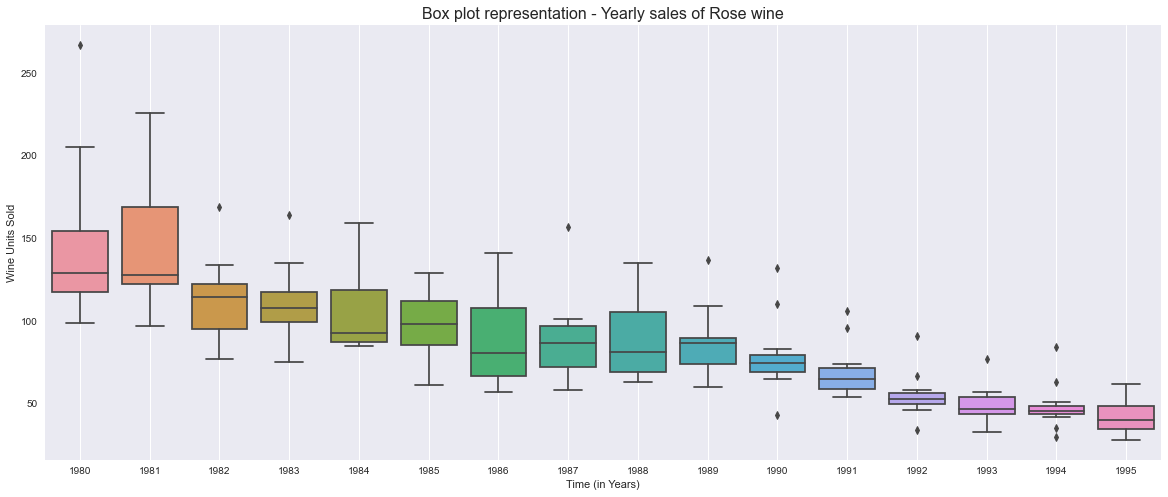

In [230]:
_, ax = plt.subplots(figsize=(20,8))
sns.boxplot(x = df.index.year,y = df.values[:,0],ax=ax)
plt.title('Box plot representation - Yearly sales of Rose wine', fontsize=16)
plt.xlabel('Time (in Years)')
plt.ylabel('Wine Units Sold')
plt.grid();

1. The sales of rose wine have gradually declined over the years
2. At the initial years, the sales were high with maximum sales happening in 1981.

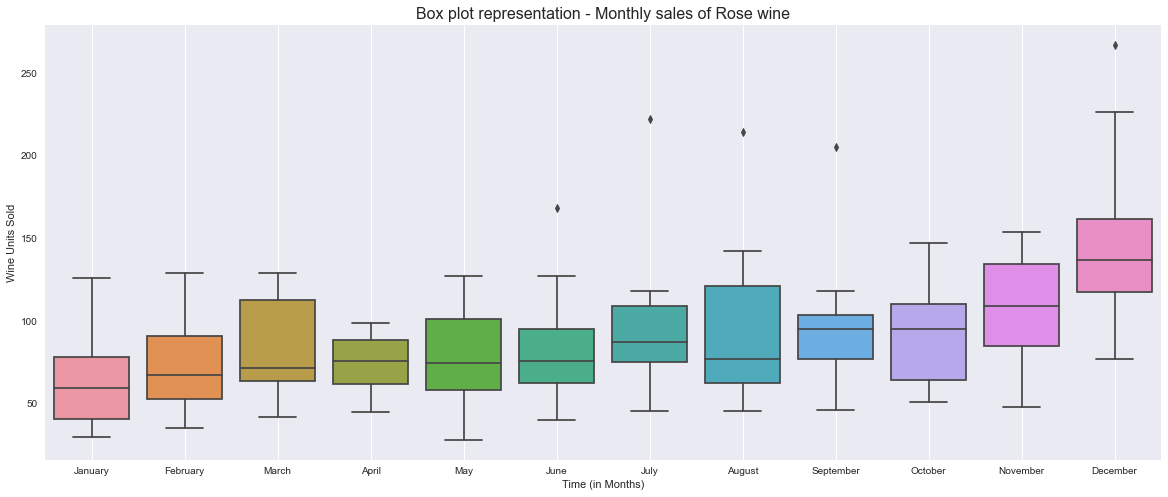

In [231]:
_, ax = plt.subplots(figsize=(20,8))
sns.boxplot(x = df.index.month_name(),y = df.values[:,0],ax=ax)
plt.title('Box plot representation - Monthly sales of Rose wine', fontsize=16)
plt.xlabel('Time (in Months)')
plt.ylabel('Wine Units Sold')
plt.grid();

1. December month records the highest average sales
2. The sales seems to usually pick in the last 4 months

Average order is greater in december and lowest in january

### Plot the empirical cumulative Distribution function

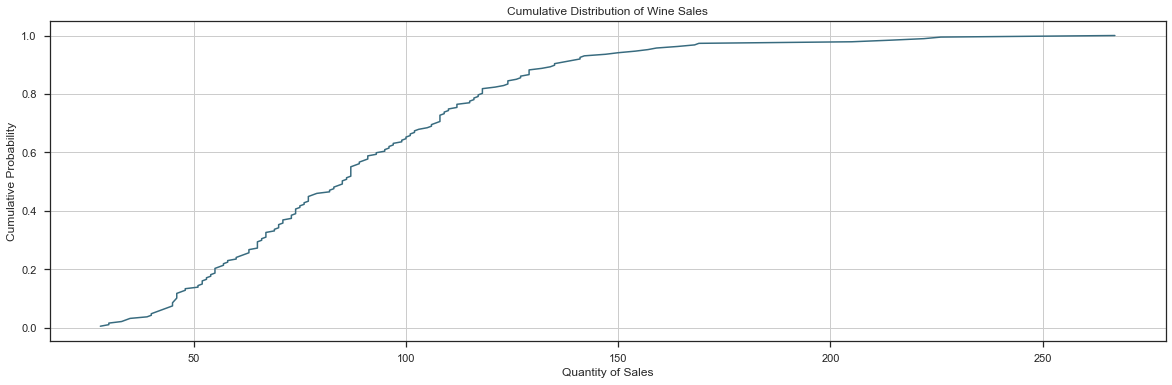

In [232]:
## Plot ECDF: Empirical Cumulative Distribution Function
#ECDF - Adds up the number of observations that are there for a certain value.
sns.set(style = "ticks")# to format into seaborn 
c = '#386B7F' # basic color for plots
plt.figure(figsize = (20, 20))


plt.subplot(312)
cdf = ECDF(df['Rose_Wine_Sales'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c)
plt.title('Cumulative Distribution of Wine Sales')
plt.xlabel('Quantity of Sales');
plt.ylabel('Cumulative Probability')
plt.grid(True)
plt.show()

1. Around 70 to 90% of the orders are within 100 to 150 units.

### Monthly sales across years.

In [233]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Rose_Wine_Sales', columns = df.index.month_name(), index = df.index.year)
monthly_sales_across_years

Time_Stamp  April  August  December  February  January    July   June  March  \
Time_Stamp                                                                     
1980         99.0  129.00     267.0     118.0    112.0  118.00  168.0  129.0   
1981         97.0  214.00     226.0     129.0    126.0  222.00  127.0  124.0   
1982         97.0  117.00     169.0      77.0     89.0  117.00  121.0   82.0   
1983         85.0  124.00     164.0     108.0     75.0  109.00  108.0  115.0   
1984         87.0  142.00     159.0      85.0     88.0   87.00   87.0  112.0   
1985         93.0  103.00     129.0      82.0     61.0   87.00   75.0  124.0   
1986         71.0  118.00     141.0      65.0     57.0  110.00   67.0   67.0   
1987         86.0   73.00     157.0      65.0     58.0   87.00   74.0   70.0   
1988         66.0   77.00     135.0     115.0     63.0   79.00   83.0   70.0   
1989         74.0   74.00     137.0      60.0     71.0   86.00   91.0   89.0   
1990         77.0   70.00     132.0      69.0     43.0   78.00   76.0   73.0   
1991         65.0   55.00     106.0      55.0     54.0   96.00   65.0   66.0   
1992         53.0   52.00      91.0      47.0     34.0   67.00   55.0   56.0   
1993         45.0   54.00      77.0      40.0     33.0   57.00   55.0   46.0   
1994         48.0   45.67      84.0      35.0     30.0   45.34   45.0   42.0   
1995         52.0     NaN       NaN      39.0     30.0   62.00   40.0   45.0   

Time_Stamp    May  November  October  September  
Time_Stamp                                       
1980        116.0     150.0    147.0      205.0  
1981        102.0     154.0    141.0      118.0  
1982        127.0     134.0    112.0      106.0  
1983        101.0     135.0     95.0      105.0  
1984         91.0     139.0    108.0       95.0  
1985        108.0     123.0    108.0       90.0  
1986         76.0     107.0     85.0       99.0  
1987         93.0      96.0    100.0      101.0  
1988         67.0     100.0    116.0      102.0  
1989         73.0     109.0     87.0       87.0  
1990         69.0     110.0     65.0       83.0  
1991         60.0      74.0     63.0       71.0  
1992         53.0      58.0     51.0       46.0  
1993         41.0      48.0     52.0       46.0  
1994         44.0      63.0     51.0       46.0  
1995         28.0       NaN      NaN        NaN

Text(0, 0.5, 'Wine Units Sold')

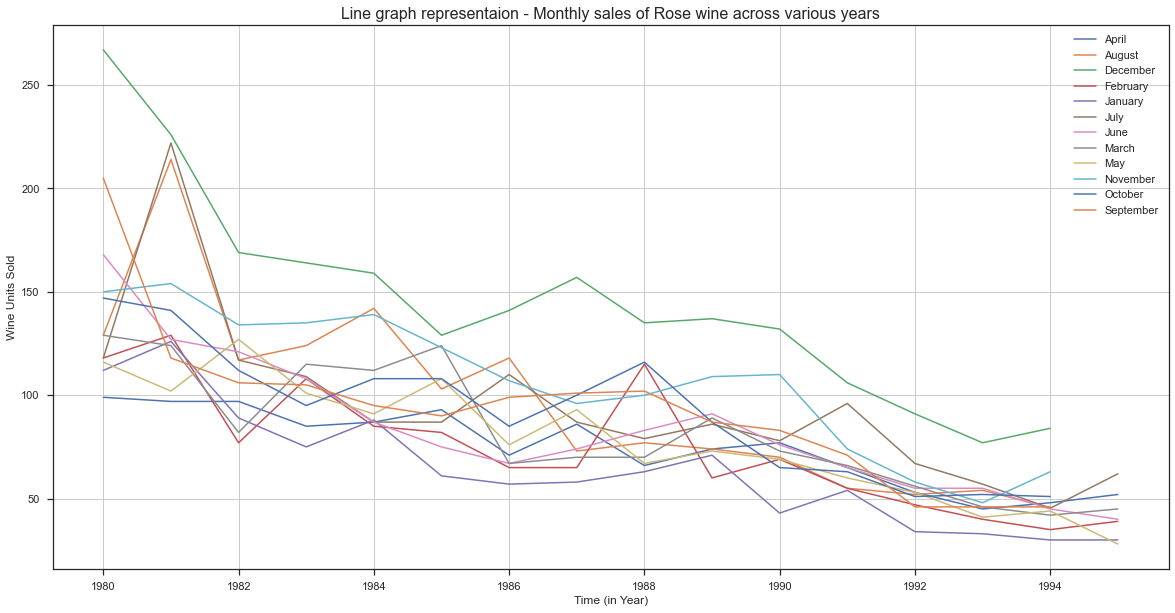

In [234]:
monthly_sales_across_years.plot(figsize=(20,10))
plt.grid();
plt.title('Line graph representaion - Monthly sales of Rose wine across various years', fontsize=16)
plt.legend(loc='best');
plt.xlabel('Time (in Year)')
plt.ylabel('Wine Units Sold')

1. December performed the best in terms of overall and average sales

### Resampling monthly data into a quarterly and yearly format

### Yearly plot

Let us try to resample or aggregate the Time Series from an annual perspective and sum up the observations of each month.

In [235]:
df_yearly_sum = df.resample('A').sum()
df_yearly_sum

Rose_Wine_Sales
Time_Stamp                 
1980-12-31          1758.00
1981-12-31          1780.00
1982-12-31          1348.00
1983-12-31          1324.00
1984-12-31          1280.00
1985-12-31          1183.00
1986-12-31          1063.00
1987-12-31          1060.00
1988-12-31          1073.00
1989-12-31          1038.00
1990-12-31           945.00
1991-12-31           830.00
1992-12-31           663.00
1993-12-31           594.00
1994-12-31           579.01
1995-12-31           296.00

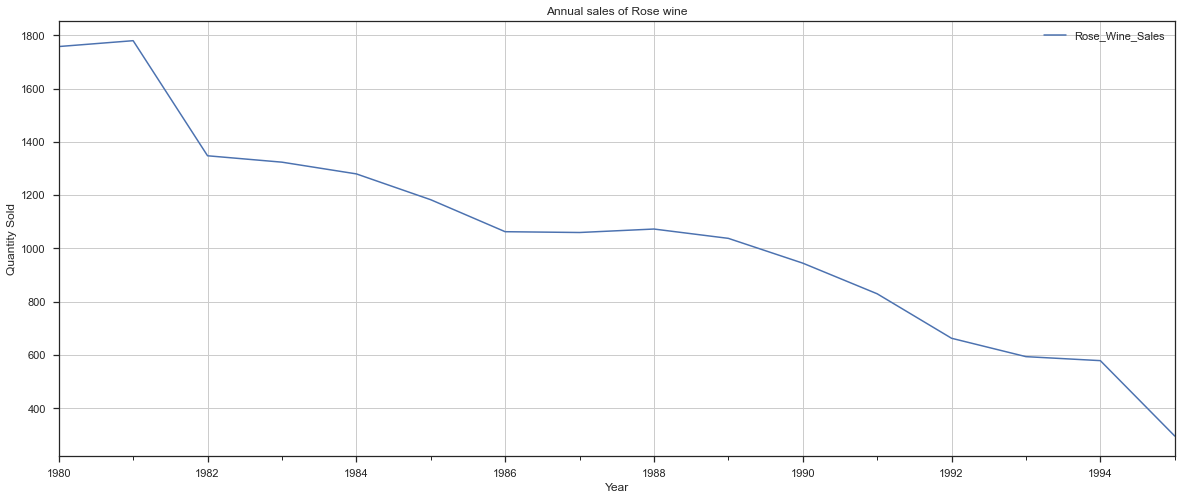

In [236]:
df_yearly_sum.plot();
plt.grid()
plt.title('Annual sales of Rose wine');
plt.xlabel('Year')
plt.ylabel('Quantity Sold');

Let us try to resample or aggregate the Time Series from an annual perspective and take the mean of the observations of the year considering each month as an observation.

### Quarterly Plot

In [237]:
df_quarterly_sum = df.resample('Q').sum()
df_quarterly_sum.head(10)

Rose_Wine_Sales
Time_Stamp                 
1980-03-31            359.0
1980-06-30            383.0
1980-09-30            452.0
1980-12-31            564.0
1981-03-31            379.0
1981-06-30            326.0
1981-09-30            554.0
1981-12-31            521.0
1982-03-31            248.0
1982-06-30            345.0

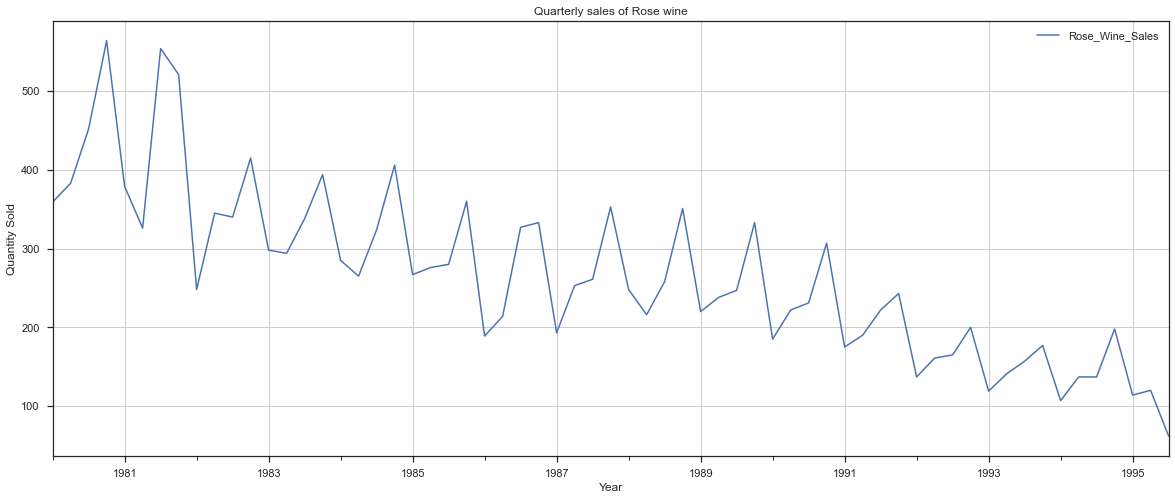

In [238]:
df_quarterly_sum.plot();
plt.grid()
plt.title('Quarterly sales of Rose wine');
plt.xlabel('Year')
plt.ylabel('Quantity Sold');

1. The sales are incresingly high in Q3 and Q4

### Month plot of times series

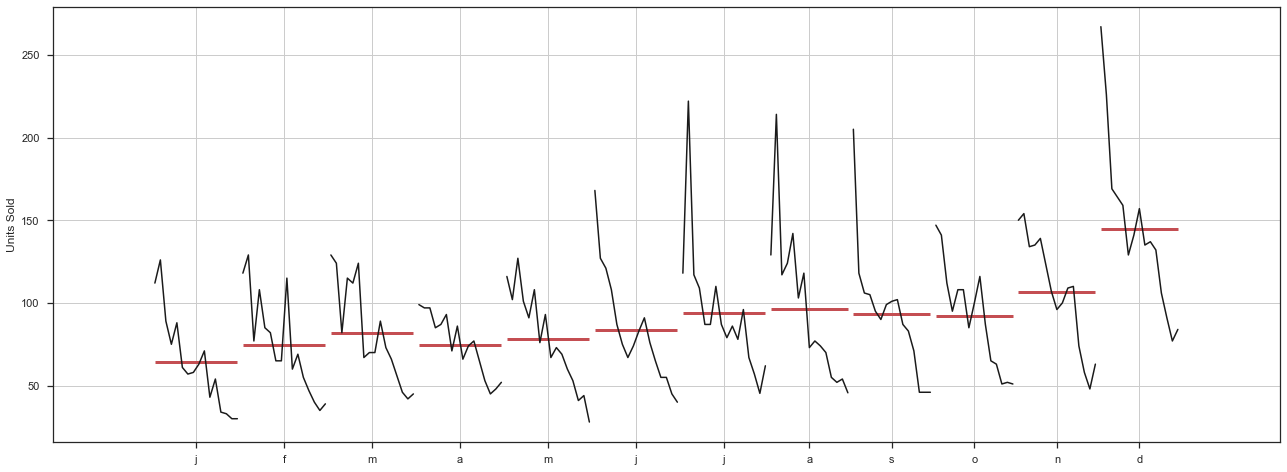

In [239]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(22,8))

month_plot(df,ylabel='Units Sold',ax=ax)
plt.grid();

### Plot the average sales per month and the month on month percentage change of sales.

In [240]:
df.groupby(by=df.index)["Rose_Wine_Sales"].mean()

Time_Stamp
1980-01-31    112.0
1980-02-29    118.0
1980-03-31    129.0
1980-04-30     99.0
1980-05-31    116.0
              ...  
1995-03-31     45.0
1995-04-30     52.0
1995-05-31     28.0
1995-06-30     40.0
1995-07-31     62.0
Name: Rose_Wine_Sales, Length: 187, dtype: float64

In [241]:
df.groupby(by=df.index)["Rose_Wine_Sales"].sum().pct_change()

Time_Stamp
1980-01-31         NaN
1980-02-29    0.053571
1980-03-31    0.093220
1980-04-30   -0.232558
1980-05-31    0.171717
                ...   
1995-03-31    0.153846
1995-04-30    0.155556
1995-05-31   -0.461538
1995-06-30    0.428571
1995-07-31    0.550000
Name: Rose_Wine_Sales, Length: 187, dtype: float64

Text(0, 0.5, '% Change')

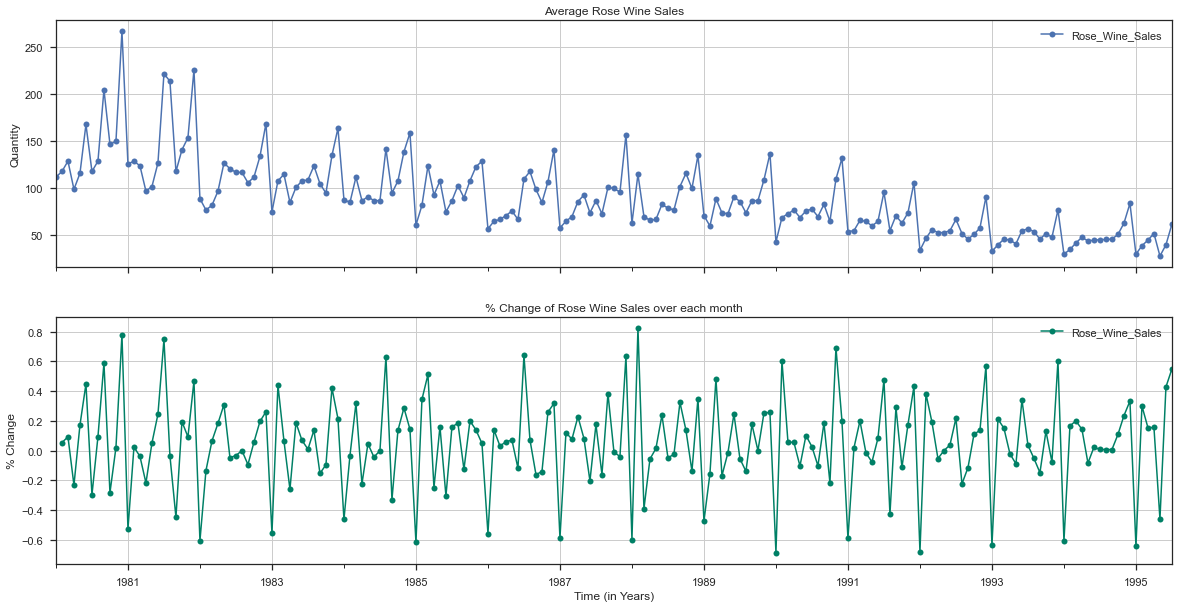

In [242]:
# group by date and get average RetailSales, and percent change
average    = df.groupby(by=df.index)["Rose_Wine_Sales"].mean()
pct_change = df.groupby(by=df.index)["Rose_Wine_Sales"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(20,10))
# plot average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Rose Wine Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
ax1.set_ylabel('Quantity')
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="% Change of Rose Wine Sales over each month",grid=True)
plt.xlabel('Time (in Years)')
ax2.set_ylabel('% Change')


1. Average Rose wine sales graph shows us a downward trend along with yearly seasonality present in it
2. % change graph shows us the seasonality of the change in sales to be constant throghout the lifetime of sales

### Decomposition of the Time Series

### Additive decomposition

<Figure size 1440x576 with 0 Axes>

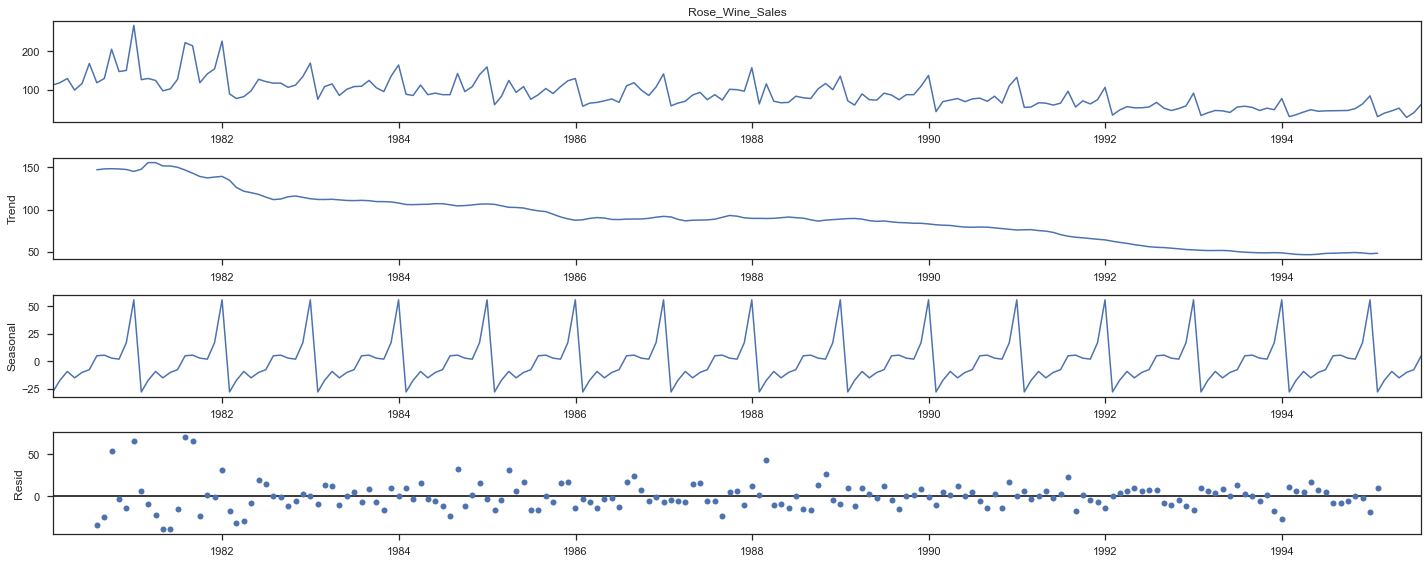

In [243]:
plt.figure(figsize=(20,8))
decomposition = seasonal_decompose(df['Rose_Wine_Sales'],model='additive')
decomposition.plot();
plt.show()

In [244]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31   -27.908702
1980-02-29   -17.435680
1980-03-31    -9.285889
1980-04-30   -15.098389
1980-05-31   -10.196603
1980-06-30    -7.678746
1980-07-31     4.897298
1980-08-31     5.499853
1980-09-30     2.774631
1980-10-31     1.871853
1980-11-30    16.846853
1980-12-31    55.713520
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31          NaN
1980-02-29          NaN
1980-03-31          NaN
1980-04-30          NaN
1980-05-31          NaN
1980-06-30          NaN
1980-07-31   -33.980631
1980-08-31   -24.624853
1980-09-30    53.850369
1980-10-31    -2.955187
1980-11-30   -14.263520
1980-12-31    66.16

### Multiplicative Decomposition

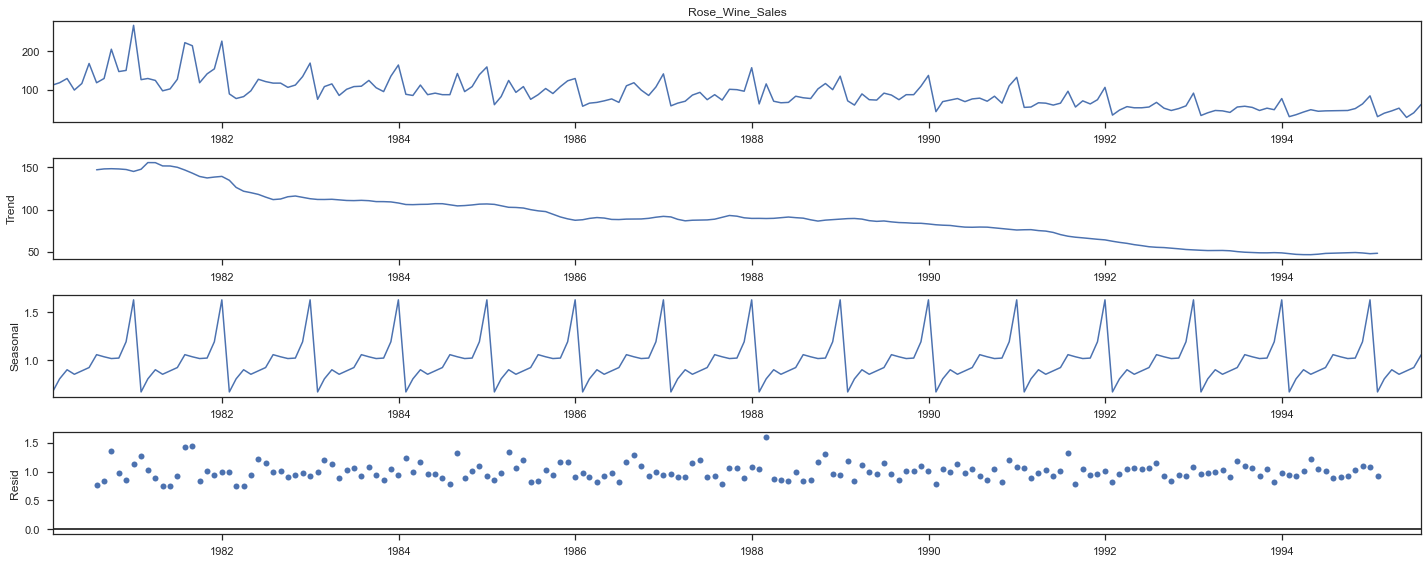

In [245]:
decomposition = seasonal_decompose(df['Rose_Wine_Sales'],model='multiplicative')
decomposition.plot();

In [246]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    0.670111
1980-02-29    0.806163
1980-03-31    0.901163
1980-04-30    0.854023
1980-05-31    0.889414
1980-06-30    0.923984
1980-07-31    1.058046
1980-08-31    1.035885
1980-09-30    1.017647
1980-10-31    1.022572
1980-11-30    1.192347
1980-12-31    1.628644
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    0.758253
1980-08-31    0.840717
1980-09-30    1.357675
1980-10-31    0.970772
1980-11-30    0.853379
1980-12-31    1.129647
Name: resid, dtype:

## 3. Split the data into training and test. The test data should start in 1991.

### Splitting the data into training and testing

In [247]:
train = df[df.index.year < 1991]
test = df[df.index.year >= 1991]

In [248]:
from IPython.display import display

In [249]:
print('First few rows of Training Data')
display(train.head(10))
print('Last few rows of Training Data')
display(train.tail(10))

First few rows of Training Data


Rose_Wine_Sales
Time_Stamp                 
1980-01-31            112.0
1980-02-29            118.0
1980-03-31            129.0
1980-04-30             99.0
1980-05-31            116.0
1980-06-30            168.0
1980-07-31            118.0
1980-08-31            129.0
1980-09-30            205.0
1980-10-31            147.0

Last few rows of Training Data


Rose_Wine_Sales
Time_Stamp                 
1990-03-31             73.0
1990-04-30             77.0
1990-05-31             69.0
1990-06-30             76.0
1990-07-31             78.0
1990-08-31             70.0
1990-09-30             83.0
1990-10-31             65.0
1990-11-30            110.0
1990-12-31            132.0

In [250]:
print('First few rows of Test Data')
display(test.head(10))
print('Last few rows of Test Data')
display(test.tail(10))

First few rows of Test Data


Rose_Wine_Sales
Time_Stamp                 
1991-01-31             54.0
1991-02-28             55.0
1991-03-31             66.0
1991-04-30             65.0
1991-05-31             60.0
1991-06-30             65.0
1991-07-31             96.0
1991-08-31             55.0
1991-09-30             71.0
1991-10-31             63.0

Last few rows of Test Data


Rose_Wine_Sales
Time_Stamp                 
1994-10-31             51.0
1994-11-30             63.0
1994-12-31             84.0
1995-01-31             30.0
1995-02-28             39.0
1995-03-31             45.0
1995-04-30             52.0
1995-05-31             28.0
1995-06-30             40.0
1995-07-31             62.0

In [251]:
print('-------------------------------------')
print('Number of observations in Train data   :  ',train.shape)
print('Number of observations in Test data    :  ',test.shape)
print('Total Observations                     :  ',test.shape[0]+train.shape[0])
print('-------------------------------------')

-------------------------------------
Number of observations in Train data   :   (132, 1)
Number of observations in Test data    :   (55, 1)
Total Observations                     :   187
-------------------------------------


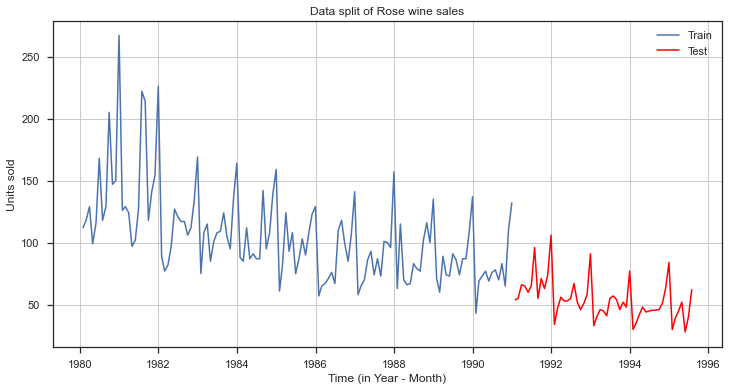

In [252]:
plt.figure(figsize = (12, 6))
plt.plot(train['Rose_Wine_Sales'], label = 'Train')
plt.plot(test['Rose_Wine_Sales'], label = 'Test', color='Red')
plt.legend(loc='best')
plt.xlabel('Time (in Year - Month)')
plt.ylabel('Units sold')
plt.title('Data split of Rose wine sales', fontsize = 12)
plt.show;
plt.grid();


## 4. Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE.

## Model 1: Linear Regression

In [253]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+len(train)+1 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('\n')
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]


Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


We see that we have successfully the generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.

In [254]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [255]:
LinearRegression_train['Time'] = train_time
LinearRegression_test['Time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Rose_Wine_Sales  Time
Time_Stamp                       
1980-01-31            112.0     1
1980-02-29            118.0     2
1980-03-31            129.0     3
1980-04-30             99.0     4
1980-05-31            116.0     5 

Last few rows of Training Data 
             Rose_Wine_Sales  Time
Time_Stamp                       
1990-08-31             70.0   128
1990-09-30             83.0   129
1990-10-31             65.0   130
1990-11-30            110.0   131
1990-12-31            132.0   132 

First few rows of Test Data 
             Rose_Wine_Sales  Time
Time_Stamp                       
1991-01-31             54.0   133
1991-02-28             55.0   134
1991-03-31             66.0   135
1991-04-30             65.0   136
1991-05-31             60.0   137 

Last few rows of Test Data 
             Rose_Wine_Sales  Time
Time_Stamp                       
1995-03-31             45.0   183
1995-04-30             52.0   184
1995-05-31        

Now that our training and test data has been modified, let us go ahead use $\underline{Linear Regression}$ to build the model on the training data and test the model on the test data.

In [256]:
from sklearn.linear_model import LinearRegression

In [257]:
lr = LinearRegression()

In [258]:
lr.fit(LinearRegression_train[['Time']],LinearRegression_train['Rose_Wine_Sales'].values)

LinearRegression()

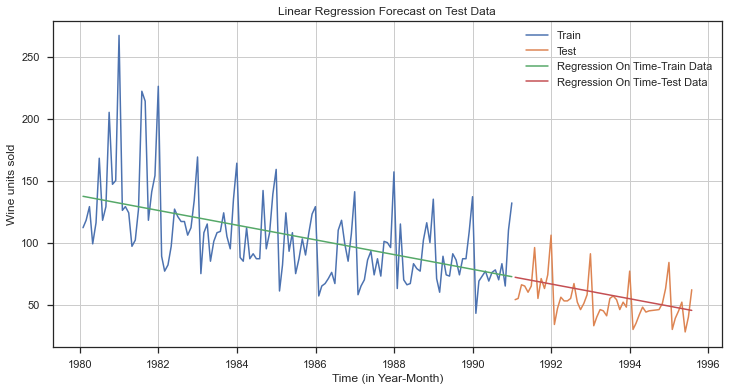

In [259]:
test_predictions_model1 = lr.predict(LinearRegression_test[['Time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

train_predictions_model1 = lr.predict(LinearRegression_train[['Time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

plt.figure(figsize=(12,6))
plt.title('Linear Regression Forecast on Test Data')
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine units sold')
plt.plot( train['Rose_Wine_Sales'], label='Train')
plt.plot(test['Rose_Wine_Sales'], label='Test')
plt.plot(LinearRegression_train['RegOnTime'], label='Regression On Time-Train Data')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time-Test Data')
plt.legend(loc='best')
plt.grid();

### Model evaluation - Linear Regression

In [260]:
# Test Data - RMSE

rmse_LR_test = metrics.mean_squared_error(test['Rose_Wine_Sales'],LinearRegression_test['RegOnTime'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_LR_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 15.269


In [261]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_LR_test]},index=['Linear Regression'])
resultsDf

Test RMSE
Linear Regression  15.268887

## Model 2: Naive Forecast ($\hat{y}_{t+1} = y_t$)

#### For this particular naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today,therefore the prediction for day after tomorrow is also today.

In [262]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [263]:
#Taking the last value in the train data
NaiveModel_test['naive'] = np.asarray(train['Rose_Wine_Sales'])[len(np.asarray(train['Rose_Wine_Sales']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
1991-01-31    132.0
1991-02-28    132.0
1991-03-31    132.0
1991-04-30    132.0
1991-05-31    132.0
Name: naive, dtype: float64

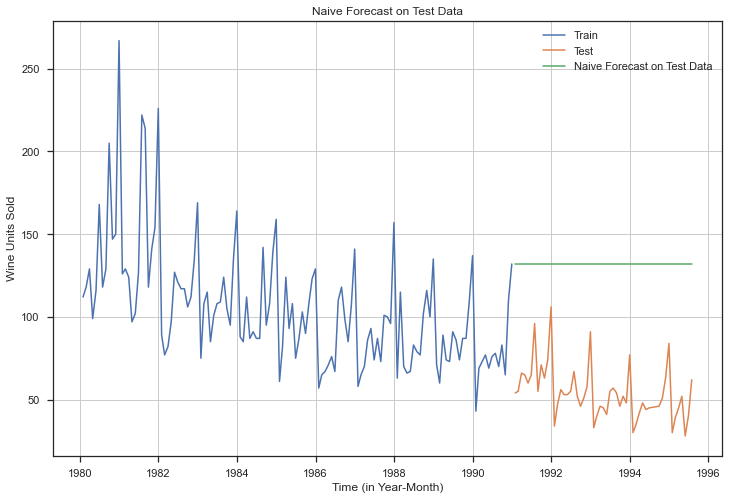

In [264]:
plt.figure(figsize=(12,8))
plt.title('Naive Forecast on Test Data')
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')
plt.plot(NaiveModel_train['Rose_Wine_Sales'], label='Train')
plt.plot(test['Rose_Wine_Sales'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.grid();

### Model Evauation - Naive Forecast Model

In [265]:
# Testing Data - RMSE and MAPE

rmse_Naive_test = metrics.mean_squared_error(test['Rose_Wine_Sales'],NaiveModel_test['naive'],squared=False)
print("For Naive forecast on the Testing Data:  RMSE is %3.3f " %(rmse_Naive_test))


For Naive forecast on the Testing Data:  RMSE is 79.719 


In [266]:
resultsDf2 = pd.DataFrame({'Test RMSE': [rmse_Naive_test]},index=['Naive Model'])

resultsDf = pd.concat([resultsDf, resultsDf2])
resultsDf

Test RMSE
Linear Regression  15.268887
Naive Model        79.718576

## Method 3: Simple Average

### For this particular simple average method, we will forecast by using the average of the training values.

In [267]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [268]:
SimpleAverage_test['mean_forecast'] = train['Rose_Wine_Sales'].mean()
SimpleAverage_test.head()

Rose_Wine_Sales  mean_forecast
Time_Stamp                                
1991-01-31             54.0     104.939394
1991-02-28             55.0     104.939394
1991-03-31             66.0     104.939394
1991-04-30             65.0     104.939394
1991-05-31             60.0     104.939394

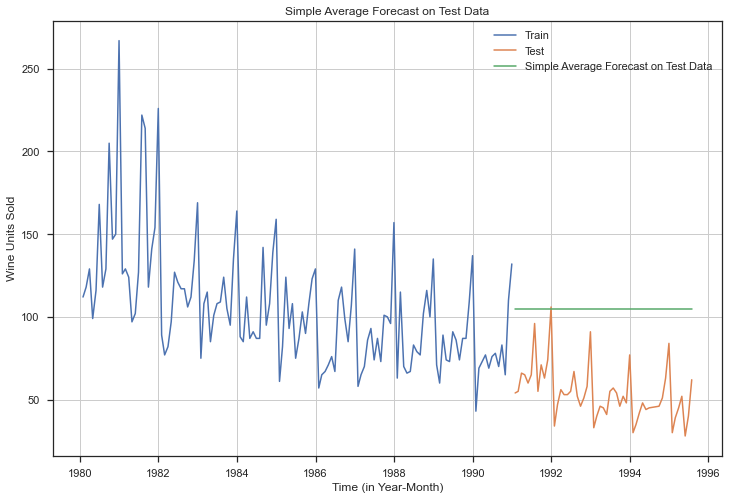

In [269]:
plt.figure(figsize=(12,8))
plt.title('Simple Average Forecast on Test Data')
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')
plt.plot(SimpleAverage_train['Rose_Wine_Sales'], label='Train')
plt.plot(SimpleAverage_test['Rose_Wine_Sales'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average Forecast on Test Data')
plt.legend(loc='best')
plt.grid();

### Model Evauation - Simple Average Model

In [270]:
## Test Data - RMSE 

rmse_simple_average_test = metrics.mean_squared_error(test['Rose_Wine_Sales'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_simple_average_test))

For Simple Average forecast on the Test Data,  RMSE is 53.460


In [271]:
resultsDf3 = pd.DataFrame({'Test RMSE': [rmse_simple_average_test]},index=['Simple Average'])

resultsDf = pd.concat([resultsDf, resultsDf3])
resultsDf

Test RMSE
Linear Regression  15.268887
Naive Model        79.718576
Simple Average     53.460367

## Model 4: Moving Average (MA)

### For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.

#### For Moving Average, we are going to average over the entire data.

In [272]:
MovingAverage = df.copy()
MovingAverage.head()

Rose_Wine_Sales
Time_Stamp                 
1980-01-31            112.0
1980-02-29            118.0
1980-03-31            129.0
1980-04-30             99.0
1980-05-31            116.0

#### Trailing moving averages

In [273]:
MovingAverage['Trailing_2'] = MovingAverage['Rose_Wine_Sales'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose_Wine_Sales'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose_Wine_Sales'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose_Wine_Sales'].rolling(9).mean()

MovingAverage.head(9)

Rose_Wine_Sales  Trailing_2  Trailing_4  Trailing_6  Trailing_9
Time_Stamp                                                                 
1980-01-31            112.0         NaN         NaN         NaN         NaN
1980-02-29            118.0       115.0         NaN         NaN         NaN
1980-03-31            129.0       123.5         NaN         NaN         NaN
1980-04-30             99.0       114.0      114.50         NaN         NaN
1980-05-31            116.0       107.5      115.50         NaN         NaN
1980-06-30            168.0       142.0      128.00  123.666667         NaN
1980-07-31            118.0       143.0      125.25  124.666667         NaN
1980-08-31            129.0       123.5      132.75  126.500000         NaN
1980-09-30            205.0       167.0      155.00  139.166667  132.666667

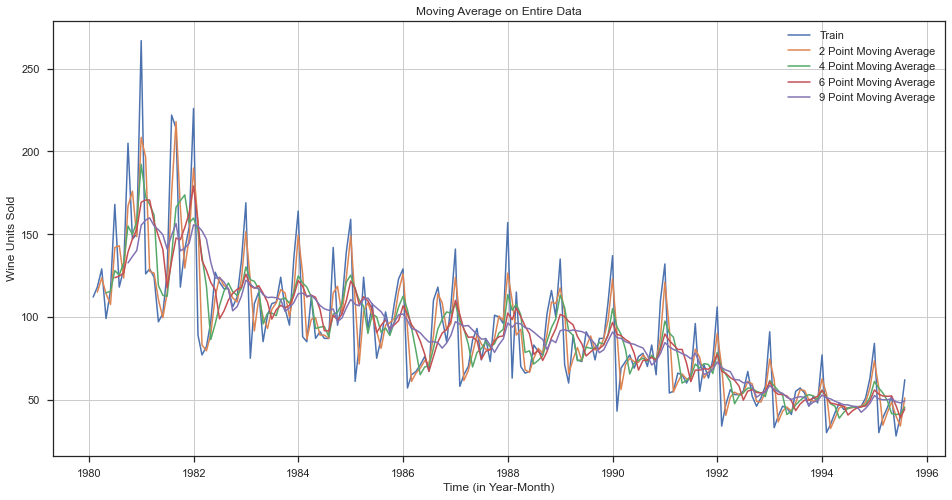

In [274]:
#Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Rose_Wine_Sales'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')
plt.title('Moving Average on Entire Data')
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')
plt.legend(loc = 'best')
plt.grid();

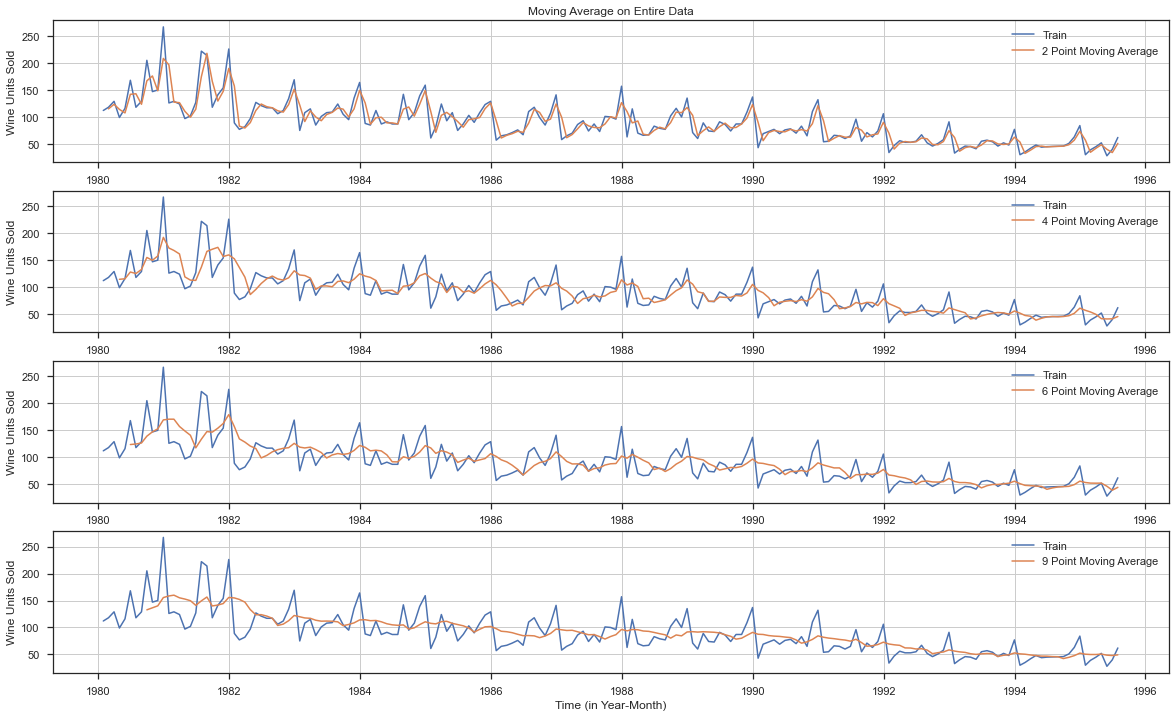

In [275]:
#Plotting on the whole data separately

plt.figure(figsize=(20,12))


plt.subplot(4,1,1)
plt.plot(MovingAverage['Rose_Wine_Sales'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.title('Moving Average on Entire Data')
plt.ylabel('Wine Units Sold')
plt.legend(loc = 'best')
plt.grid();

plt.subplot(4,1,2)
plt.plot(MovingAverage['Rose_Wine_Sales'], label='Train')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.ylabel('Wine Units Sold')
plt.legend(loc = 'best')
plt.grid();

plt.subplot(4,1,3)
plt.plot(MovingAverage['Rose_Wine_Sales'], label='Train')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.ylabel('Wine Units Sold')
plt.legend(loc = 'best')
plt.grid();

plt.subplot(4,1,4)
plt.plot(MovingAverage['Rose_Wine_Sales'], label='Train')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')
plt.ylabel('Wine Units Sold')
plt.xlabel('Time (in Year-Month)')
plt.legend(loc = 'best')

plt.grid();

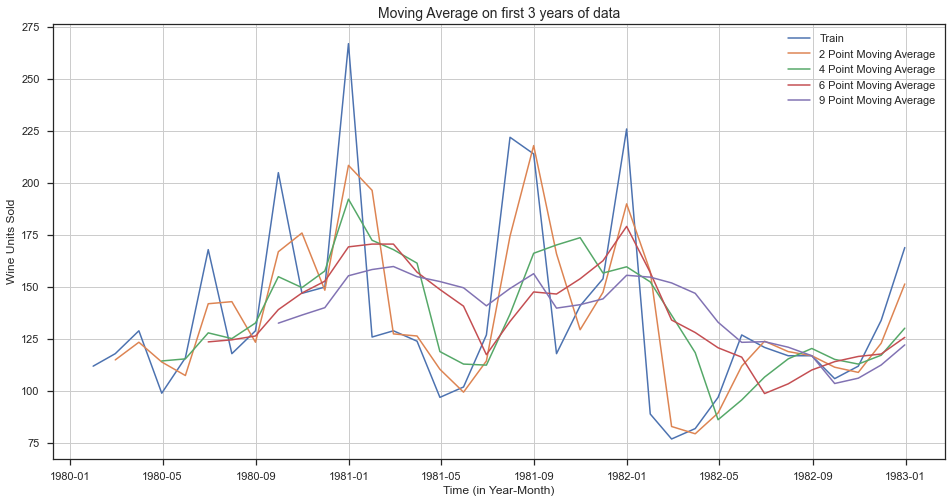

In [276]:
#Plotting on the first 3 years of data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Rose_Wine_Sales'].iloc[:-151], label='Train')
plt.plot(MovingAverage['Trailing_2'].iloc[:-151], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'].iloc[:-151], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'].iloc[:-151],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'].iloc[:-151],label = '9 Point Moving Average')
plt.title('Moving Average on first 3 years of data',fontsize=14)
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')
plt.legend(loc = 'best')
plt.grid();

In [277]:
#Creating train and test set 
trailing_MovingAverage_train = MovingAverage[MovingAverage.index.year < 1991]
trailing_MovingAverage_test = MovingAverage[MovingAverage.index.year >= 1991]

Text(0.5, 1.0, 'Trailing Moving Average Forecast on Rose Wine Sales')

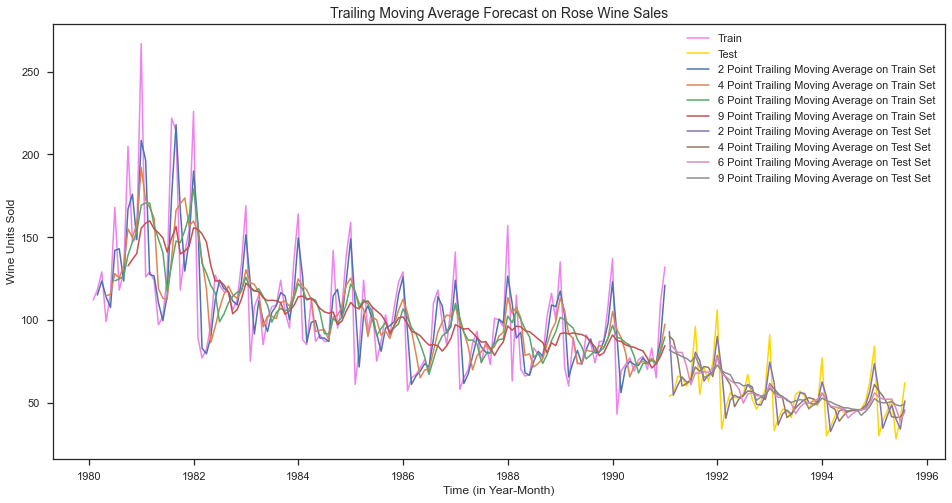

In [278]:
# Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Rose_Wine_Sales'], label='Train', color = 'violet')
plt.plot(trailing_MovingAverage_test['Rose_Wine_Sales'], label='Test', color = 'gold')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Train Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Train Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Train Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Train Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')

plt.title("Trailing Moving Average Forecast on Rose Wine Sales", fontsize=14)

Text(0.5, 1.0, 'Trailing Moving Average Forecast on Rose Wine Sales')

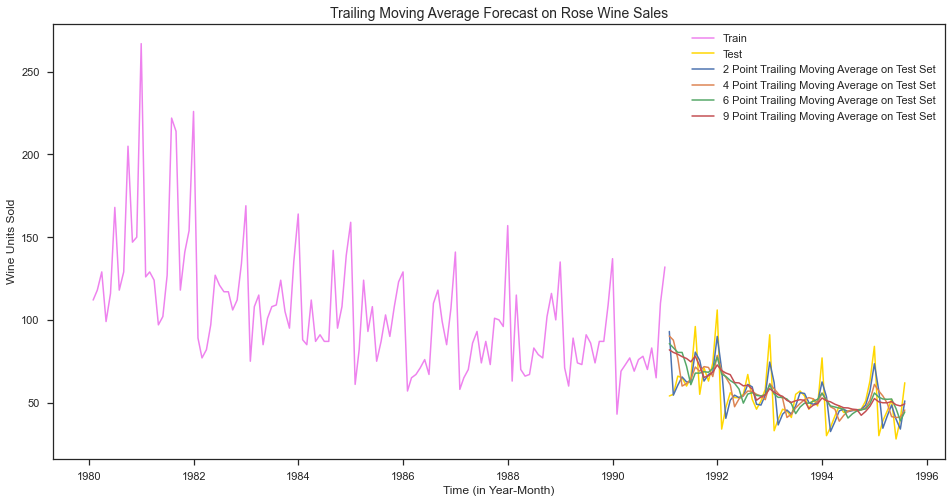

In [279]:
# Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Rose_Wine_Sales'], label='Train', color = 'violet')
plt.plot(trailing_MovingAverage_test['Rose_Wine_Sales'], label='Test', color = 'gold')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')

plt.title("Trailing Moving Average Forecast on Rose Wine Sales", fontsize=14)

Text(0.5, 1.0, 'Trailing Moving Average Forecast on Rose Wine Sales')

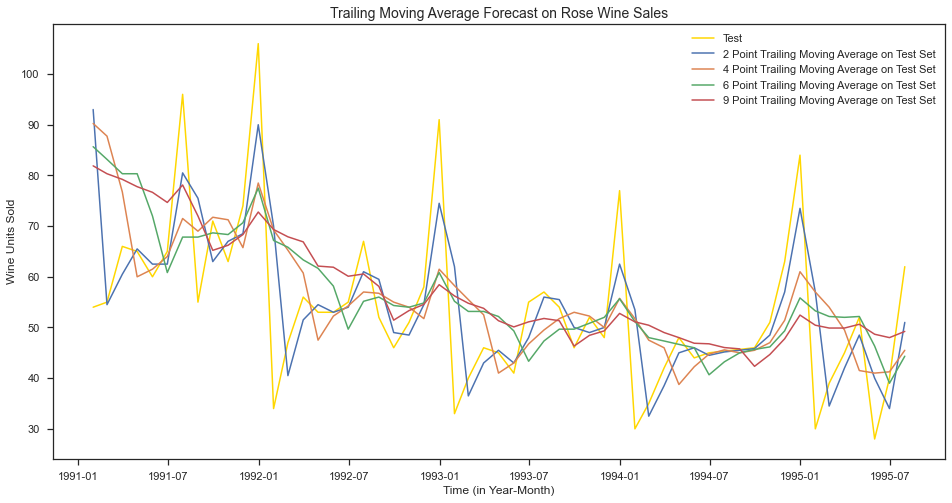

In [280]:
# Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_test['Rose_Wine_Sales'], label='Test', color = 'gold')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')

plt.title("Trailing Moving Average Forecast on Rose Wine Sales", fontsize=14)

### Model Evauation - Moving Average

In [281]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_MA_test_2 = metrics.mean_squared_error(test['Rose_Wine_Sales'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_MA_test_2))

## Test Data - RMSE --> 4 point Trailing MA

rmse_MA_test_4 = metrics.mean_squared_error(test['Rose_Wine_Sales'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_MA_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_MA_test_6 = metrics.mean_squared_error(test['Rose_Wine_Sales'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_MA_test_6))

## Test Data - RMSE --> 9 point Trailing MA

rmse_MA_test_9 = metrics.mean_squared_error(test['Rose_Wine_Sales'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_MA_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 11.529
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 14.451
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 14.566
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 14.728


In [282]:
resultsDf4 = pd.DataFrame({'Test RMSE': [rmse_MA_test_2,rmse_MA_test_4
                                          ,rmse_MA_test_6,rmse_MA_test_9]
                            }
                           ,index=['2 point TMA','4 point TMA'
                                   ,'6 point TMA','9 point TMA'])

resultsDf = pd.concat([resultsDf, resultsDf4])
resultsDf

Test RMSE
Linear Regression  15.268887
Naive Model        79.718576
Simple Average     53.460367
2 point TMA        11.529278
4 point TMA        14.451376
6 point TMA        14.566262
9 point TMA        14.727596

### Before we go on to build the various Exponential Smoothing models, let us plot all the models and compare the Time Series plots.

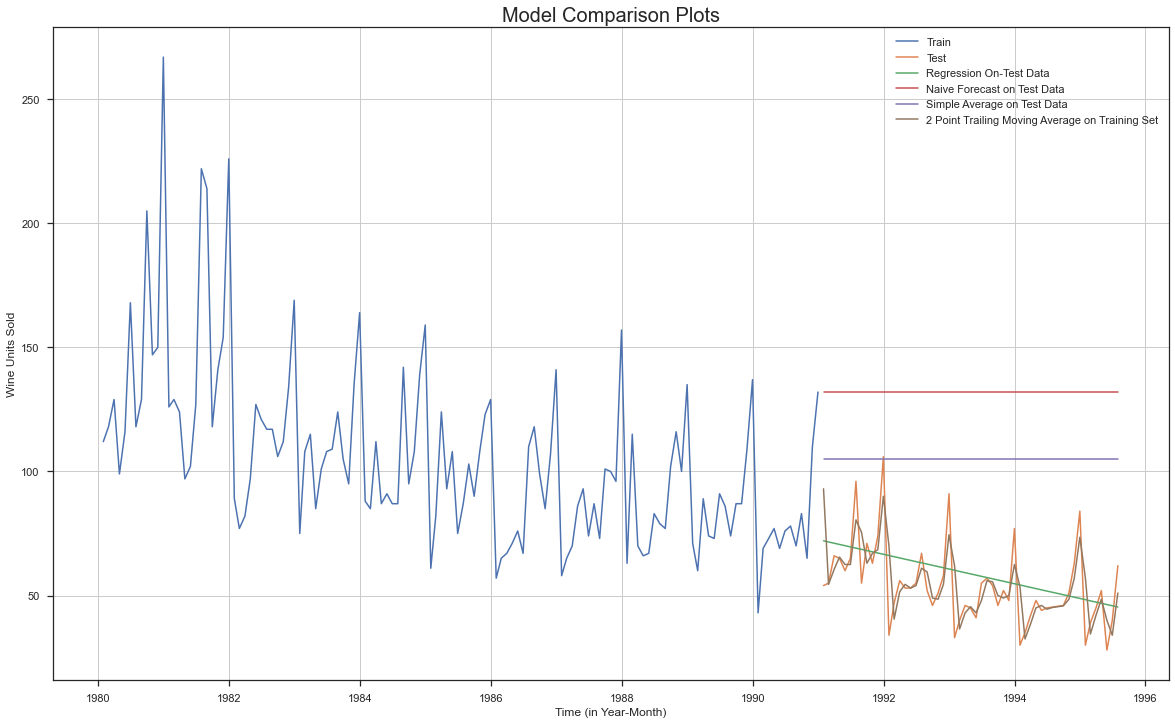

In [283]:
## Plotting on both Training and Test data

plt.figure(figsize=(20,12))
plt.plot(train['Rose_Wine_Sales'], label='Train')
plt.plot(test['Rose_Wine_Sales'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On-Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots",fontsize=20)
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')
plt.grid();

## Model 5: Simple Exponential Smoothing

In [284]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [285]:
SES_train = train.copy()
SES_test = test.copy()

In [286]:
model_SES = SimpleExpSmoothing(SES_train['Rose_Wine_Sales'])

In [287]:
# Fitting the Simple Exponential Smoothing model and asking python to choose the optimal parameters
model_SES_autofit = model_SES.fit(optimized=True)

In [288]:
model_SES_autofit.params

{'smoothing_level': 0.09874989825614361,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.38702255613862,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [289]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

Rose_Wine_Sales    predict
Time_Stamp                            
1991-01-31             54.0  87.104999
1991-02-28             55.0  87.104999
1991-03-31             66.0  87.104999
1991-04-30             65.0  87.104999
1991-05-31             60.0  87.104999

Text(0, 0.5, 'Wine Units Sold')

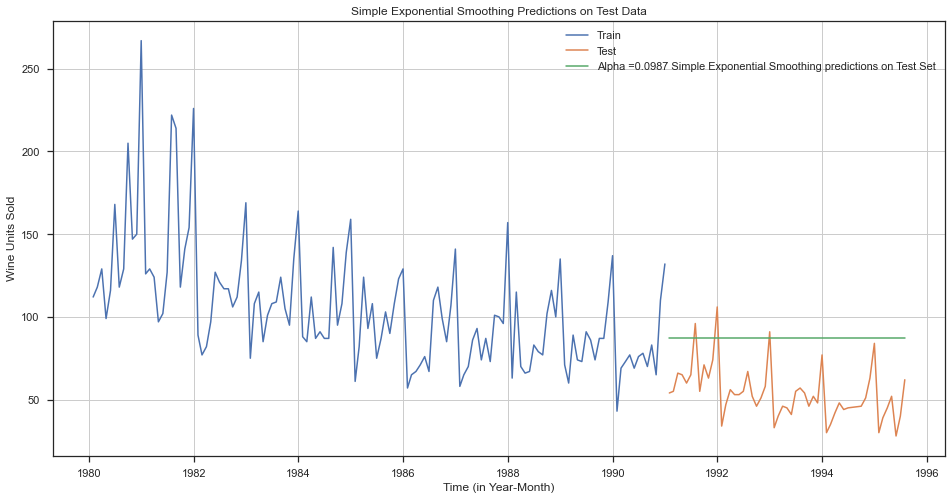

In [290]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Rose_Wine_Sales'], label='Train')
plt.plot(SES_test['Rose_Wine_Sales'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.0987 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple Exponential Smoothing Predictions on Test Data');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')

### Model Evaluation for $\alpha$ = 0.0987 : Simple Exponential Smoothing

In [291]:
## Test Data

rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Rose_Wine_Sales'],SES_test['predict'],squared=False)
print("For Alpha =0.0987 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))


For Alpha =0.0987 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 36.796


In [292]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha=0.0987,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

Test RMSE
Linear Regression                        15.268887
Naive Model                              79.718576
Simple Average                           53.460367
2 point TMA                              11.529278
4 point TMA                              14.451376
6 point TMA                              14.566262
9 point TMA                              14.727596
Alpha=0.0987,SimpleExponentialSmoothing  36.796036

#### Setting different alpha values.

###### Remember, the higher the alpha value more weightage is given to the more recent observation. That means, what happened recently will happen again.


#### We will run a loop with different alpha values to understand which particular value works best for alpha on the test set.

In [293]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_6

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Test RMSE]
Index: []

In [294]:
for i in np.arange(0.1,1,0.05):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=len(test))
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Rose_Wine_Sales'],SES_train['predict',i],squared=False)
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Rose_Wine_Sales'],SES_test['predict',i],squared=False)
    
    resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Test RMSE':rmse_model5_test_i}, ignore_index=True)

In [295]:
resultsDf_6.sort_values(by=['Test RMSE'],ascending=True)

Alpha Values  Train RMSE  Test RMSE
0           0.10   31.815610  36.827827
1           0.15   31.809845  38.721920
2           0.20   31.979391  41.361671
3           0.25   32.211871  44.360591
4           0.30   32.470164  47.504617
5           0.35   32.744341  50.665469
6           0.40   33.035130  53.767204
7           0.45   33.346578  56.766932
8           0.50   33.682839  59.641585
9           0.55   34.047042  62.378789
10          0.60   34.441171  64.971088
11          0.65   34.866356  67.412703
12          0.70   35.323261  69.697963
13          0.75   35.812435  71.820654
14          0.80   36.334596  73.773794
15          0.85   36.890835  75.549538
16          0.90   37.482782  77.139078
17          0.95   38.112735  78.532498

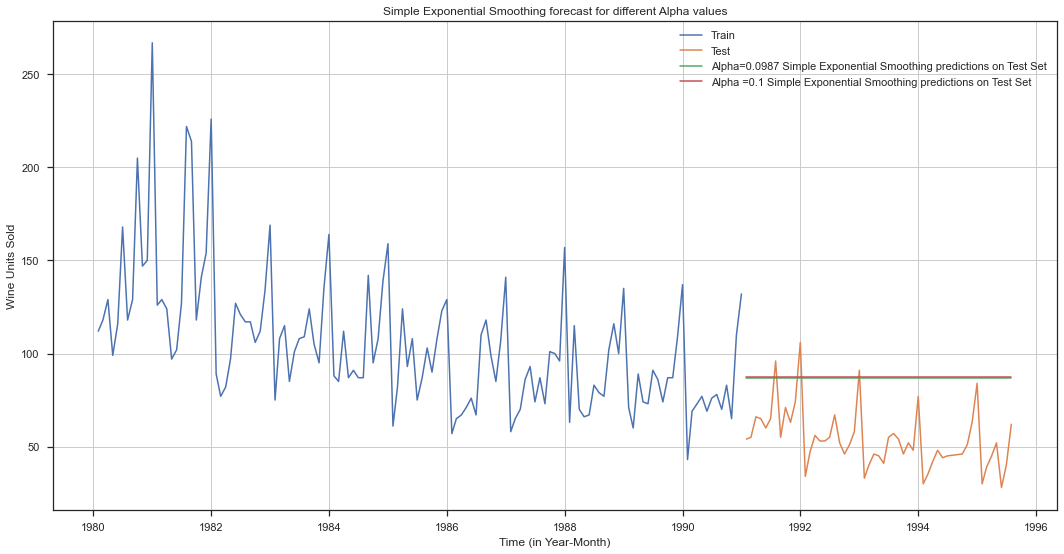

In [296]:
## Plotting on both the Training and Test data
model_SES_alpha_i = model_SES.fit(smoothing_level=0.1,optimized=False,use_brute=True)
SES_train['predict',0.1] = model_SES_alpha_i.fittedvalues
SES_test['predict',0.1] = model_SES_alpha_i.forecast(steps=len(test))

plt.figure(figsize=(18,9))
plt.plot(SES_train['Rose_Wine_Sales'], label='Train')
plt.plot(SES_test['Rose_Wine_Sales'], label='Test')

plt.plot(SES_test['predict'], label='Alpha=0.0987 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_test['predict',0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.title('Simple Exponential Smoothing forecast for different Alpha values')
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')
plt.grid();

## Method 6: Double Exponential Smoothing (Holt's Model)

### Two parameters $\alpha$ and $\beta$ are estimated in this model. Level and Trend are accounted for in this model.

In [297]:
DES_train = train.copy()
DES_test = test.copy()

In [298]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(DES_train,initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()

In [299]:
model_DES.params

{'smoothing_level': 1.4901247095597348e-08,
 'smoothing_trend': 7.3896641488640725e-09,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 137.81551313502814,
 'initial_trend': -0.4943777717865305,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [300]:
# Forecasting using this model for the test set
DES_test['predict'] =  model_DES.forecast(len(test))
DES_test['predict']

Time_Stamp
1991-01-31    72.063269
1991-02-28    71.568892
1991-03-31    71.074514
1991-04-30    70.580136
1991-05-31    70.085758
1991-06-30    69.591381
1991-07-31    69.097003
1991-08-31    68.602625
1991-09-30    68.108247
1991-10-31    67.613870
1991-11-30    67.119492
1991-12-31    66.625114
1992-01-31    66.130736
1992-02-29    65.636358
1992-03-31    65.141981
1992-04-30    64.647603
1992-05-31    64.153225
1992-06-30    63.658847
1992-07-31    63.164470
1992-08-31    62.670092
1992-09-30    62.175714
1992-10-31    61.681336
1992-11-30    61.186959
1992-12-31    60.692581
1993-01-31    60.198203
1993-02-28    59.703825
1993-03-31    59.209447
1993-04-30    58.715070
1993-05-31    58.220692
1993-06-30    57.726314
1993-07-31    57.231936
1993-08-31    56.737559
1993-09-30    56.243181
1993-10-31    55.748803
1993-11-30    55.254425
1993-12-31    54.760047
1994-01-31    54.265670
1994-02-28    53.771292
1994-03-31    53.276914
1994-04-30    52.782536
1994-05-31    52.288159
1994-

Text(0, 0.5, 'Wine Units Sold')

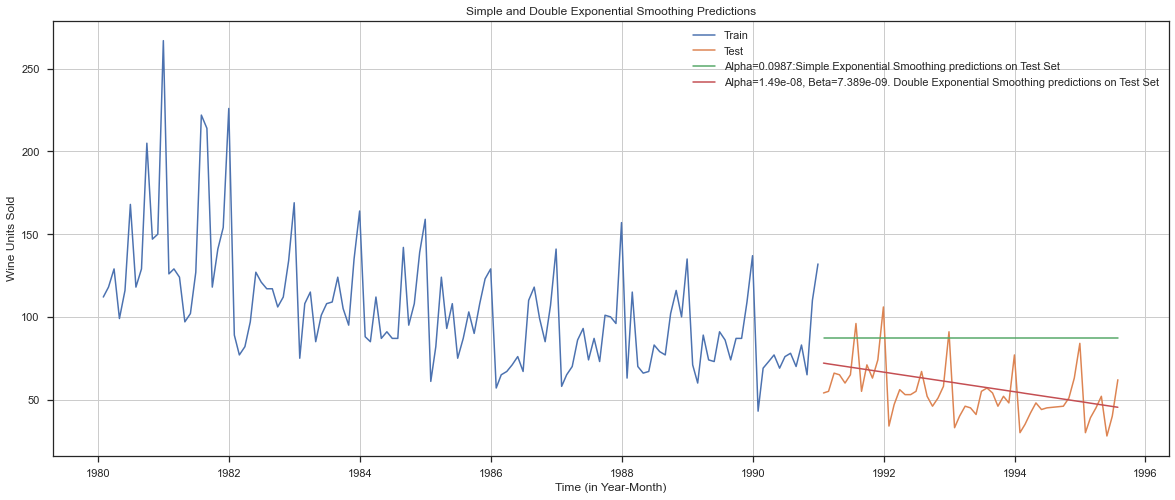

In [301]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(DES_train, label='Train')
plt.plot(DES_test['Rose_Wine_Sales'], label='Test')

plt.plot(SES_test['predict'], label='Alpha=0.0987:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_test['predict'], label='Alpha=1.49e-08, Beta=7.389e-09. Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')

### Model Evaluation - Double Exponential Smoothing(Holt's Model)

In [302]:
rmse_DES_test = metrics.mean_squared_error(DES_test['Rose_Wine_Sales'],DES_test['predict'],squared=False)
print("For DES forecast on the Rose Testing Data:  RMSE is %3.3f" %(rmse_DES_test))

For DES forecast on the Rose Testing Data:  RMSE is 15.269


In [303]:
resultsDf_6 = pd.DataFrame({'Test RMSE': [rmse_DES_test]},index=['Alpha=1.49e-08, Beta=7.389e-09, Double Exponential Smoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6])
resultsDf

Test RMSE
Linear Regression                                   15.268887
Naive Model                                         79.718576
Simple Average                                      53.460367
2 point TMA                                         11.529278
4 point TMA                                         14.451376
6 point TMA                                         14.566262
9 point TMA                                         14.727596
Alpha=0.0987,SimpleExponentialSmoothing             36.796036
Alpha=1.49e-08, Beta=7.389e-09, Double Exponent...  15.268889

In [304]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6 = pd.DataFrame({'Alpha':[],'Beta':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_6

Empty DataFrame
Columns: [Alpha, Beta, Train RMSE, Test RMSE]
Index: []

In [305]:
model_DES = Holt(DES_train['Rose_Wine_Sales'])
for i in np.arange(0.05,1.05,0.05):
    for j in np.arange(0.05,1.05,0.05):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(len(test))
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['Rose_Wine_Sales'],DES_train['predict',i,j],squared=False)
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['Rose_Wine_Sales'],DES_test['predict',i,j],squared=False)
        
        resultsDf_6 = resultsDf_6.append({'Alpha':i,'Beta':j,'Train RMSE':rmse_model6_train
                                          ,'Test RMSE':rmse_model6_test}, ignore_index=True)

In [306]:
resultsDf_6

Alpha  Beta  Train RMSE   Test RMSE
0     0.05  0.05   49.734056   31.526698
1     0.05  0.10   42.089518   34.791118
2     0.05  0.15   39.106563   23.716787
3     0.05  0.20   37.692373   37.795273
4     0.05  0.25   37.009649   33.598305
..     ...   ...         ...         ...
395   1.00  0.80   57.365879  853.965294
396   1.00  0.85   58.887365  848.483242
397   1.00  0.90   60.474309  834.710693
398   1.00  0.95   62.133606  812.112707
399   1.00  1.00   63.873454  780.079337

[400 rows x 4 columns]

In [307]:
resultsDf_6.sort_values(by=['Test RMSE']).head()

Alpha  Beta  Train RMSE  Test RMSE
6   0.05  0.35   36.233997  16.328994
5   0.05  0.30   36.616877  18.624520
2   0.05  0.15   39.106563  23.716787
0   0.05  0.05   49.734056  31.526698
7   0.05  0.40   35.783737  31.577953

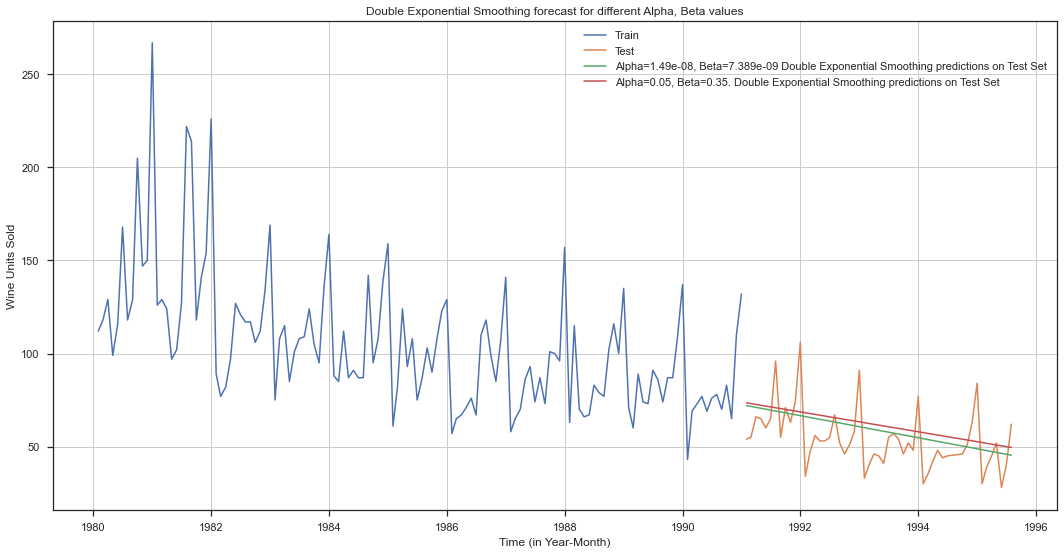

In [308]:
## Plotting on both the Training and Test data
model_DES_alpha_i_j = model_DES.fit(smoothing_level=0.05,smoothing_trend=0.35,optimized=False,use_brute=True)
DES_train['predict',0.05,0.35] = model_DES_alpha_i_j.fittedvalues
DES_test['predict',0.05,0.35] = model_DES_alpha_i_j.forecast(len(test))
        
plt.figure(figsize=(18,9))
plt.plot(DES_train['Rose_Wine_Sales'], label='Train')
plt.plot(DES_test['Rose_Wine_Sales'], label='Test')

plt.plot(DES_test['predict'], label='Alpha=1.49e-08, Beta=7.389e-09 Double Exponential Smoothing predictions on Test Set')

plt.plot(DES_test['predict',0.05,0.35], label='Alpha=0.05, Beta=0.35. Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.title('Double Exponential Smoothing forecast for different Alpha, Beta values')
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')
plt.grid();

## Method 7: Triple Exponential Smoothing (Holt - Winter's Model)

##### Three parameters $\alpha$, $\beta$ and $\gamma$ are estimated in this model. Level, Trend and Seasonality are accounted for in this model.

In [309]:
TES_train = train.copy()
TES_test = test.copy()

In [310]:
model_TES = ExponentialSmoothing(TES_train['Rose_Wine_Sales'],trend='additive',seasonal='multiplicative',freq='M')

In [311]:
model_TES_autofit = model_TES.fit()

The above fit of the model is by the best parameters that Python thinks for the model. It uses a brute force method to choose the parameters.

In [312]:
model_TES_autofit.params

{'smoothing_level': 0.06467234615091698,
 'smoothing_trend': 0.05315920636255018,
 'smoothing_seasonal': 0.0,
 'damping_trend': nan,
 'initial_level': 50.880912909225756,
 'initial_trend': -0.31656840824205823,
 'initial_seasons': array([2.21583703, 2.51439498, 2.74693025, 2.40118428, 2.69936273,
        2.94338111, 3.2353888 , 3.44052906, 3.26420741, 3.19365239,
        3.72269442, 5.13435788]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [313]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

Rose_Wine_Sales  auto_predict
Time_Stamp                               
1991-01-31             54.0     56.755640
1991-02-28             55.0     64.211013
1991-03-31             66.0     69.939833
1991-04-30             65.0     60.953618
1991-05-31             60.0     68.316934

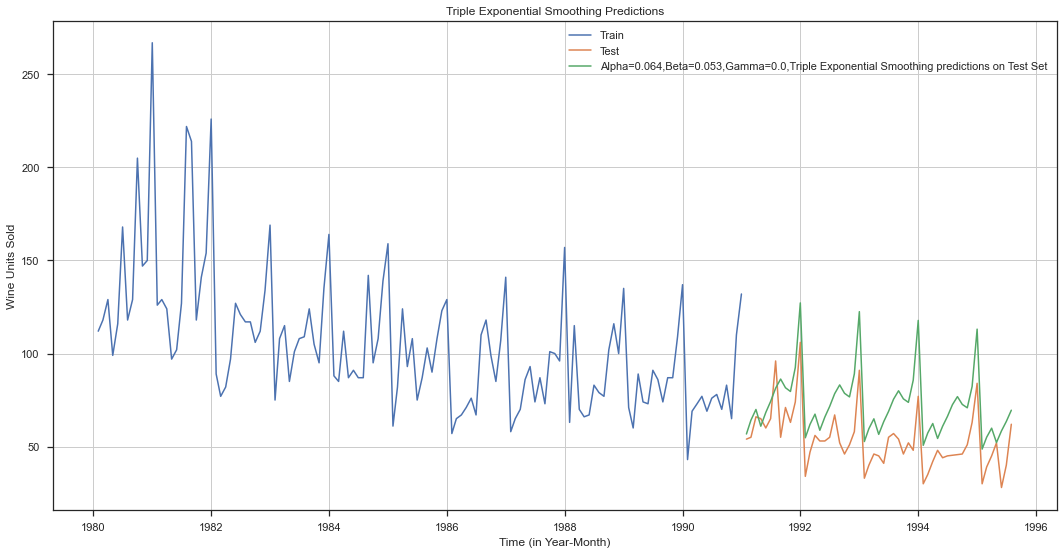

In [314]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose_Wine_Sales'], label='Train')
plt.plot(TES_test['Rose_Wine_Sales'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.064,Beta=0.053,Gamma=0.0,Triple Exponential Smoothing predictions on Test Set')


plt.legend(loc='best')
plt.title('Triple Exponential Smoothing Predictions');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')
plt.grid();

In [315]:
## Test Data

rmse_tes_test = metrics.mean_squared_error(TES_test['Rose_Wine_Sales'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.064,Beta=0.053,Gamma=0.0, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_tes_test))

For Alpha=0.064,Beta=0.053,Gamma=0.0, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 21.155


In [316]:
resultsDf_7 = pd.DataFrame({'Test RMSE': [rmse_tes_test]}
                           ,index=['Alpha=0.064,Beta=0.053,Gamma=0.0,Triple Exponential Smoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7])
resultsDf

Test RMSE
Linear Regression                                   15.268887
Naive Model                                         79.718576
Simple Average                                      53.460367
2 point TMA                                         11.529278
4 point TMA                                         14.451376
6 point TMA                                         14.566262
9 point TMA                                         14.727596
Alpha=0.0987,SimpleExponentialSmoothing             36.796036
Alpha=1.49e-08, Beta=7.389e-09, Double Exponent...  15.268889
Alpha=0.064,Beta=0.053,Gamma=0.0,Triple Exponen...  21.154527

Calculating the performance metrics for different values of alpha, beta and gamma

In [317]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_8_2 = pd.DataFrame({'Alpha':[],'Beta':[],'Gamma':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_8_2

Empty DataFrame
Columns: [Alpha, Beta, Gamma, Train RMSE, Test RMSE]
Index: []

In [318]:
for i in np.arange(0.1,1.05,0.05):
    for j in np.arange(0.1,1.05,0.05):
        for k in np.arange(0.1,1.05,0.05):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['Rose_Wine_Sales'],TES_train['predict',i,j,k],squared=False)
            
            rmse_model8_test = metrics.mean_squared_error(TES_test['Rose_Wine_Sales'],TES_test['predict',i,j,k],squared=False)
            
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha':i,'Beta':j,'Gamma':k,
                                                  'Train RMSE':rmse_model8_train,'Test RMSE':rmse_model8_test}
                                                 , ignore_index=True)

In [319]:
resultsDf_8_2

Alpha  Beta  Gamma    Train RMSE     Test RMSE
0       0.1   0.1   0.10     25.216699     12.790620
1       0.1   0.1   0.15     24.491908     12.166846
2       0.1   0.1   0.20     24.057626     11.913919
3       0.1   0.1   0.25     23.795299     11.828353
4       0.1   0.1   0.30     23.645037     11.849683
...     ...   ...    ...           ...           ...
6854    1.0   1.0   0.80   1218.755446   9626.710917
6855    1.0   1.0   0.85   4624.219888  35513.540733
6856    1.0   1.0   0.90  14150.253251   9691.905406
6857    1.0   1.0   0.95   7765.182800  20404.811710
6858    1.0   1.0   1.00   1768.254189   8138.618610

[6859 rows x 5 columns]

In [320]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

Alpha  Beta  Gamma  Train RMSE  Test RMSE
1008    0.2  0.85   0.15   30.302008   9.121757
951     0.2  0.70   0.15   29.220767   9.447912
21      0.1  0.15   0.20   24.197704   9.620332
39      0.1  0.20   0.15   24.798001   9.626348
40      0.1  0.20   0.20   24.365597   9.640614

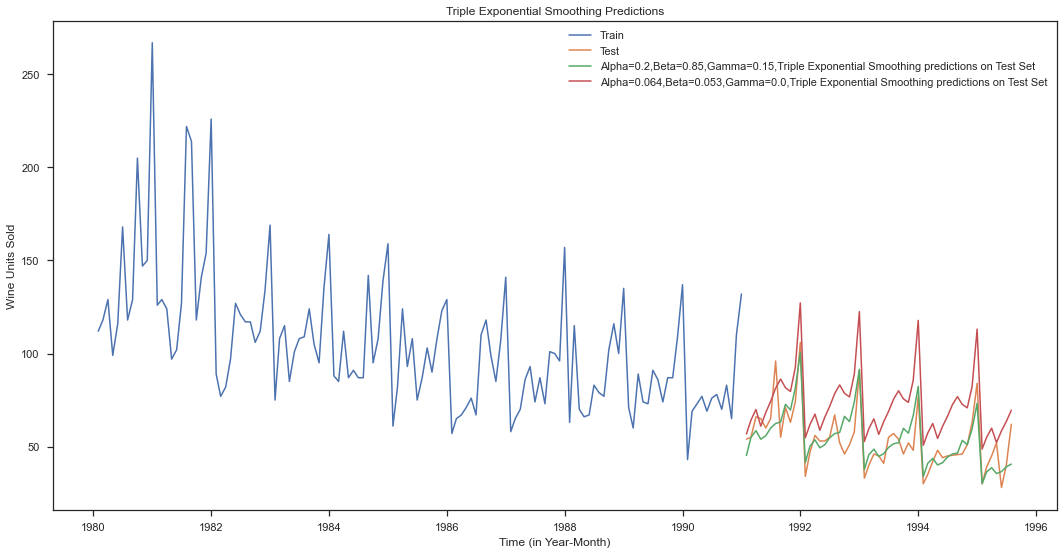

In [321]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination
model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=0.2,smoothing_trend=0.85,smoothing_seasonal=0.15,optimized=False,use_brute=True)
TES_train['predict',0.2,0.85,0.15] = model_TES_alpha_i_j_k.fittedvalues
TES_test['predict',0.2,0.85,0.15] = model_TES_alpha_i_j_k.forecast(steps=len(test))
rmse_tes_test_lowest = metrics.mean_squared_error(TES_test['Rose_Wine_Sales'],TES_test['predict',0.2,0.85,0.15],squared=False)

plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose_Wine_Sales'], label='Train')
plt.plot(TES_test['Rose_Wine_Sales'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict', 0.2,0.85,0.15], label='Alpha=0.2,Beta=0.85,Gamma=0.15,Triple Exponential Smoothing predictions on Test Set')

plt.plot(TES_test['auto_predict'], label='Alpha=0.064,Beta=0.053,Gamma=0.0,Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.title('Triple Exponential Smoothing Predictions');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')
plt.grid();
plt.grid();

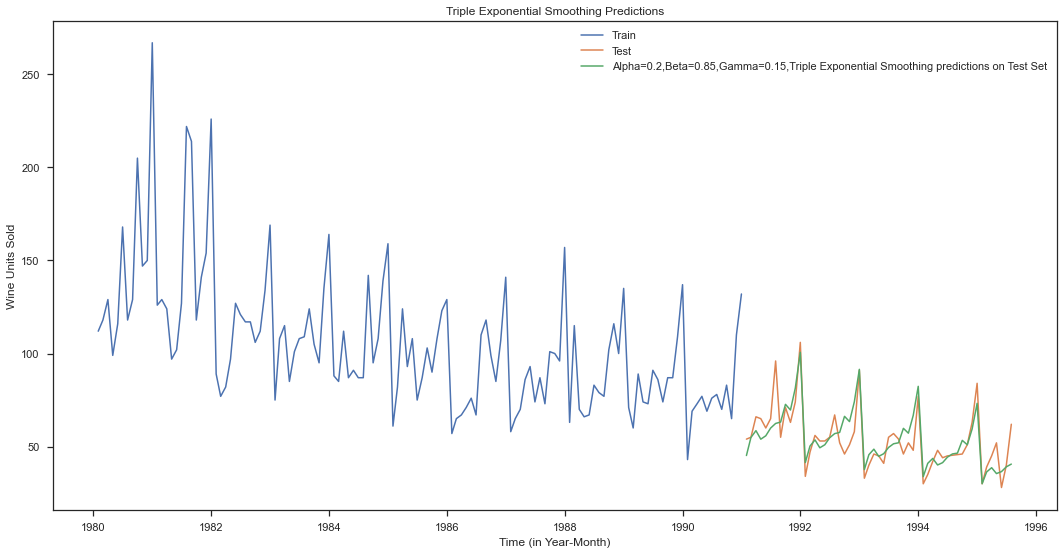

In [322]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination
model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=0.2,smoothing_trend=0.85,smoothing_seasonal=0.15,optimized=False,use_brute=True)
TES_train['predict',0.2,0.85,0.15] = model_TES_alpha_i_j_k.fittedvalues
TES_test['predict',0.2,0.85,0.15] = model_TES_alpha_i_j_k.forecast(steps=len(test))
rmse_tes_test_lowest = metrics.mean_squared_error(TES_test['Rose_Wine_Sales'],TES_test['predict',0.2,0.85,0.15],squared=False)

plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose_Wine_Sales'], label='Train')
plt.plot(TES_test['Rose_Wine_Sales'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict', 0.2,0.85,0.15], label='Alpha=0.2,Beta=0.85,Gamma=0.15,Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.title('Triple Exponential Smoothing Predictions');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')
plt.grid();
plt.grid();

In [323]:
resultsDf_8 = pd.DataFrame({'Test RMSE': [rmse_tes_test_lowest]}
                           ,index=['Alpha=0.2,Beta=0.85,Gamma=0.15,Triple Exponential Smoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8])
resultsDf

Test RMSE
Linear Regression                                   15.268887
Naive Model                                         79.718576
Simple Average                                      53.460367
2 point TMA                                         11.529278
4 point TMA                                         14.451376
6 point TMA                                         14.566262
9 point TMA                                         14.727596
Alpha=0.0987,SimpleExponentialSmoothing             36.796036
Alpha=1.49e-08, Beta=7.389e-09, Double Exponent...  15.268889
Alpha=0.064,Beta=0.053,Gamma=0.0,Triple Exponen...  21.154527
Alpha=0.2,Beta=0.85,Gamma=0.15,Triple Exponenti...   9.121757

In [324]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



Test RMSE
Alpha=0.2,Beta=0.85,Gamma=0.15,Triple Exponenti...   9.121757
2 point TMA                                         11.529278
4 point TMA                                         14.451376
6 point TMA                                         14.566262
9 point TMA                                         14.727596
Linear Regression                                   15.268887
Alpha=1.49e-08, Beta=7.389e-09, Double Exponent...  15.268889
Alpha=0.064,Beta=0.053,Gamma=0.0,Triple Exponen...  21.154527
Alpha=0.0987,SimpleExponentialSmoothing             36.796036
Simple Average                                      53.460367
Naive Model                                         79.718576

For this data, we had both trend and seasonality so by definition Triple Exponential Smoothing is supposed to work better than the Simple Exponential Smoothing as well as the Double Exponential Smoothing. However, since this was a model building exercise we had gone on to build different models on the data and have compared these model with the best RMSE value on the test data.

### We see that the best model is the Triple Exponential Smoothing with multiplicative seasonality with the parameters $\alpha$ = 0.2, $\beta$ = 0.85 and $\gamma$ = 0.15.

Text(0, 0.5, 'Wine Units Sold')

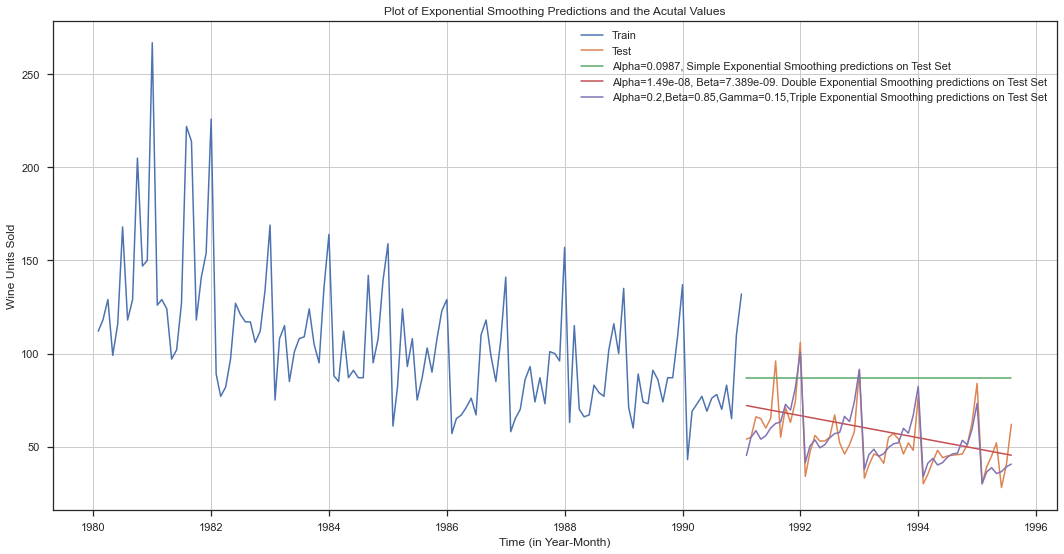

In [325]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(train['Rose_Wine_Sales'], label='Train')
plt.plot(test['Rose_Wine_Sales'], label='Test')

plt.plot(SES_test['predict'], label='Alpha=0.0987, Simple Exponential Smoothing predictions on Test Set')

plt.plot(DES_test['predict'], label='Alpha=1.49e-08, Beta=7.389e-09. Double Exponential Smoothing predictions on Test Set')

plt.plot(TES_test['predict', 0.2,0.85,0.15], label='Alpha=0.2,Beta=0.85,Gamma=0.15,Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Exponential Smoothing Predictions and the Acutal Values');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')

## 5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

### Check for stationarity of the whole Time Series data.

The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:
* $H_0$ : The Time Series has a unit root and is thus non-stationary.
* $H_1$ : The Time Series does not have a unit root and is thus stationary.

We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the $\alpha$ value.

In [326]:
from statsmodels.tsa.stattools import adfuller

In [327]:
print('Results of Dicky-Fuller Test')
dftest = adfuller(df,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

Results of Dicky-Fuller Test
DF test statistic is -2.240
DF test p-value is 0.46713505298058916
Number of lags used 13


We see that at 5% significant level the Time Series is non-stationary.Let us take one level of differencing to see whether the series becomes stationary.

In [328]:
print('Results of Dicky-Fuller Test with differencing')
dftest = adfuller(df.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

Results of Dicky-Fuller Test with differencing
DF test statistic is -8.162
DF test p-value is 3.015892676563128e-11
Number of lags used 12


Now, let us go ahead and plot the stationary series.

Text(0.5, 0, 'Time (in Year-Month)')

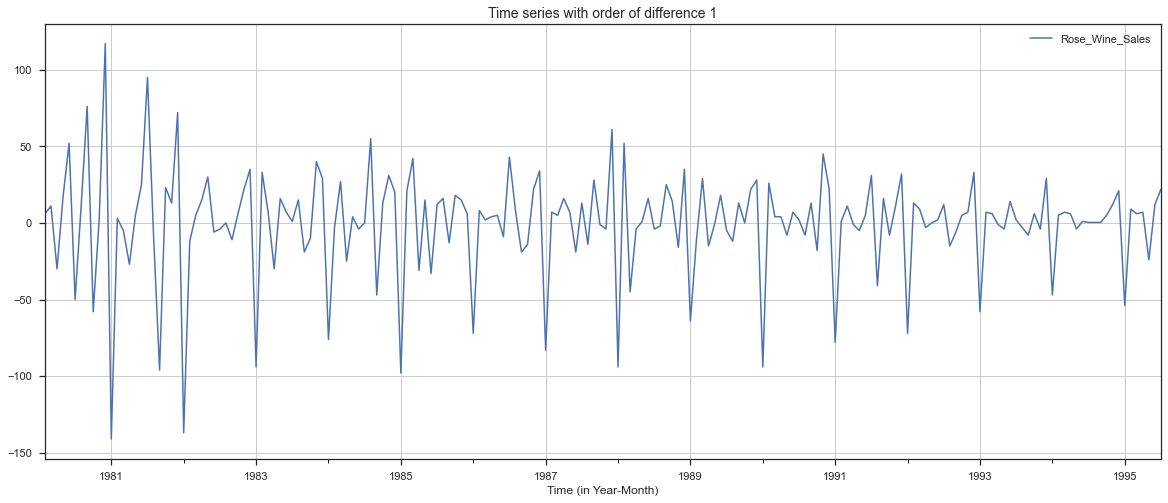

In [329]:
df.diff().dropna().plot(grid=True);
plt.title('Time series with order of difference 1', fontsize=14)
plt.xlabel('Time (in Year-Month)')

### Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

### ACF plot

Text(0, 0.5, 'Correlation')

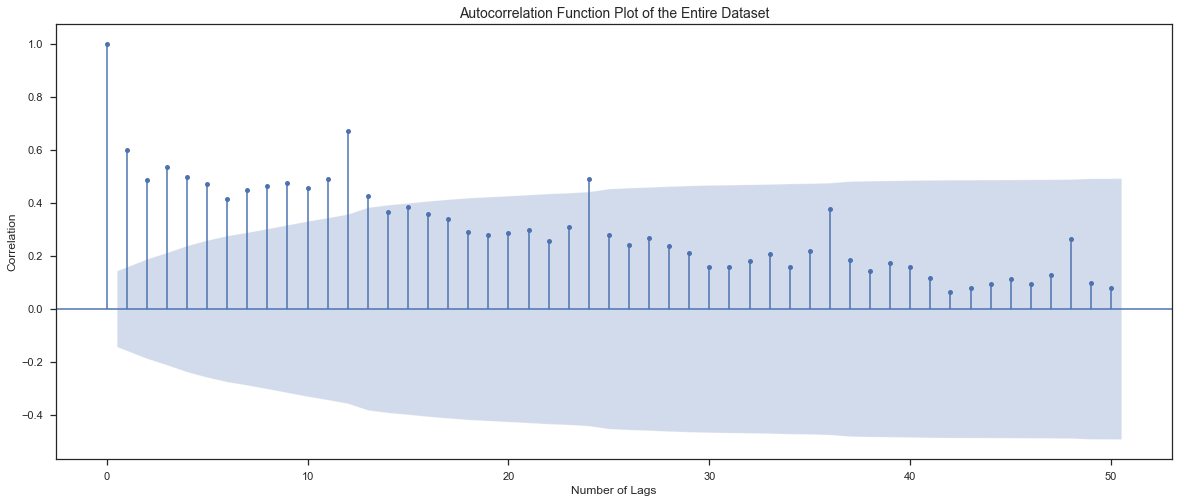

In [330]:
plot_acf(df,alpha=0.05,lags=50);
plt.title('Autocorrelation Function Plot of the Entire Dataset', fontsize=14)
plt.xlabel('Number of Lags')
plt.ylabel('Correlation')

Text(0, 0.5, 'Correlation')

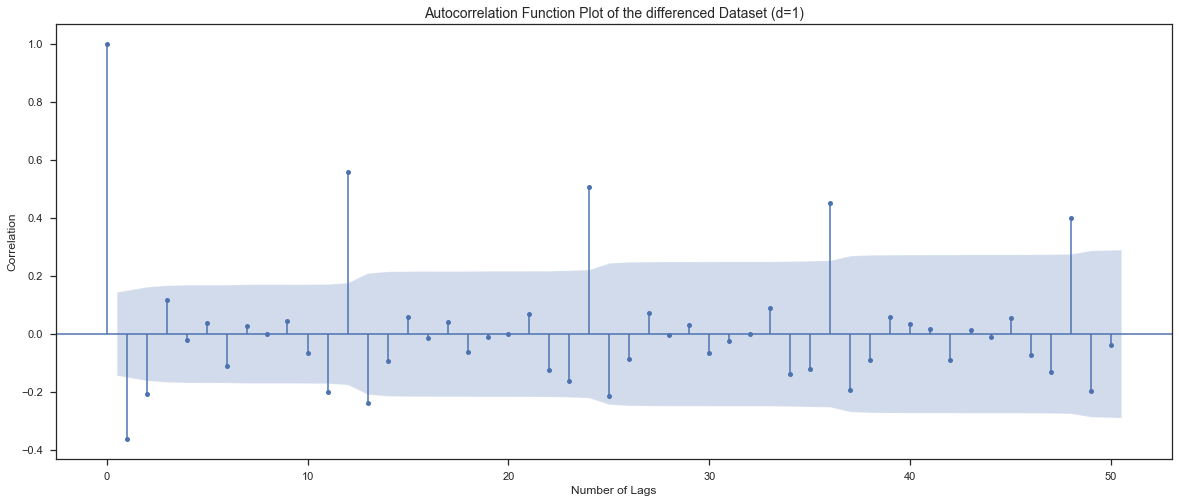

In [331]:
plot_acf(df.diff().dropna(),alpha=0.05,lags=50);
plt.title('Autocorrelation Function Plot of the differenced Dataset (d=1)', fontsize=14)
plt.xlabel('Number of Lags')
plt.ylabel('Correlation')

### PACF plot

Text(0, 0.5, 'Correlation')

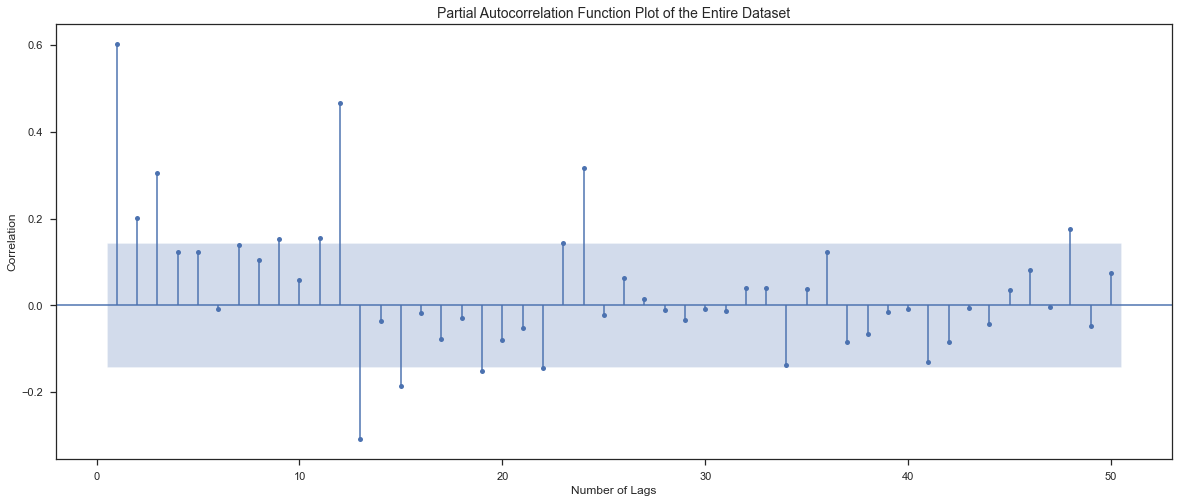

In [332]:
plot_pacf(df,zero=False,alpha=0.05,lags=50);
plt.title('Partial Autocorrelation Function Plot of the Entire Dataset', fontsize=14)
plt.xlabel('Number of Lags')
plt.ylabel('Correlation')

Text(0, 0.5, 'Correlation')

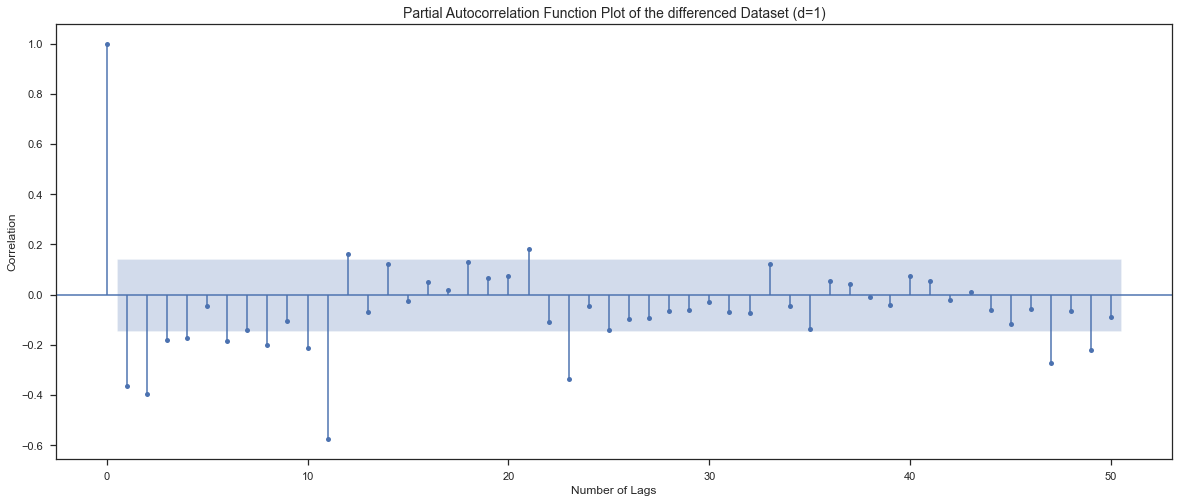

In [333]:
plot_pacf(df.diff().dropna(),alpha=0.05,lags=50);
plt.title('Partial Autocorrelation Function Plot of the differenced Dataset (d=1)', fontsize=14)
plt.xlabel('Number of Lags')
plt.ylabel('Correlation')

From the above plots, we can say that there seems to be a seasonality in the data.

In [334]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


Rose_Wine_Sales
Time_Stamp                 
1980-01-31            112.0
1980-02-29            118.0
1980-03-31            129.0
1980-04-30             99.0
1980-05-31            116.0

Last few rows of Training Data


Rose_Wine_Sales
Time_Stamp                 
1990-08-31             70.0
1990-09-30             83.0
1990-10-31             65.0
1990-11-30            110.0
1990-12-31            132.0

First few rows of Test Data


Rose_Wine_Sales
Time_Stamp                 
1991-01-31             54.0
1991-02-28             55.0
1991-03-31             66.0
1991-04-30             65.0
1991-05-31             60.0

Last few rows of Test Data


Rose_Wine_Sales
Time_Stamp                 
1995-03-31             45.0
1995-04-30             52.0
1995-05-31             28.0
1995-06-30             40.0
1995-07-31             62.0

### Check for stationarity of the Training Data Time Series.

Let us plot the training data once.

Text(0, 0.5, 'Wine units sold')

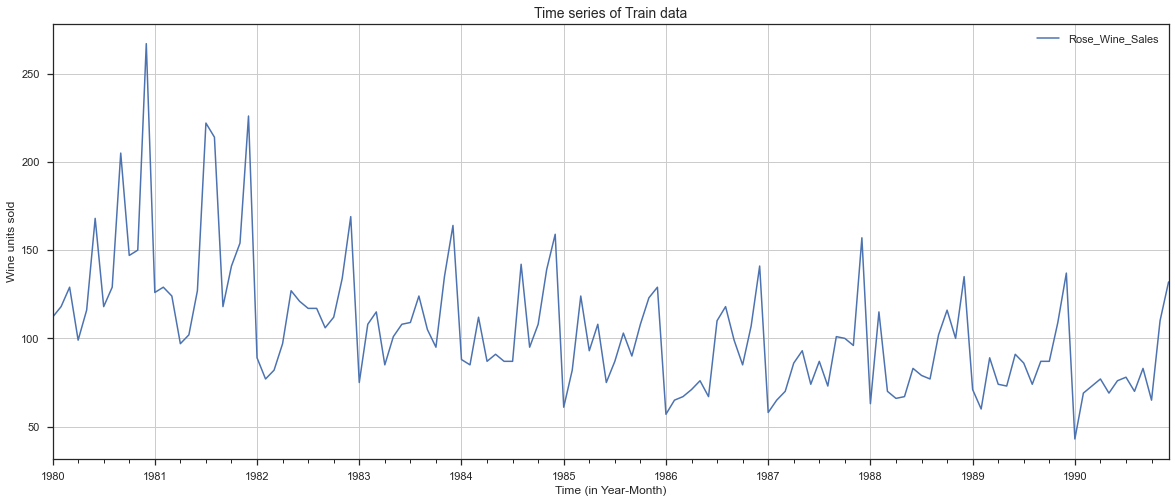

In [335]:
train.plot(grid=True);
plt.title('Time series of Train data', fontsize=14)
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine units sold')

In [336]:
print('Results of Dicky-Fuller Test on Train data')
dftest = adfuller(train,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

Results of Dicky-Fuller Test on Train data
DF test statistic is -1.686
DF test p-value is 0.7569093051047106
Number of lags used 13


The training data is non-stationary at 95% confidence level. Let us take a first level of differencing to stationarize the Time Series.

In [337]:
print('Results of Dicky-Fuller Test on Train data with differencing')
dftest = adfuller(train.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

Results of Dicky-Fuller Test on Train data with differencing
DF test statistic is -6.804
DF test p-value is 3.894831356781761e-08
Number of lags used 12


Now, let us go ahead and plot the differenced training data.

Text(0, 0.5, 'Wine units sold')

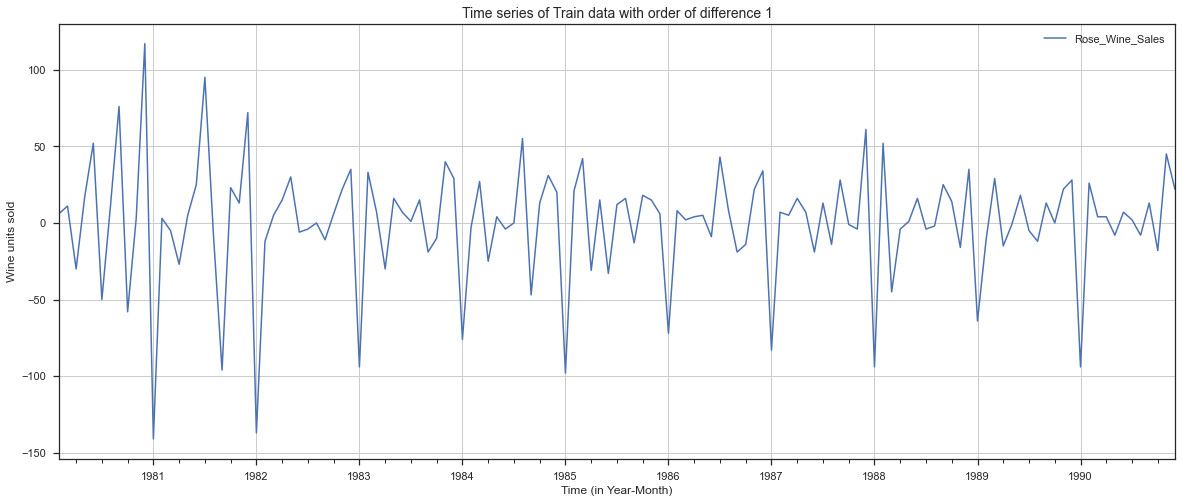

In [338]:
train.diff().dropna().plot(grid=True);
plt.title('Time series of Train data with order of difference 1', fontsize=14)
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine units sold')

In [339]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-31 to 1990-12-31
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rose_Wine_Sales  132 non-null    float64
dtypes: float64(1)
memory usage: 2.1 KB


## 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

### ARIMA Model

In [340]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 5
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 5)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (0, 1, 4)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (1, 1, 4)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (2, 1, 4)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)
Model: (3, 1, 4)
Model: (4, 1, 0)
Model: (4, 1, 1)
Model: (4, 1, 2)
Model: (4, 1, 3)
Model: (4, 1, 4)


In [341]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [342]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model = ARIMA(train['Rose_Wine_Sales'].values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))#printing the parameters and the AIC
    #from the fitted models
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 1, 0) - AIC:1333.1546729124348
ARIMA(0, 1, 1) - AIC:1282.3098319748299
ARIMA(0, 1, 2) - AIC:1279.6715288535765
ARIMA(0, 1, 3) - AIC:1280.5453761734668
ARIMA(0, 1, 4) - AIC:1281.6766982143947
ARIMA(1, 1, 0) - AIC:1317.3503105381546
ARIMA(1, 1, 1) - AIC:1280.5742295380073
ARIMA(1, 1, 2) - AIC:1279.8707234231897
ARIMA(1, 1, 3) - AIC:1281.8707223309998
ARIMA(1, 1, 4) - AIC:1279.6052633451109
ARIMA(2, 1, 0) - AIC:1298.6110341604983
ARIMA(2, 1, 1) - AIC:1281.5078621868424
ARIMA(2, 1, 2) - AIC:1281.8707222264402
ARIMA(2, 1, 3) - AIC:1274.6953561209548
ARIMA(2, 1, 4) - AIC:1278.7699014386199
ARIMA(3, 1, 0) - AIC:1297.4810917271725
ARIMA(3, 1, 1) - AIC:1282.4192776271946
ARIMA(3, 1, 2) - AIC:1283.720740597711
ARIMA(3, 1, 3) - AIC:1278.6619652725685
ARIMA(3, 1, 4) - AIC:1287.7190768737705
ARIMA(4, 1, 0) - AIC:1296.3266569004702
ARIMA(4, 1, 1) - AIC:1283.79317151231
ARIMA(4, 1, 2) - AIC:1285.718248563479
ARIMA(4, 1, 3) - AIC:1278.4514021021457
ARIMA(4, 1, 4) - AIC:1282.3372229344063


In [343]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

param          AIC
13  (2, 1, 3)  1274.695356
23  (4, 1, 3)  1278.451402
18  (3, 1, 3)  1278.661965
14  (2, 1, 4)  1278.769901
9   (1, 1, 4)  1279.605263

In [344]:
auto_ARIMA = ARIMA(train, order=(2,1,3))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:        Rose_Wine_Sales   No. Observations:                  132
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -631.348
Date:                Sun, 23 Oct 2022   AIC                           1274.695
Time:                        21:34:52   BIC                           1291.947
Sample:                    01-31-1980   HQIC                          1281.705
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6781      0.084    -19.992      0.000      -1.843      -1.514
ar.L2         -0.7289      0.084     -8.684      0.000      -0.893      -0.564
ma.L1          1.0446      0.628      1.665      0.0

#### Diagnostics plot

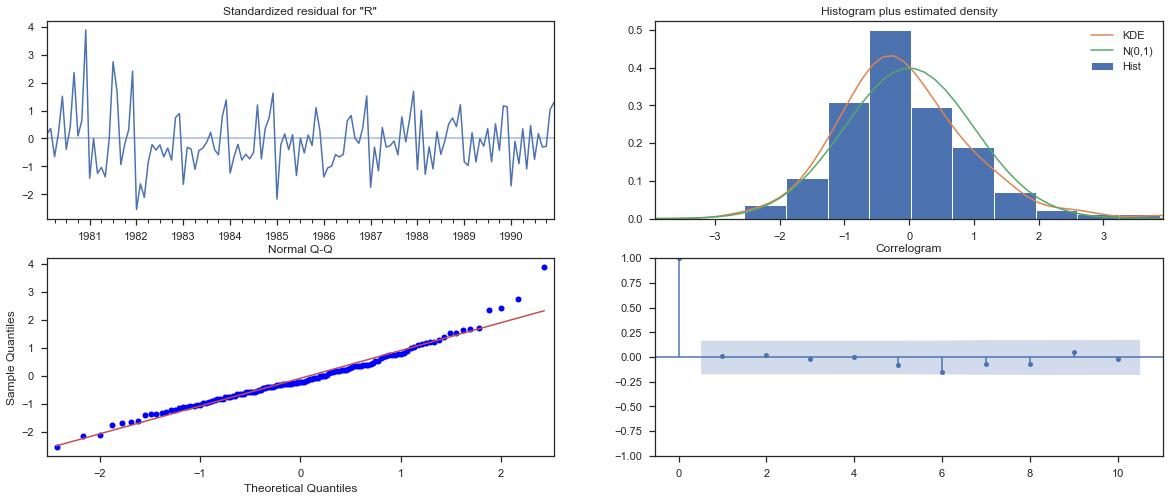

In [345]:
results_auto_ARIMA.plot_diagnostics();

#### Predict on the Test Set using this model and evaluate the model.

In [346]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [347]:
predicted_auto_ARIMA

1991-01-31    85.605078
1991-02-28    90.532552
1991-03-31    81.968167
1991-04-30    92.748215
1991-05-31    80.900983
1991-06-30    92.924087
1991-07-31    81.383696
1991-08-31    91.985881
1991-09-30    82.606225
1991-10-31    90.618235
1991-11-30    84.010151
1991-12-31    89.259200
1992-01-31    85.267413
1992-02-29    88.139999
1992-03-31    86.229119
1992-04-30    87.341950
1992-05-31    86.867334
1992-06-30    86.852661
1992-07-31    87.223215
1992-08-31    86.612100
1992-09-30    87.367501
1992-10-31    86.545316
1992-11-30    87.374402
1992-12-31    86.582413
1993-01-31    87.307122
1993-02-28    86.668274
1993-03-31    87.212081
1993-04-30    86.765177
1993-05-31    87.118744
1993-06-30    86.851173
1993-07-31    87.042469
1993-08-31    86.916486
1993-09-30    86.988463
1993-10-31    86.959507
1993-11-30    86.955635
1993-12-31    86.983237
1994-01-31    86.939742
1994-02-28    86.992612
1994-03-31    86.935595
1994-04-30    86.992737
1994-05-31    86.938408
1994-06-30    86

Text(0, 0.5, 'Wine Units Sold')

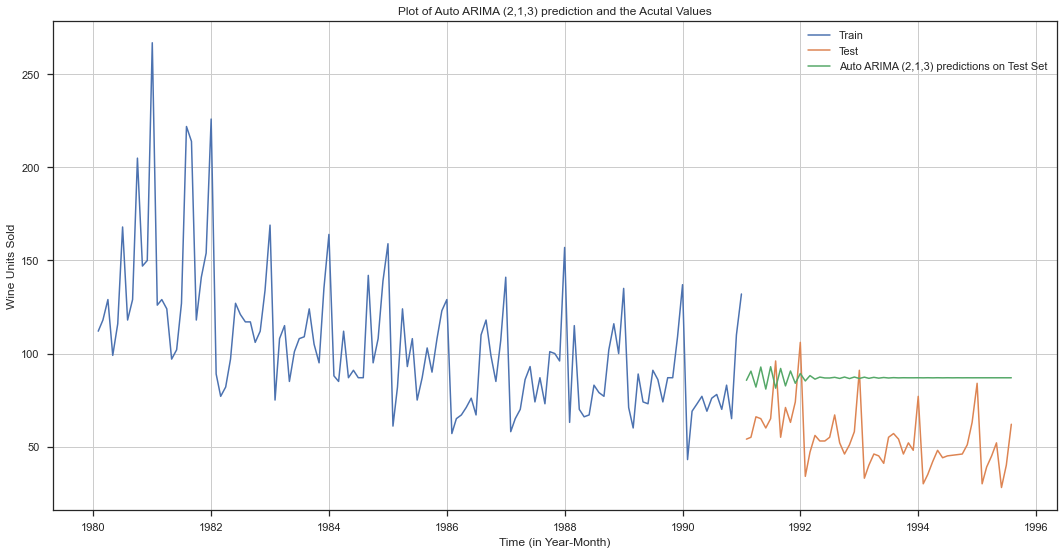

In [348]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(train['Rose_Wine_Sales'], label='Train')
plt.plot(test['Rose_Wine_Sales'], label='Test')

plt.plot(predicted_auto_ARIMA, label='Auto ARIMA (2,1,3) predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Auto ARIMA (2,1,3) prediction and the Acutal Values');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')

In [349]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

## Importing the mean_squared_error function from sklearn to calculate the RMSE

from sklearn.metrics import mean_squared_error

In [350]:
rmse = mean_squared_error(test['Rose_Wine_Sales'],predicted_auto_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['Rose_Wine_Sales'],predicted_auto_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 36.813265381914555 
MAPE: 75.8392764459562


In [351]:
resultsDf_2 = pd.DataFrame({'Test RMSE': rmse,'MAPE':mape}
                           ,index=['Auto ARIMA (2,1,3)'])

resultsDf_2

Test RMSE       MAPE
Auto ARIMA (2,1,3)  36.813265  75.839276

### SARIMA Model

Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.

Text(0, 0.5, 'Correlation')

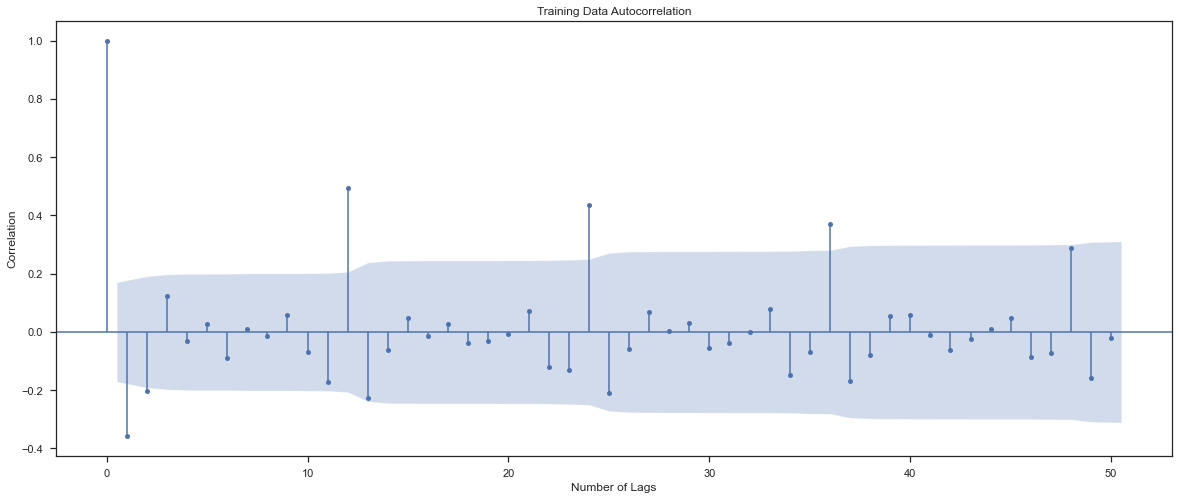

In [352]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop',lags=50);
plt.xlabel('Number of Lags')
plt.ylabel('Correlation')

We can see that there is a seasonality.

In [353]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (1, 1, 3)(1, 0, 3, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)
Model: (2, 1, 3)(2, 0, 3, 12)
Model: (3, 1, 0)(3, 0, 0, 12)
Model: (3, 1, 1)(3, 0, 1, 12)
Model: (3, 1, 2)(3, 0, 2, 12)
Model: (3, 1, 3)(3, 0, 3, 12)


In [354]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [355]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose_Wine_Sales'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1145.4230827207386
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:976.4375296380903
SARIMA(0, 1, 0)x(0, 0, 3, 12) - AIC:3994.7201928422214
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1116.0207869385767
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:969.6913635754913
SARIMA(0, 1, 0)x(1, 0, 3, 12) - AIC:3801.0056501147847
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:960.8812220353041
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:962.8794540697546
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:955.5735408945715
SARIMA(0, 1, 0)x(2, 0, 3, 12) - AIC:5644.471437825422
SARIMA(0, 1, 0)x(3, 0, 0, 12) - AIC:850.753540393109
SARIMA(0, 1, 0)x(3, 0, 1, 12) - AIC:851.7482702714087
SARIMA(0, 1, 0)x(3, 0, 2, 12) - AIC:850.5304136127778
SARIMA(0, 1, 0)x(3, 0, 3, 12) - AIC:3843.9094675774722
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1263.5369097383968
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1098.5554825918339
SARIMA(0, 1, 1)x(0, 0

SARIMA(2, 1, 1)x(1, 0, 3, 12) - AIC:3877.6344414832647
SARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC:896.5181608196617
SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:897.6399565369554
SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:899.4835866286412
SARIMA(2, 1, 1)x(2, 0, 3, 12) - AIC:4966.510727683186
SARIMA(2, 1, 1)x(3, 0, 0, 12) - AIC:785.3932600253445
SARIMA(2, 1, 1)x(3, 0, 1, 12) - AIC:787.3639258932856
SARIMA(2, 1, 1)x(3, 0, 2, 12) - AIC:787.059888726936
SARIMA(2, 1, 1)x(3, 0, 3, 12) - AIC:4132.35000275565
SARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC:1253.910211614668
SARIMA(2, 1, 2)x(0, 0, 1, 12) - AIC:1085.964355259822
SARIMA(2, 1, 2)x(0, 0, 2, 12) - AIC:916.3258311126987
SARIMA(2, 1, 2)x(0, 0, 3, 12) - AIC:3173.847450733612
SARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC:1073.2912713695268
SARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC:1044.1909353605251
SARIMA(2, 1, 2)x(1, 0, 2, 12) - AIC:907.6661488806784
SARIMA(2, 1, 2)x(1, 0, 3, 12) - AIC:2967.753768577894
SARIMA(2, 1, 2)x(2, 0, 0, 12) - AIC:897.346444113502
SARIMA(2, 1, 2)x(2, 0, 1, 12

In [356]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal         AIC
222  (3, 1, 1)  (3, 0, 2, 12)  774.400286
238  (3, 1, 2)  (3, 0, 2, 12)  774.880935
220  (3, 1, 1)  (3, 0, 0, 12)  775.426699
221  (3, 1, 1)  (3, 0, 1, 12)  775.495330
252  (3, 1, 3)  (3, 0, 0, 12)  775.561019

In [357]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['Rose_Wine_Sales'],
                                order=(3,1,1),
                                seasonal_order=(3, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

                                        SARIMAX Results                                        
Dep. Variable:                         Rose_Wine_Sales   No. Observations:                  132
Model:             SARIMAX(3, 1, 1)x(3, 0, [1, 2], 12)   Log Likelihood                -377.200
Date:                                 Sun, 23 Oct 2022   AIC                            774.400
Time:                                         21:38:35   BIC                            799.618
Sample:                                     01-31-1980   HQIC                           784.578
                                          - 12-31-1990                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0464      0.126      0.367      0.714      -0.202       0

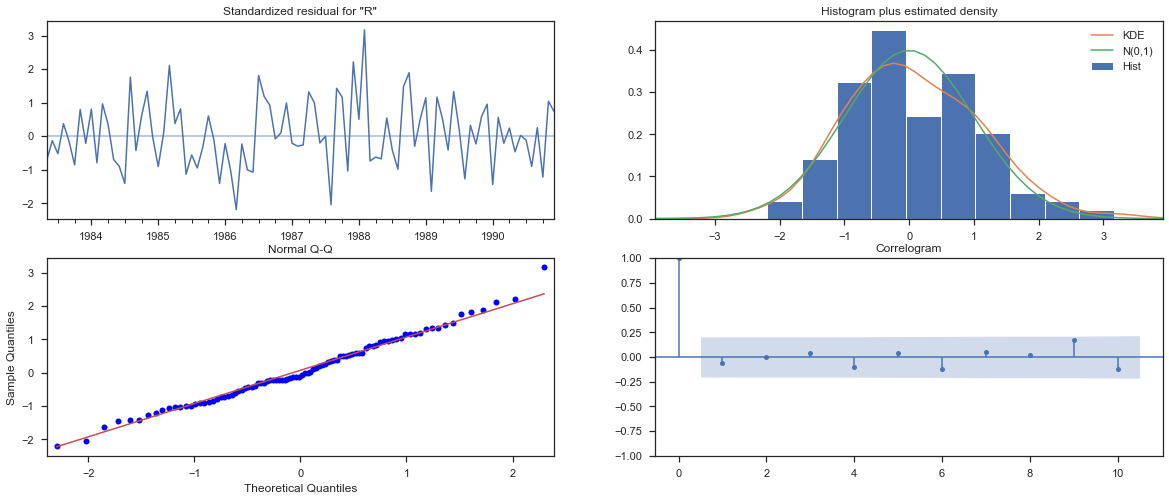

In [358]:
results_auto_SARIMA.plot_diagnostics();

#### Predict on the Test Set using this model and evaluate the model.

In [359]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [360]:
predicted_auto_SARIMA.predicted_mean

1991-01-31     55.235777
1991-02-28     68.122643
1991-03-31     67.908788
1991-04-30     66.786249
1991-05-31     69.760445
1991-06-30     70.329003
1991-07-31     75.359549
1991-08-31     76.492110
1991-09-30     78.971378
1991-10-31     76.538670
1991-11-30     93.249070
1991-12-31    116.283229
1992-01-31     55.202490
1992-02-29     64.444090
1992-03-31     68.547777
1992-04-30     63.872362
1992-05-31     67.700162
1992-06-30     68.443607
1992-07-31     72.972114
1992-08-31     74.325421
1992-09-30     75.317910
1992-10-31     76.046865
1992-11-30     87.421320
1992-12-31    109.807252
1993-01-31     51.298304
1993-02-28     62.617088
1993-03-31     65.912090
1993-04-30     62.264361
1993-05-31     64.612153
1993-06-30     65.747562
1993-07-31     69.826310
1993-08-31     70.420033
1993-09-30     72.331775
1993-10-31     71.365729
1993-11-30     84.722274
1993-12-31    105.357862
1994-01-31     49.949997
1994-02-28     60.311772
1994-03-31     63.158222
1994-04-30     59.896908


Text(0, 0.5, 'Wine Units Sold')

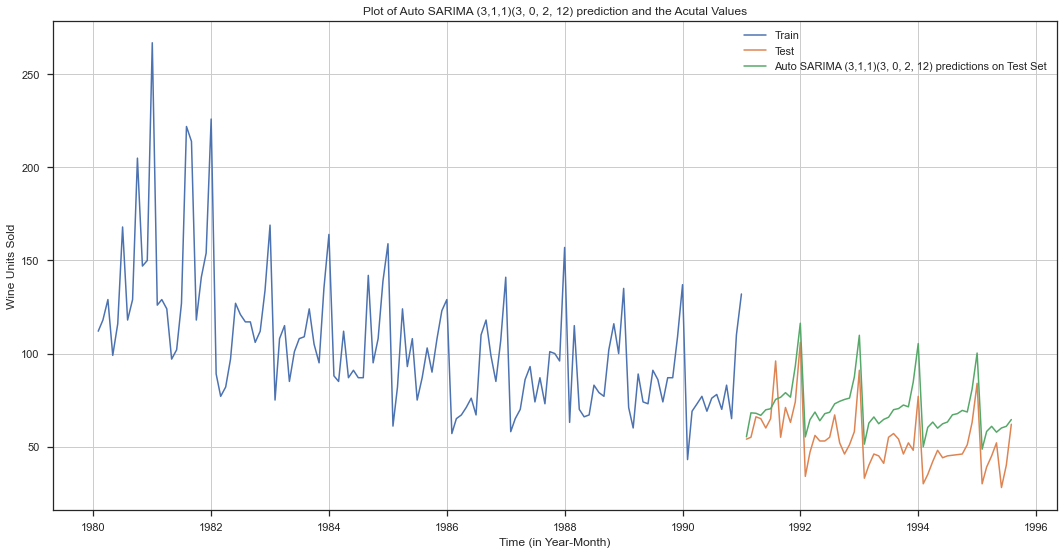

In [361]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(train['Rose_Wine_Sales'], label='Train')
plt.plot(test['Rose_Wine_Sales'], label='Test')

plt.plot(predicted_auto_SARIMA.predicted_mean, label='Auto SARIMA (3,1,1)(3, 0, 2, 12) predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Auto SARIMA (3,1,1)(3, 0, 2, 12) prediction and the Acutal Values');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')

In [362]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

Rose_Wine_Sales       mean    mean_se  mean_ci_lower  mean_ci_upper
1991-01-31       55.235777  13.907460      27.977656      82.493898
1991-02-28       68.122643  13.990892      40.700998      95.544289
1991-03-31       67.908788  14.011943      40.445884      95.371691
1991-04-30       66.786249  14.099267      39.152194      94.420304
1991-05-31       69.760445  14.108627      42.108044      97.412845

In [363]:
rmse = mean_squared_error(test['Rose_Wine_Sales'],predicted_auto_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Rose_Wine_Sales'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 18.881814670339462 
MAPE: 36.37520785436251


In [364]:
temp_resultsDf = pd.DataFrame({'Test RMSE': rmse,'MAPE':mape}
                           ,index=['Auto SARIMA (3,1,1)(3,0,2,12)'])


resultsDf_2 = pd.concat([resultsDf_2,temp_resultsDf])

resultsDf_2

Test RMSE       MAPE
Auto ARIMA (2,1,3)             36.813265  75.839276
Auto SARIMA (3,1,1)(3,0,2,12)  18.881815  36.375208

## 7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

## Manual ARIMA Model

Let us look at the ACF and the PACF plots once more.

### ACF plot

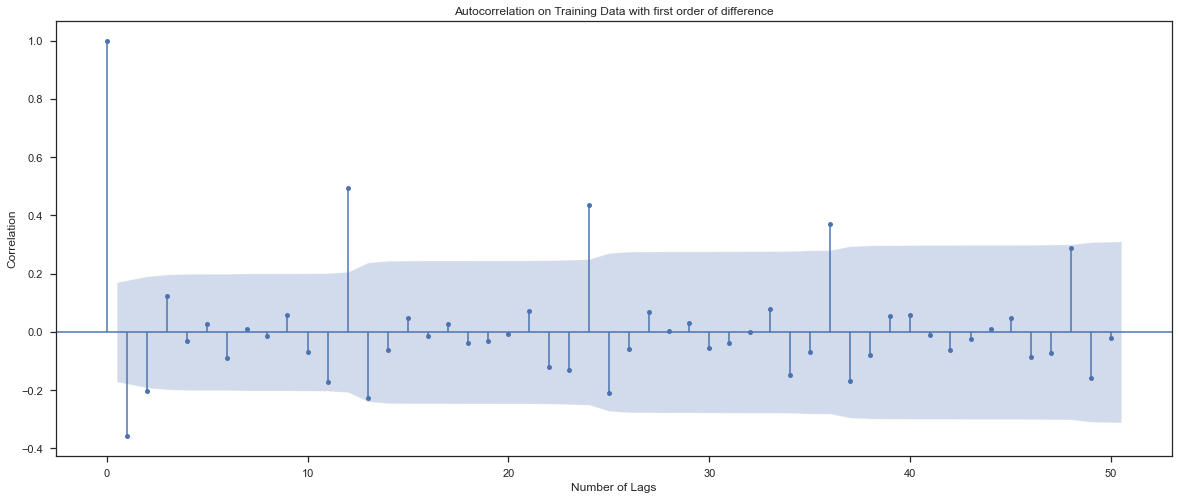

In [365]:
plot_acf(train.diff(),title='Autocorrelation on Training Data with first order of difference',missing='drop',lags=50)
plt.xlabel('Number of Lags')
plt.ylabel('Correlation')
plt.show()

### PACF plot

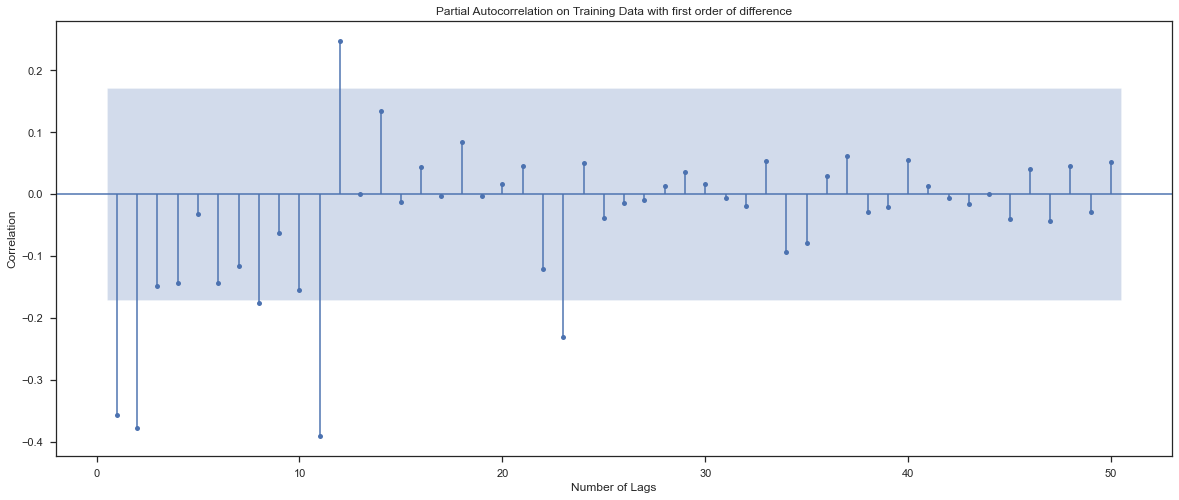

In [366]:
plot_pacf(train.diff().dropna(),title='Partial Autocorrelation on Training Data with first order of difference',lags=50,zero=False,method='ywmle')
plt.xlabel('Number of Lags')
plt.ylabel('Correlation')
plt.show()

Here, we have taken alpha=0.05.

* The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag after which the PACF plot cuts-off to 0.
* The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag after which the ACF plot cuts-off to 0.

By looking at the above plots, we will take the value of p and q to be 2 and 2 respectively.

In [367]:
manual_ARIMA = ARIMA(train['Rose_Wine_Sales'], order=(2,1,2),freq='M')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:        Rose_Wine_Sales   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -635.935
Date:                Sun, 23 Oct 2022   AIC                           1281.871
Time:                        21:38:36   BIC                           1296.247
Sample:                    01-31-1980   HQIC                          1287.712
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4540      0.469     -0.969      0.333      -1.372       0.464
ar.L2          0.0001      0.170      0.001      0.999      -0.334       0.334
ma.L1         -0.2541      0.459     -0.554      0.5

Let us analyse the residuals from the various diagnostics plot.

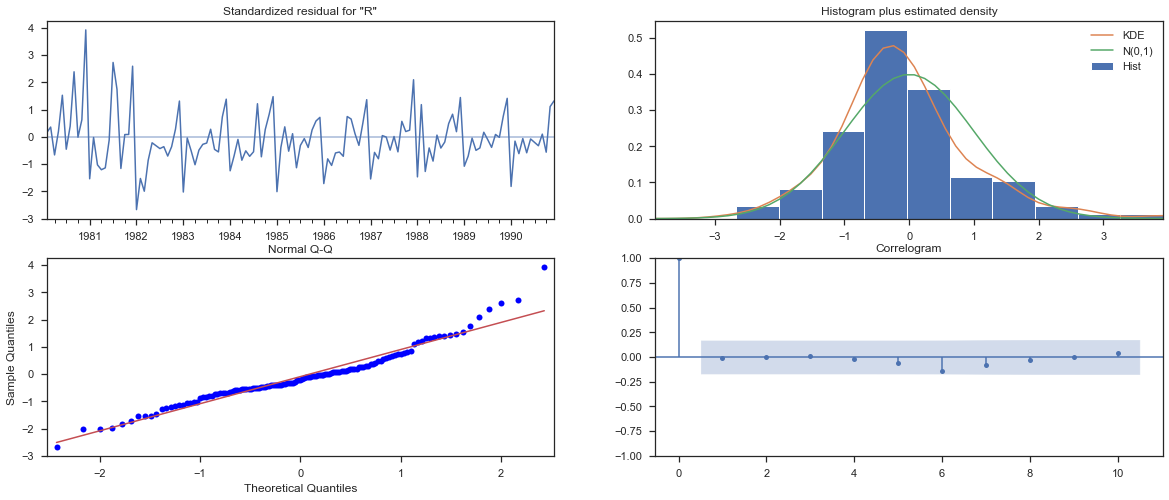

In [368]:
results_manual_ARIMA.plot_diagnostics();

#### Predict on the Test Set using this model and evaluate the model.

In [369]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [370]:
predicted_manual_ARIMA

1991-01-31    91.159512
1991-02-28    85.314628
1991-03-31    87.962468
1991-04-30    86.759563
1991-05-31    87.306038
1991-06-30    87.057777
1991-07-31    87.170561
1991-08-31    87.119324
1991-09-30    87.142601
1991-10-31    87.132026
1991-11-30    87.136830
1991-12-31    87.134648
1992-01-31    87.135639
1992-02-29    87.135189
1992-03-31    87.135393
1992-04-30    87.135300
1992-05-31    87.135342
1992-06-30    87.135323
1992-07-31    87.135332
1992-08-31    87.135328
1992-09-30    87.135330
1992-10-31    87.135329
1992-11-30    87.135329
1992-12-31    87.135329
1993-01-31    87.135329
1993-02-28    87.135329
1993-03-31    87.135329
1993-04-30    87.135329
1993-05-31    87.135329
1993-06-30    87.135329
1993-07-31    87.135329
1993-08-31    87.135329
1993-09-30    87.135329
1993-10-31    87.135329
1993-11-30    87.135329
1993-12-31    87.135329
1994-01-31    87.135329
1994-02-28    87.135329
1994-03-31    87.135329
1994-04-30    87.135329
1994-05-31    87.135329
1994-06-30    87

Text(0, 0.5, 'Wine Units Sold')

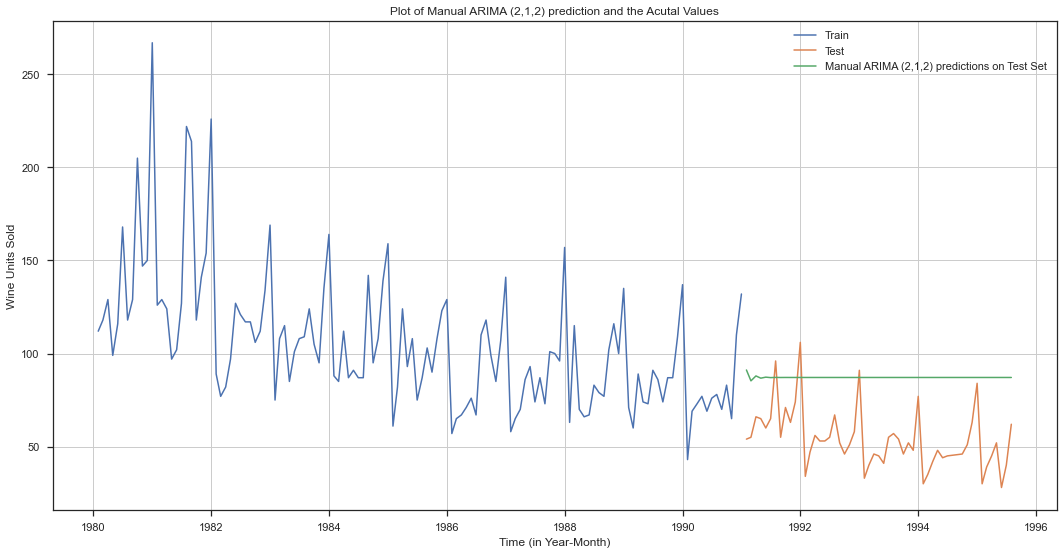

In [371]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(train['Rose_Wine_Sales'], label='Train')
plt.plot(test['Rose_Wine_Sales'], label='Test')

plt.plot(predicted_manual_ARIMA, label='Manual ARIMA (2,1,2) predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Manual ARIMA (2,1,2) prediction and the Acutal Values');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')

In [372]:
rmse = mean_squared_error(test['Rose_Wine_Sales'],predicted_manual_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['Rose_Wine_Sales'],predicted_manual_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 36.87099104628326 
MAPE: 76.05544564923427


In [373]:
temp_resultsDf = pd.DataFrame({'Test RMSE': rmse,'MAPE':mape}
                           ,index=['Manual ARIMA(2,1,2)'])


resultsDf_2 = pd.concat([resultsDf_2,temp_resultsDf])

resultsDf_2

Test RMSE       MAPE
Auto ARIMA (2,1,3)             36.813265  75.839276
Auto SARIMA (3,1,1)(3,0,2,12)  18.881815  36.375208
Manual ARIMA(2,1,2)            36.870991  76.055446

## Manual SARIMA Model

Let us look at the ACF and the PACF plots once more.

### ACF plot

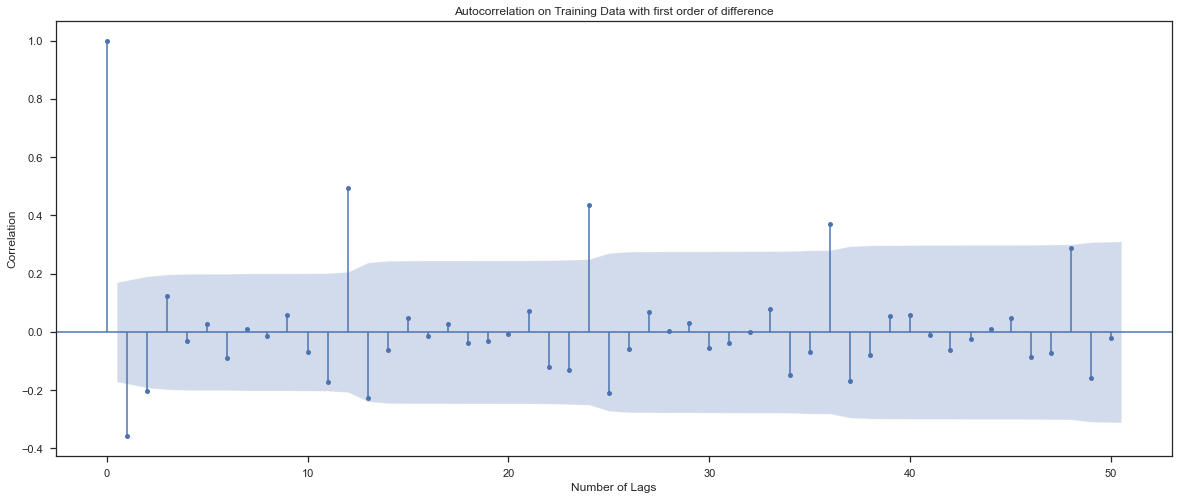

In [374]:
plot_acf(train.diff(),title='Autocorrelation on Training Data with first order of difference',missing='drop',lags=50)
plt.xlabel('Number of Lags')
plt.ylabel('Correlation')
plt.show()

### PACF plot

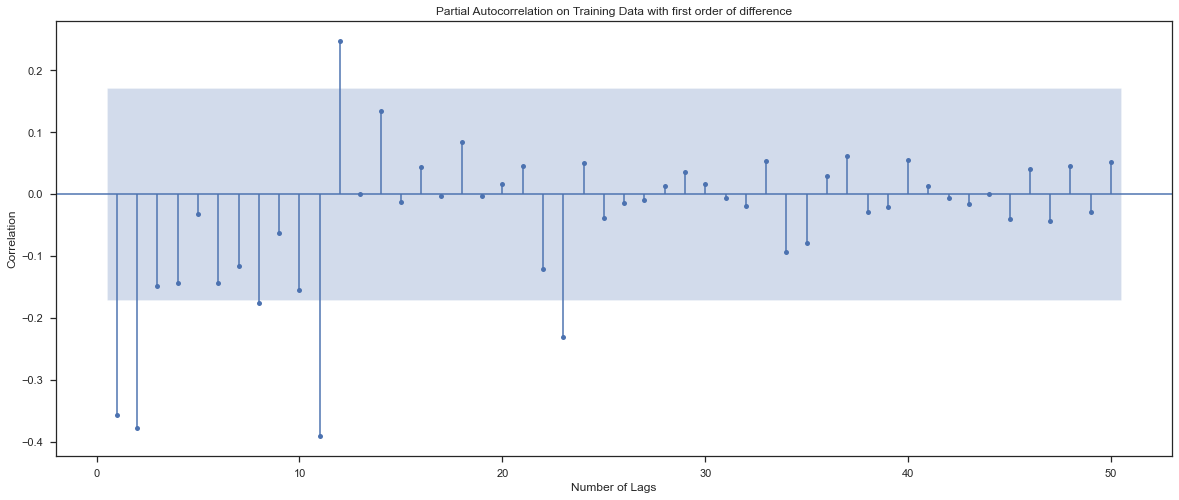

In [375]:
plot_pacf(train.diff().dropna(),title='Partial Autocorrelation on Training Data with first order of difference',lags=50,zero=False,method='ywmle')
plt.xlabel('Number of Lags')
plt.ylabel('Correlation')
plt.show()

We see that our ACF plot at the seasonal interval (12) does not taper off quickly. So, we go ahead and take a seasonal differencing of the original series. Before that let us look at the original series.

Text(0, 0.5, 'Units Sold')

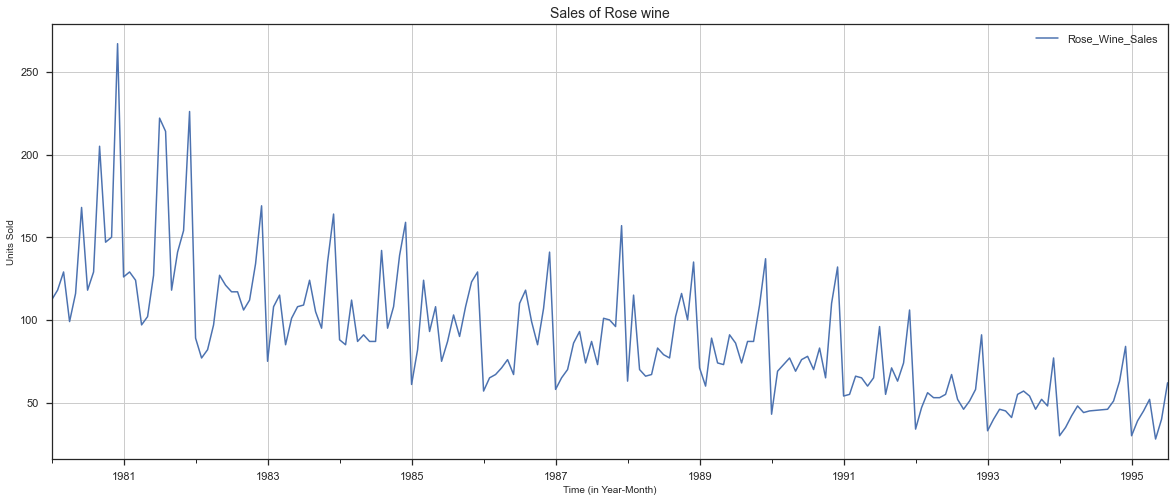

In [376]:
#Original Time Series
rcParams['figure.figsize'] = 20,8
df.plot(grid=True);
plt.title('Sales of Rose wine', fontsize=14)
plt.xlabel('Time (in Year-Month)',fontsize=10)
plt.ylabel('Units Sold',fontsize=10)

Text(0, 0.5, 'Wine Units Sold')

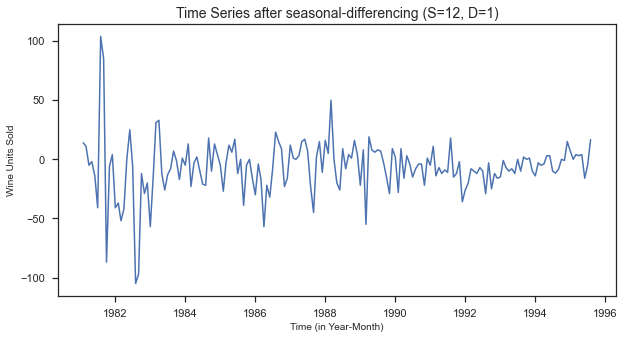

In [377]:
#Time series with seasonal differencing (S=12, D=1)
plt.figure(figsize=(10,5))
plt.plot(df['Rose_Wine_Sales'].diff(12).dropna())
plt.title ('Time Series after seasonal-differencing (S=12, D=1)',fontsize=14);
plt.xlabel('Time (in Year-Month)',fontsize=10)
plt.ylabel('Wine Units Sold',fontsize=10)

Text(0, 0.5, 'Wine Units Sold')

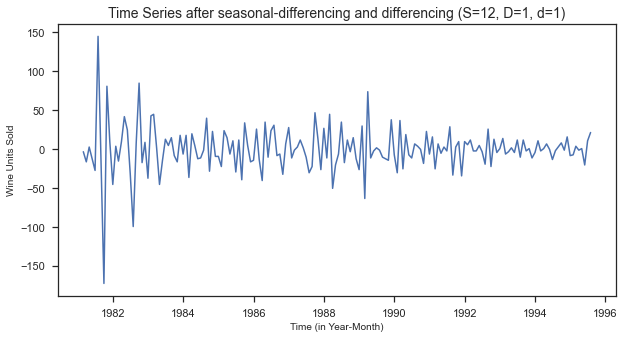

In [378]:
#Time series with seasonal differencing followed by normal differencing (S=12, D=1, d=1)
plt.figure(figsize=(10,5))
plt.plot((df['Rose_Wine_Sales'].diff(12).dropna()).diff().dropna())
plt.title ('Time Series after seasonal-differencing and differencing (S=12, D=1, d=1)',fontsize=14);
plt.xlabel('Time (in Year-Month)',fontsize=10)
plt.ylabel('Wine Units Sold',fontsize=10)

In [379]:
#Testing stationarity
dftest = adfuller((df['Rose_Wine_Sales'].diff(12).dropna()).diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -4.551
DF test p-value is 0.00124573077931286
Number of lags used 11


Let us look at the ACF and the PACF plots once more with seasonal and normal differencing on train data

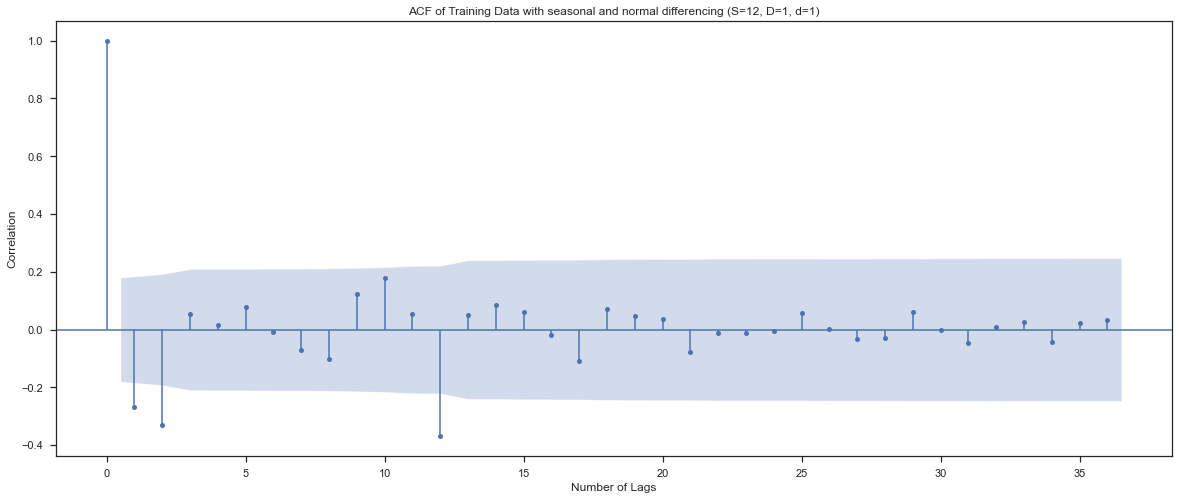

In [380]:
plot_acf((train['Rose_Wine_Sales'].diff(12).dropna()).diff().dropna(),title='ACF of Training Data with seasonal and normal differencing (S=12, D=1, d=1)',lags=36)
plt.xlabel('Number of Lags')
plt.ylabel('Correlation')
plt.show()

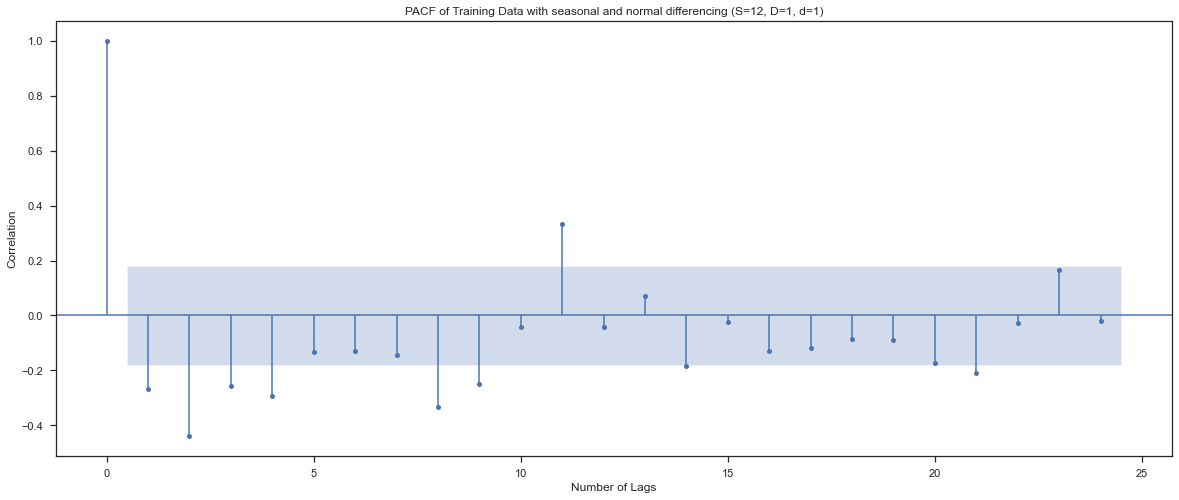

In [381]:
plot_pacf((train['Rose_Wine_Sales'].diff(12).dropna()).diff().dropna(),title='PACF of Training Data with seasonal and normal differencing (S=12, D=1, d=1)',lags=24)
plt.xlabel('Number of Lags')
plt.ylabel('Correlation')
plt.show()

- Here we have taken alpha = 0.05 and seasonal period as 12.


- From the PACF plot it can be seen that till lag 4 is significant before cut-off, so AR term ‘p = 4’ is chosen. At seasonal lag of 12, it cuts off, so keep seasonal AR ‘P = 0’.


- From ACF plot, lag 1 and 2 are significant before it cuts off, so lets keep MA term ‘q = 2’ and at seasonal lag of 12, a significant lag is apparent and no seaonal lags are apparent at lags 24, 36 or afterwards, so lets keep ‘Q = 1'.


- The final selected terms for SARIMA model is (4, 1, 2)x(0, 1, 1, 12), as inferred from the ACF and PACF plots.

In [382]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Rose_Wine_Sales'],
                                order=(4,1,2),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

                                      SARIMAX Results                                       
Dep. Variable:                      Rose_Wine_Sales   No. Observations:                  132
Model:             SARIMAX(4, 1, 2)x(0, 1, [1], 12)   Log Likelihood                -446.102
Date:                              Sun, 23 Oct 2022   AIC                            908.203
Time:                                      21:38:38   BIC                            929.358
Sample:                                  01-31-1980   HQIC                           916.774
                                       - 12-31-1990                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8047      0.119     -6.778      0.000      -1.037      -0.572
ar.L2          0.03

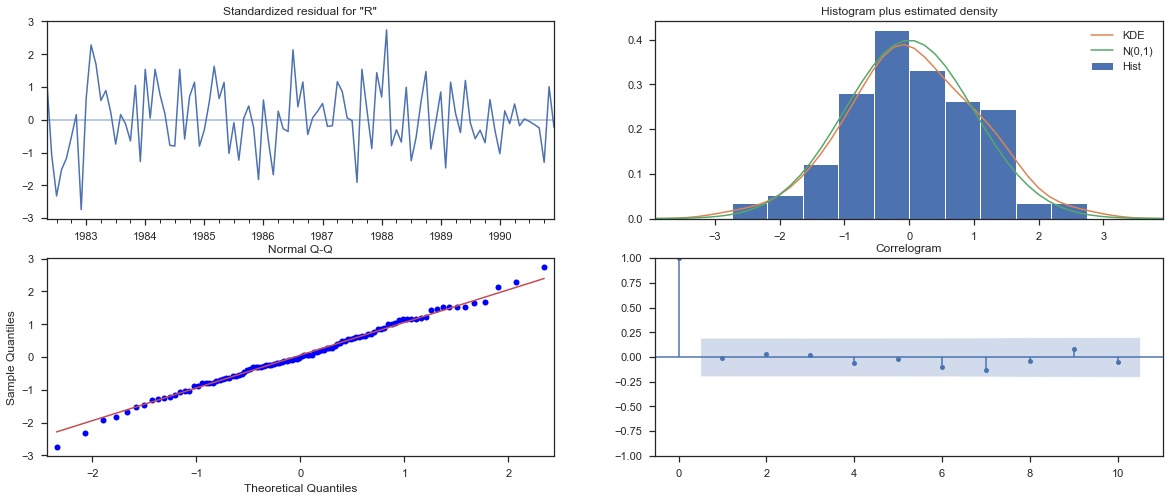

In [383]:
results_manual_SARIMA.plot_diagnostics()
plt.show()

#### Predict on the Test Set using this model and evaluate the model.

In [384]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(test))

In [385]:
predicted_manual_SARIMA.predicted_mean

1991-01-31     47.471958
1991-02-28     63.350260
1991-03-31     65.513191
1991-04-30     67.318195
1991-05-31     61.756065
1991-06-30     72.817684
1991-07-31     71.513609
1991-08-31     67.808154
1991-09-30     77.918394
1991-10-31     73.747864
1991-11-30     97.306179
1991-12-31    127.634864
1992-01-31     41.226583
1992-02-29     59.413313
1992-03-31     61.742027
1992-04-30     62.375864
1992-05-31     57.581837
1992-06-30     67.508967
1992-07-31     67.386952
1992-08-31     62.728563
1992-09-30     73.769407
1992-10-31     68.752815
1992-11-30     93.026458
1992-12-31    122.710487
1993-01-31     36.869591
1993-02-28     54.568196
1993-03-31     57.326451
1993-04-30     57.585556
1993-05-31     53.116069
1993-06-30     62.759841
1993-07-31     62.884426
1993-08-31     58.011927
1993-09-30     69.239213
1993-10-31     64.060470
1993-11-30     88.475033
1993-12-31    118.036466
1994-01-31     32.302175
1994-02-28     49.908103
1994-03-31     52.746957
1994-04-30     52.935978


Text(0, 0.5, 'Wine Units Sold')

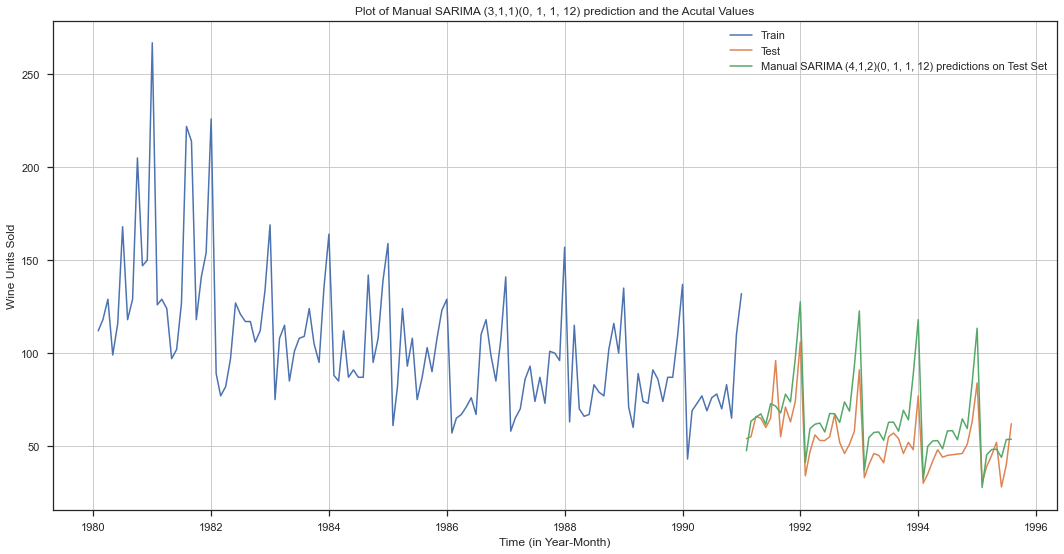

In [386]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(train['Rose_Wine_Sales'], label='Train')
plt.plot(test['Rose_Wine_Sales'], label='Test')

plt.plot(predicted_manual_SARIMA.predicted_mean, label='Manual SARIMA (4,1,2)(0, 1, 1, 12) predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Manual SARIMA (3,1,1)(0, 1, 1, 12) prediction and the Acutal Values');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')

In [387]:
rmse = mean_squared_error(test['Rose_Wine_Sales'],predicted_manual_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Rose_Wine_Sales'],predicted_manual_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 15.907308603450467 
MAPE: 23.712760506785195


In [388]:
temp_resultsDf = pd.DataFrame({'Test RMSE': rmse,'MAPE':mape}
                           ,index=['Manual SARIMA (4, 1, 2)(0, 1, 1, 12)'])


resultsDf_2 = pd.concat([resultsDf_2,temp_resultsDf])

resultsDf_2

Test RMSE       MAPE
Auto ARIMA (2,1,3)                    36.813265  75.839276
Auto SARIMA (3,1,1)(3,0,2,12)         18.881815  36.375208
Manual ARIMA(2,1,2)                   36.870991  76.055446
Manual SARIMA (4, 1, 2)(0, 1, 1, 12)  15.907309  23.712761

## 8. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [389]:
#Combining the tables which contained the exponential smoothing models and ARIMA/SARIMA into one
resultsDf_Final = pd.concat([resultsDf,resultsDf_2])

resultsDf_Final

Test RMSE       MAPE
Linear Regression                                   15.268887        NaN
Naive Model                                         79.718576        NaN
Simple Average                                      53.460367        NaN
2 point TMA                                         11.529278        NaN
4 point TMA                                         14.451376        NaN
6 point TMA                                         14.566262        NaN
9 point TMA                                         14.727596        NaN
Alpha=0.0987,SimpleExponentialSmoothing             36.796036        NaN
Alpha=1.49e-08, Beta=7.389e-09, Double Exponent...  15.268889        NaN
Alpha=0.064,Beta=0.053,Gamma=0.0,Triple Exponen...  21.154527        NaN
Alpha=0.2,Beta=0.85,Gamma=0.15,Triple Exponenti...   9.121757        NaN
Auto ARIMA (2,1,3)                                  36.813265  75.839276
Auto SARIMA (3,1,1)(3,0,2,12)                       18.881815  36.375208
Manual ARIMA(2,1,2)                                 36.870991  76.055446
Manual SARIMA (4, 1, 2)(0, 1, 1, 12)                15.907309  23.712761

In [390]:
resultsDf_Final.sort_values(by='MAPE',ascending=True)

Test RMSE       MAPE
Manual SARIMA (4, 1, 2)(0, 1, 1, 12)                15.907309  23.712761
Auto SARIMA (3,1,1)(3,0,2,12)                       18.881815  36.375208
Auto ARIMA (2,1,3)                                  36.813265  75.839276
Manual ARIMA(2,1,2)                                 36.870991  76.055446
Linear Regression                                   15.268887        NaN
Naive Model                                         79.718576        NaN
Simple Average                                      53.460367        NaN
2 point TMA                                         11.529278        NaN
4 point TMA                                         14.451376        NaN
6 point TMA                                         14.566262        NaN
9 point TMA                                         14.727596        NaN
Alpha=0.0987,SimpleExponentialSmoothing             36.796036        NaN
Alpha=1.49e-08, Beta=7.389e-09, Double Exponent...  15.268889        NaN
Alpha=0.064,Beta=0.053,Gamma=0.0,Triple Exponen...  21.154527        NaN
Alpha=0.2,Beta=0.85,Gamma=0.15,Triple Exponenti...   9.121757        NaN

In [391]:
resultsDf_Final.sort_values(by='Test RMSE',ascending=True)

Test RMSE       MAPE
Alpha=0.2,Beta=0.85,Gamma=0.15,Triple Exponenti...   9.121757        NaN
2 point TMA                                         11.529278        NaN
4 point TMA                                         14.451376        NaN
6 point TMA                                         14.566262        NaN
9 point TMA                                         14.727596        NaN
Linear Regression                                   15.268887        NaN
Alpha=1.49e-08, Beta=7.389e-09, Double Exponent...  15.268889        NaN
Manual SARIMA (4, 1, 2)(0, 1, 1, 12)                15.907309  23.712761
Auto SARIMA (3,1,1)(3,0,2,12)                       18.881815  36.375208
Alpha=0.064,Beta=0.053,Gamma=0.0,Triple Exponen...  21.154527        NaN
Alpha=0.0987,SimpleExponentialSmoothing             36.796036        NaN
Auto ARIMA (2,1,3)                                  36.813265  75.839276
Manual ARIMA(2,1,2)                                 36.870991  76.055446
Simple Average                                      53.460367        NaN
Naive Model                                         79.718576        NaN

## 9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

From the above results we can see that Triple exponential model is the optimum model followed by Trailing moving average models. However lets take TES and Manual SARIMA and predict for the future.

Text(0, 0.5, 'Wine Units Sold')

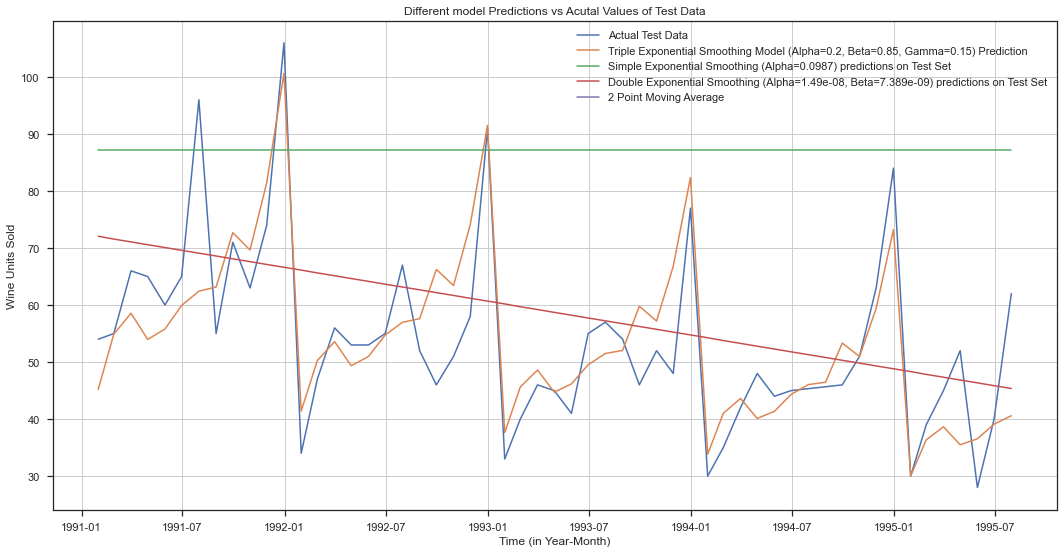

In [392]:
## Plotting on training data

plt.figure(figsize=(18,9))
plt.plot(test['Rose_Wine_Sales'], label='Actual Test Data')

plt.plot(TES_test['predict', 0.2,0.85,0.15], label='Triple Exponential Smoothing Model (Alpha=0.2, Beta=0.85, Gamma=0.15) Prediction')

plt.plot(SES_test['predict'], label='Simple Exponential Smoothing (Alpha=0.0987) predictions on Test Set')

plt.plot(DES_test['predict'], label='Double Exponential Smoothing (Alpha=1.49e-08, Beta=7.389e-09) predictions on Test Set')

plt.plot(MovingAverage['Trailing_2'][-1:len(test)], label='2 Point Moving Average')

plt.legend(loc='best')
plt.grid();
plt.title('Different model Predictions vs Acutal Values of Test Data');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')

Text(0, 0.5, 'Wine Units Sold')

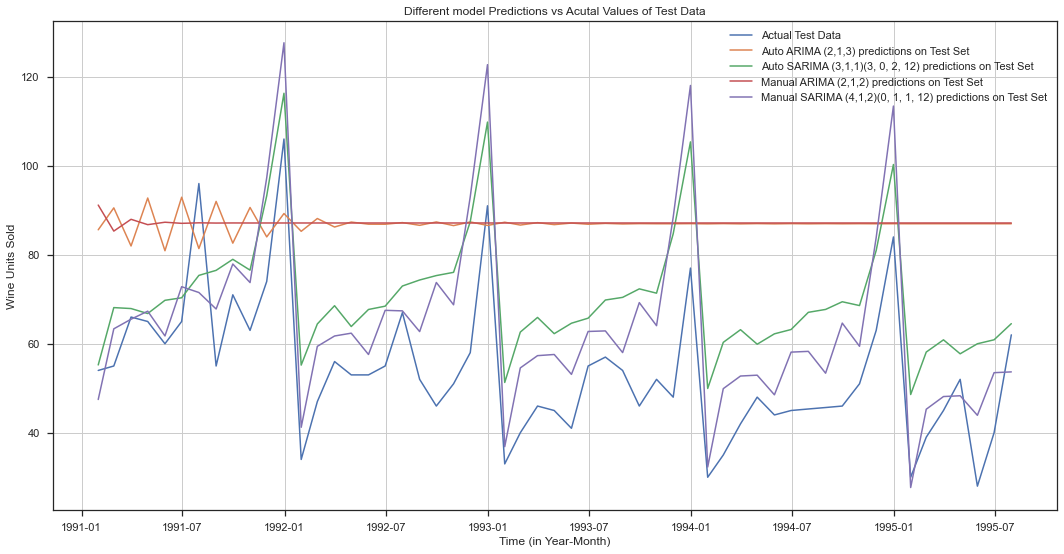

In [393]:
## Plotting on both the Training data

plt.figure(figsize=(18,9))
plt.plot(test['Rose_Wine_Sales'], label='Actual Test Data')

plt.plot(predicted_auto_ARIMA, label='Auto ARIMA (2,1,3) predictions on Test Set')

plt.plot(predicted_auto_SARIMA.predicted_mean, label='Auto SARIMA (3,1,1)(3, 0, 2, 12) predictions on Test Set')

plt.plot(predicted_manual_ARIMA, label='Manual ARIMA (2,1,2) predictions on Test Set')

plt.plot(predicted_manual_SARIMA.predicted_mean, label='Manual SARIMA (4,1,2)(0, 1, 1, 12) predictions on Test Set')


plt.legend(loc='best')
plt.grid();
plt.title('Different model Predictions vs Acutal Values of Test Data');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')

Text(0, 0.5, 'Wine Units Sold')

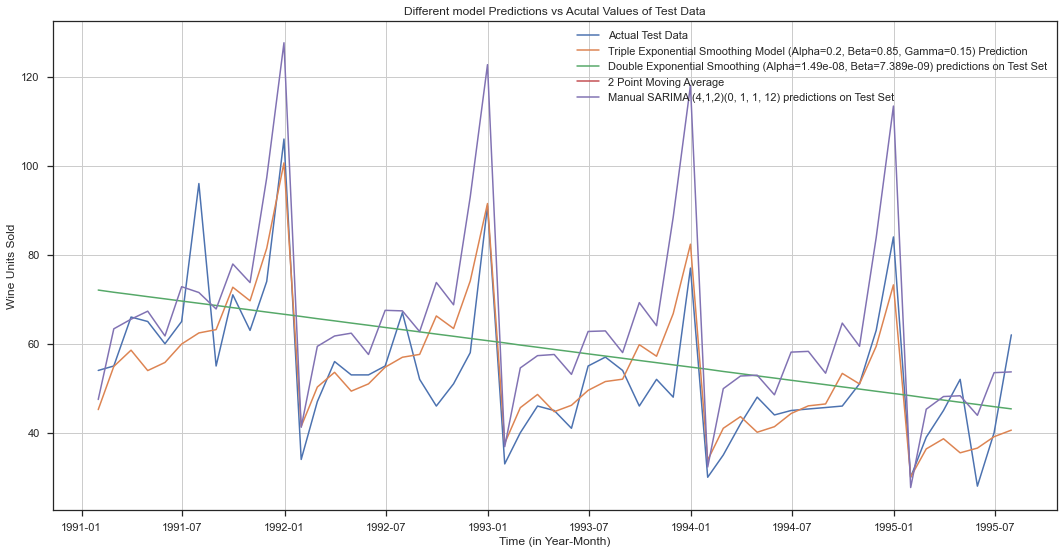

In [394]:
## Plotting on both the Training data

plt.figure(figsize=(18,9))
plt.plot(test['Rose_Wine_Sales'], label='Actual Test Data')

plt.plot(TES_test['predict', 0.2,0.85,0.15], label='Triple Exponential Smoothing Model (Alpha=0.2, Beta=0.85, Gamma=0.15) Prediction')

plt.plot(DES_test['predict'], label='Double Exponential Smoothing (Alpha=1.49e-08, Beta=7.389e-09) predictions on Test Set')

plt.plot(MovingAverage['Trailing_2'][-1:len(test)], label='2 Point Moving Average')

plt.plot(predicted_manual_SARIMA.predicted_mean, label='Manual SARIMA (4,1,2)(0, 1, 1, 12) predictions on Test Set')


plt.legend(loc='best')
plt.grid();
plt.title('Different model Predictions vs Acutal Values of Test Data');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')

## Optimum Model - Triple Exponential Smoothing Model (Alpha=0.2, Beta=0.85, Gamma=0.15)

Text(0, 0.5, 'Wine Units Sold')

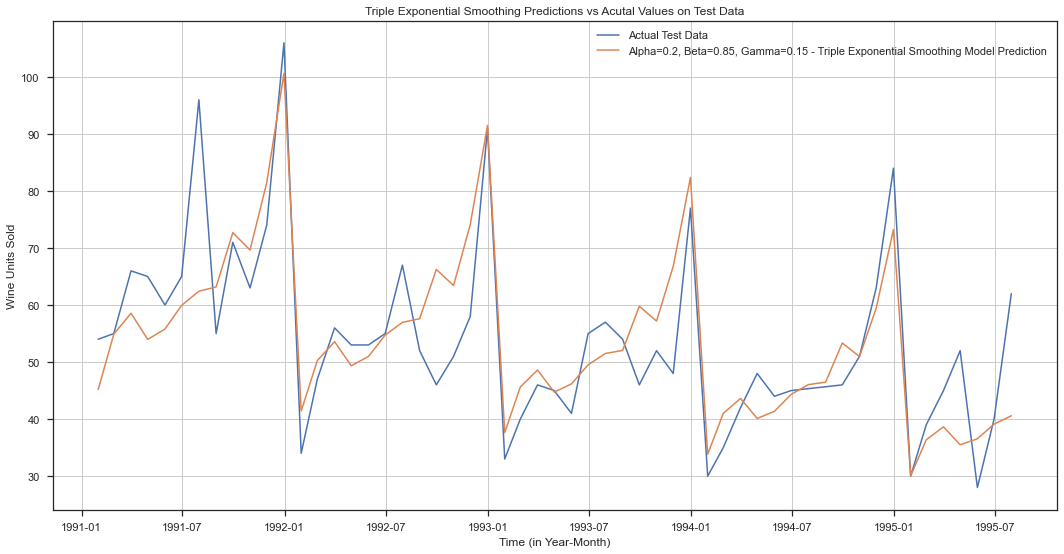

In [395]:
## Plotting on both the Training data

plt.figure(figsize=(18,9))
plt.plot(test['Rose_Wine_Sales'], label='Actual Test Data')

plt.plot(TES_test['predict', 0.2,0.85,0.15], label='Alpha=0.2, Beta=0.85, Gamma=0.15 - Triple Exponential Smoothing Model Prediction')

plt.legend(loc='best')
plt.grid();
plt.title('Triple Exponential Smoothing Predictions vs Acutal Values on Test Data');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')

Text(0, 0.5, 'Wine Units Sold')

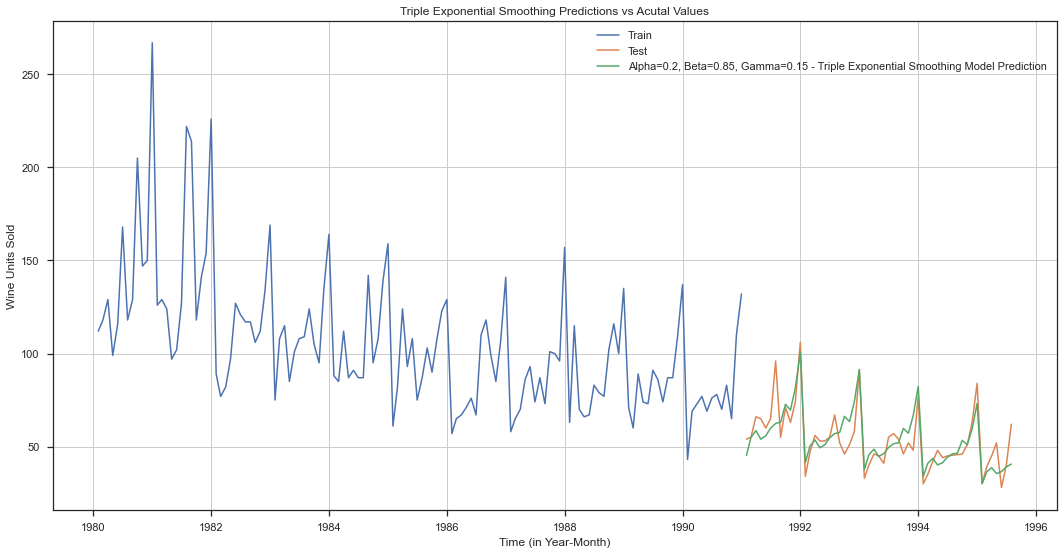

In [396]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(train['Rose_Wine_Sales'], label='Train')
plt.plot(test['Rose_Wine_Sales'], label='Test')

plt.plot(TES_test['predict', 0.2,0.85,0.15], label='Alpha=0.2, Beta=0.85, Gamma=0.15 - Triple Exponential Smoothing Model Prediction')

plt.legend(loc='best')
plt.grid();
plt.title('Triple Exponential Smoothing Predictions vs Acutal Values');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')

In [397]:
TES_Fullmodel = ExponentialSmoothing(df['Rose_Wine_Sales'],trend='additive',seasonal='multiplicative',freq='M').fit(smoothing_level=0.2, smoothing_trend=0.85, smoothing_seasonal=0.15)

In [398]:
TES_Fullmodel.params

{'smoothing_level': 0.2,
 'smoothing_trend': 0.85,
 'smoothing_seasonal': 0.15,
 'damping_trend': nan,
 'initial_level': 50.83255814277326,
 'initial_trend': -0.6381657987079821,
 'initial_seasons': array([2.25583512, 2.42520915, 2.62094925, 2.00941291, 2.40492965,
        2.82008636, 3.17994547, 3.50320751, 3.04727787, 3.04459042,
        3.35309239, 4.94083138]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [399]:
RMSE_fullmodel = metrics.mean_squared_error(df['Rose_Wine_Sales'],TES_Fullmodel.fittedvalues,squared=False)

print('RMSE:',RMSE_fullmodel)

RMSE: 20.7044574261135


In [400]:
# Getting the predictions for the 12 months into the future
prediction = TES_Fullmodel.forecast(steps=12)
print('Forecast of next 12 months')
prediction.tail(12)

Forecast of next 12 months


1995-08-31    38.192836
1995-09-30    39.507936
1995-10-31    41.376231
1995-11-30    49.568179
1995-12-31    70.756166
1996-01-31    28.650607
1996-02-29    36.970781
1996-03-31    44.051727
1996-04-30    45.545566
1996-05-31    40.265771
1996-06-30    45.364841
1996-07-31    48.647156
Freq: M, dtype: float64

Text(0, 0.5, 'Wine Units Sold')

<Figure size 1296x648 with 0 Axes>

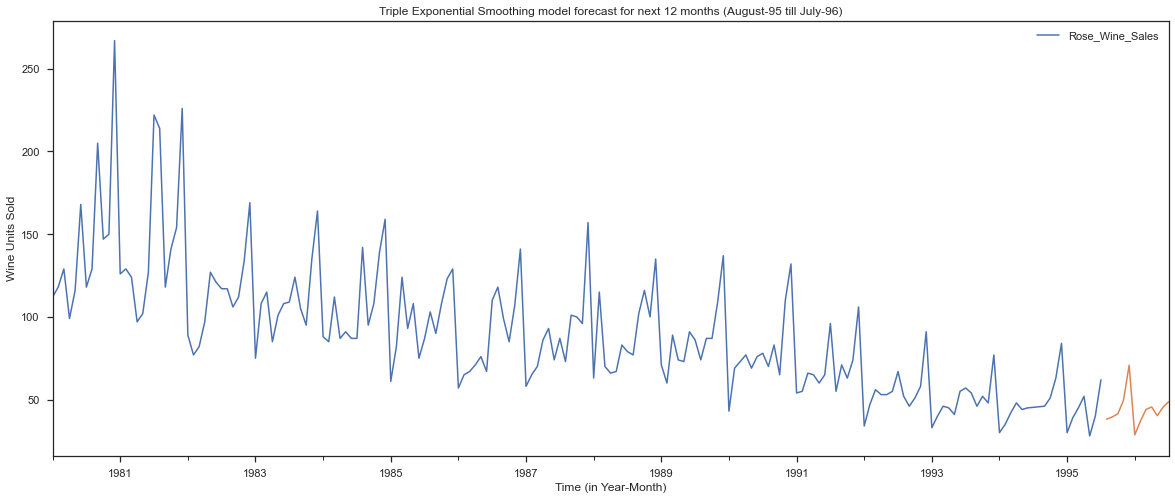

In [401]:
plt.figure(figsize=(18,9))
df.plot()
prediction.plot();
plt.title('Triple Exponential Smoothing model forecast for next 12 months (August-95 till July-96)')
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')

In [402]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
predicted_df = pd.DataFrame({'lower_ci':prediction - (1.96*np.std(TES_Fullmodel.resid,ddof=1)),
                          'prediction':prediction,
                          'upper_ci': prediction + (1.96*np.std(TES_Fullmodel.resid,ddof=1))})
predicted_df.head(12)

lower_ci  prediction    upper_ci
1995-08-31  -2.489648   38.192836   78.875320
1995-09-30  -1.174548   39.507936   80.190420
1995-10-31   0.693747   41.376231   82.058715
1995-11-30   8.885695   49.568179   90.250663
1995-12-31  30.073682   70.756166  111.438650
1996-01-31 -12.031877   28.650607   69.333091
1996-02-29  -3.711703   36.970781   77.653265
1996-03-31   3.369243   44.051727   84.734211
1996-04-30   4.863082   45.545566   86.228050
1996-05-31  -0.416713   40.265771   80.948255
1996-06-30   4.682357   45.364841   86.047325
1996-07-31   7.964672   48.647156   89.329640

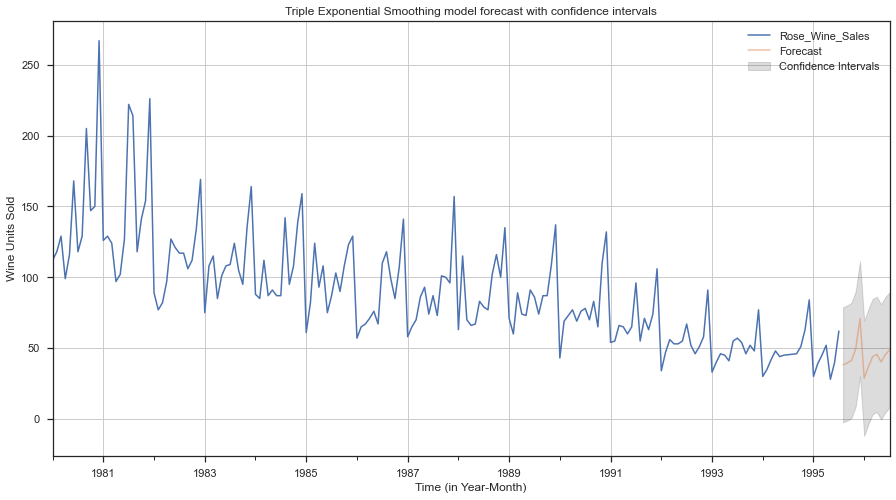

In [403]:
# plot the forecast along with the confidence band

axis = df.plot(label='Actual', figsize=(15,8))
predicted_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(predicted_df.index, predicted_df['lower_ci'], predicted_df['upper_ci'], color='k', alpha=.15,label='Confidence Intervals')
plt.title('Triple Exponential Smoothing model forecast with confidence intervals')
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')
plt.legend(loc='best')
plt.grid()
plt.show()

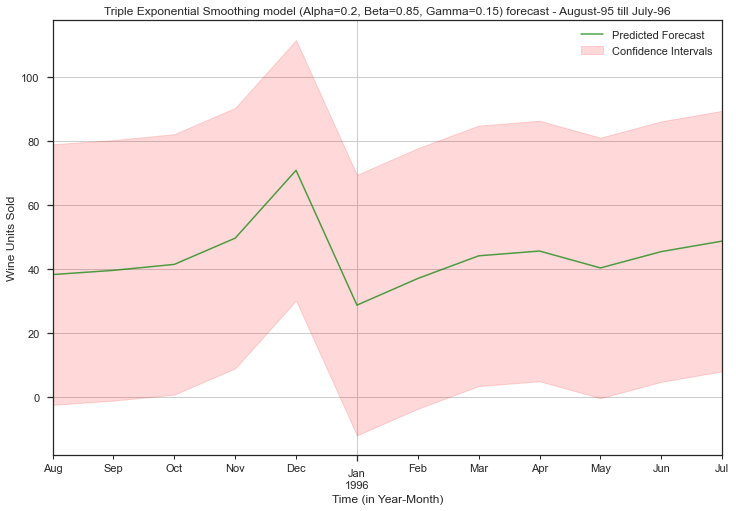

In [404]:
# plot the forecast along with the confidence band
plt.figure(figsize=(12,8))
axis = prediction.plot(color='Green', label='Predicted Forecast', alpha=0.7)
axis.fill_between(predicted_df.index, predicted_df['lower_ci'], predicted_df['upper_ci'], color='Red', alpha=.15, label='Confidence Intervals')
axis.set_title('Triple Exponential Smoothing model (Alpha=0.2, Beta=0.85, Gamma=0.15) forecast - August-95 till July-96')
axis.set_xlabel('Time (in Year-Month)')
axis.set_ylabel('Wine Units Sold')
plt.legend(loc='best')
plt.grid()
plt.show()

## Optimum Model - Manual SARIMA Model (4, 1, 2)(0, 1, 1, 12) 

Text(0, 0.5, 'Wine Units Sold')

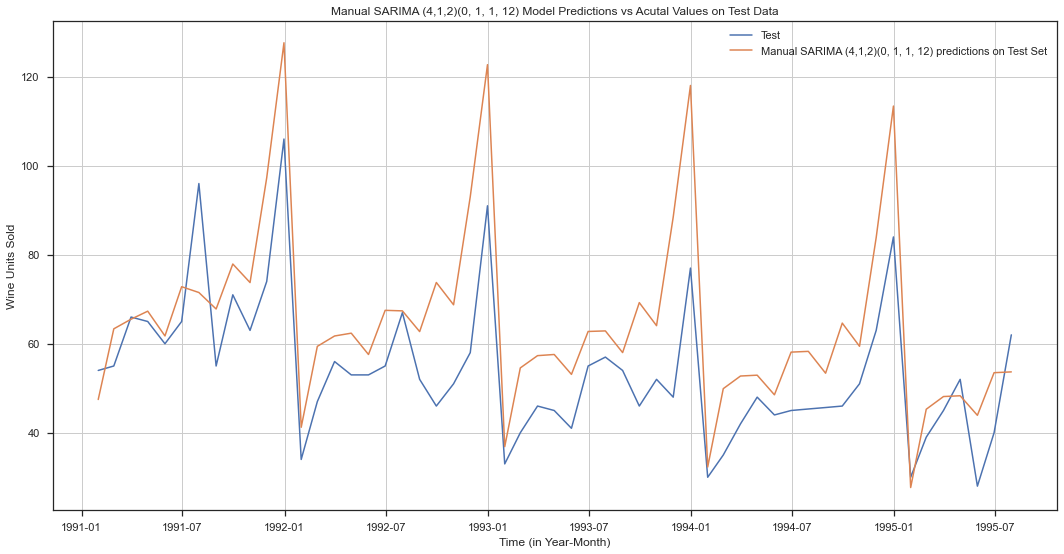

In [405]:
## Plotting on Test data

plt.figure(figsize=(18,9))
plt.plot(test['Rose_Wine_Sales'], label='Test')

plt.plot(predicted_manual_SARIMA.predicted_mean, label='Manual SARIMA (4,1,2)(0, 1, 1, 12) predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Manual SARIMA (4,1,2)(0, 1, 1, 12) Model Predictions vs Acutal Values on Test Data');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')

Text(0, 0.5, 'Wine Units Sold')

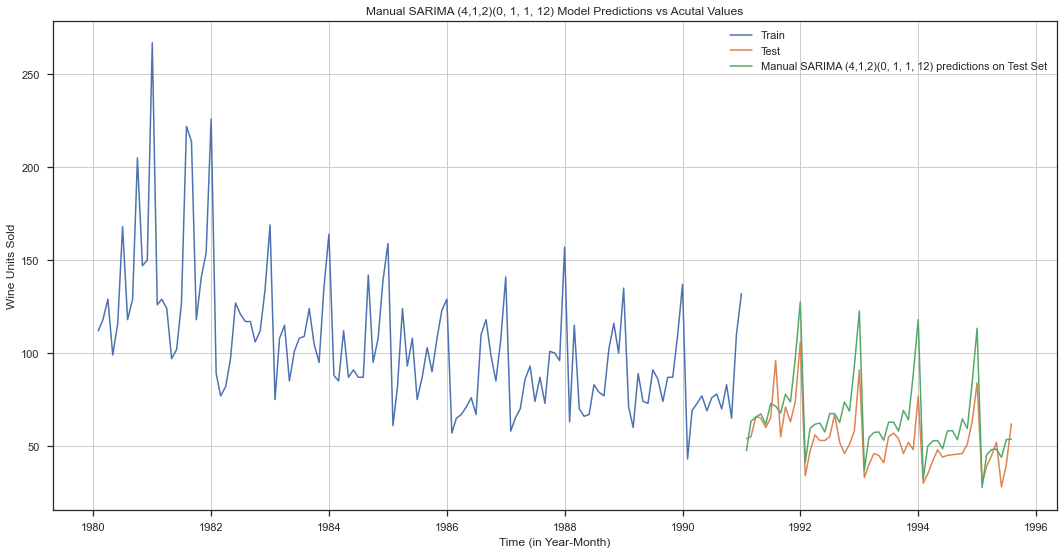

In [406]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(train['Rose_Wine_Sales'], label='Train')
plt.plot(test['Rose_Wine_Sales'], label='Test')

plt.plot(predicted_manual_SARIMA.predicted_mean, label='Manual SARIMA (4,1,2)(0, 1, 1, 12) predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Manual SARIMA (4,1,2)(0, 1, 1, 12) Model Predictions vs Acutal Values');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')

In [407]:
Manual_Sarima_FullModel = sm.tsa.statespace.SARIMAX(df['Rose_Wine_Sales'],
                                order= (4, 1, 2), 
                                seasonal_order= (0, 1, 1, 12), 
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_fullmodel_manual_sarima = Manual_Sarima_FullModel.fit(maxiter=1000)
print(results_fullmodel_manual_sarima.summary())

                                      SARIMAX Results                                       
Dep. Variable:                      Rose_Wine_Sales   No. Observations:                  187
Model:             SARIMAX(4, 1, 2)x(0, 1, [1], 12)   Log Likelihood                -658.935
Date:                              Sun, 23 Oct 2022   AIC                           1333.870
Time:                                      21:38:41   BIC                           1358.421
Sample:                                  01-31-1980   HQIC                          1343.840
                                       - 07-31-1995                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8239      0.083     -9.939      0.000      -0.986      -0.661
ar.L2          0.04

In [408]:
predicted_manual_sarima_full_data = results_fullmodel_manual_sarima.get_forecast(steps=12)
predicted_manual_sarima_full_data.summary_frame(alpha=0.05).head()

Rose_Wine_Sales       mean    mean_se  mean_ci_lower  mean_ci_upper
1995-08-31       48.272248  15.053370      18.768185      77.776311
1995-09-30       44.985078  15.830766      13.957347      76.012809
1995-10-31       45.475017  15.889160      14.332835      76.617198
1995-11-30       54.807633  15.899171      23.645831      85.969434
1995-12-31       81.904878  15.913902      50.714203     113.095553

In [409]:
predicted_manual_sarima_df = predicted_manual_sarima_full_data.summary_frame(alpha=0.05)
predicted_manual_sarima_df

Rose_Wine_Sales       mean    mean_se  mean_ci_lower  mean_ci_upper
1995-08-31       48.272248  15.053370      18.768185      77.776311
1995-09-30       44.985078  15.830766      13.957347      76.012809
1995-10-31       45.475017  15.889160      14.332835      76.617198
1995-11-30       54.807633  15.899171      23.645831      85.969434
1995-12-31       81.904878  15.913902      50.714203     113.095553
1996-01-31       25.671442  16.199778      -6.079539      57.422423
1996-02-29       33.894947  16.307905       1.932041      65.857852
1996-03-31       40.048092  16.589848       7.532589      72.563596
1996-04-30       44.383650  16.657861      11.734843      77.032458
1996-05-31       31.339014  16.872204      -1.729898      64.407925
1996-06-30       39.915558  16.946299       6.701423      73.129694
1996-07-31       52.375724  17.156264      18.750063      86.001384

In [410]:
rmse_manual_sarima_full = metrics.mean_squared_error(df['Rose_Wine_Sales'],results_fullmodel_manual_sarima.fittedvalues,squared=False)

rmse_manual_sarima_full

32.21833348721485

In [411]:
# Getting the predictions for the 12 months into the future
prediction_manual_sarima_full = results_fullmodel_manual_sarima.forecast(steps=12)
prediction_manual_sarima_full.tail(12)

1995-08-31    48.272248
1995-09-30    44.985078
1995-10-31    45.475017
1995-11-30    54.807633
1995-12-31    81.904878
1996-01-31    25.671442
1996-02-29    33.894947
1996-03-31    40.048092
1996-04-30    44.383650
1996-05-31    31.339014
1996-06-30    39.915558
1996-07-31    52.375724
Freq: M, Name: predicted_mean, dtype: float64

Text(0, 0.5, 'Wine Units Sold')

<Figure size 1296x648 with 0 Axes>

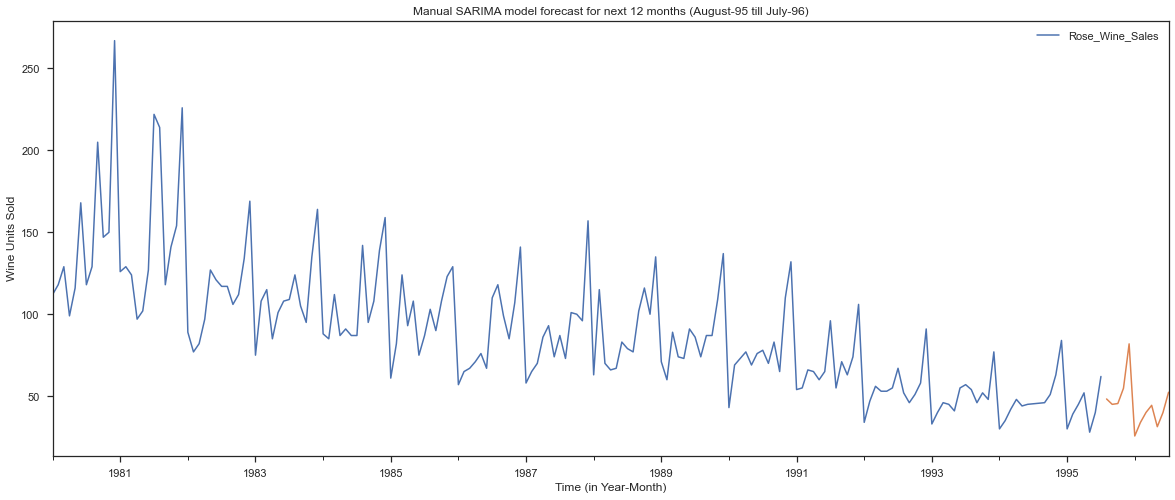

In [412]:
plt.figure(figsize=(18,9))
df.plot()
prediction_manual_sarima_full.plot();
plt.title('Manual SARIMA model forecast for next 12 months (August-95 till July-96)')
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')

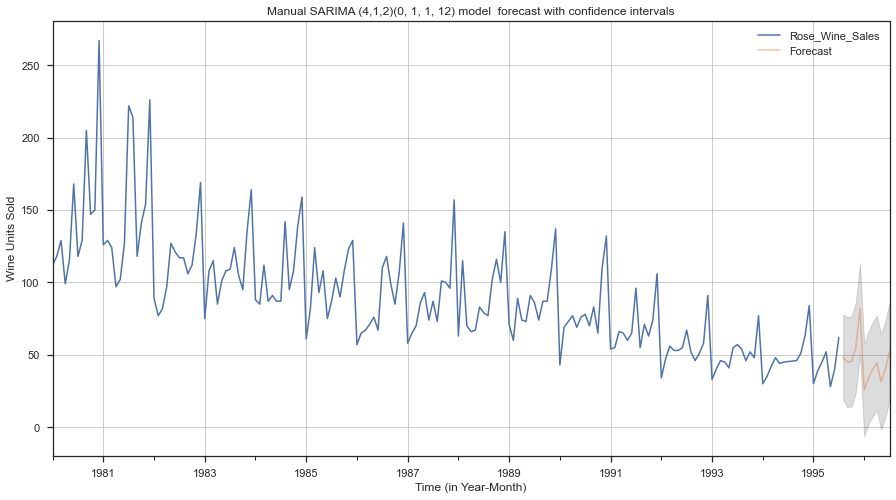

In [413]:
# plot the forecast along with the confidence band

axis = df.plot(label='Actual', figsize=(15,8))
predicted_manual_sarima_df['mean'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(predicted_manual_sarima_df.index, predicted_manual_sarima_df['mean_ci_lower'], predicted_manual_sarima_df['mean_ci_upper'], color='k', alpha=.15)
plt.title('Manual SARIMA (4,1,2)(0, 1, 1, 12) model  forecast with confidence intervals')
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')
plt.legend(loc='best')
plt.grid()
plt.show()

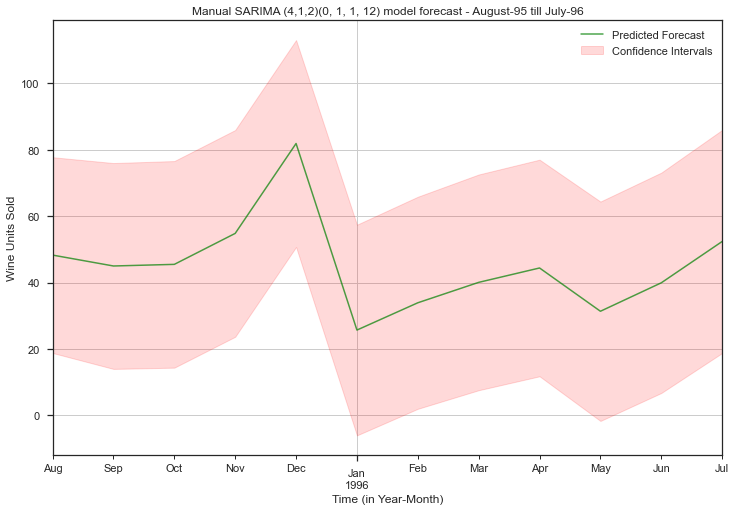

In [414]:
# plot the forecast along with the confidence band
plt.figure(figsize=(12,8))
axis = predicted_manual_sarima_df['mean'].plot(color='Green', label='Predicted Forecast', alpha=0.7)
axis.fill_between(predicted_manual_sarima_df.index, predicted_manual_sarima_df['mean_ci_lower'], predicted_manual_sarima_df['mean_ci_upper'], color='Red', alpha=.15, label='Confidence Intervals')
axis.set_title('Manual SARIMA (4,1,2)(0, 1, 1, 12) model forecast - August-95 till July-96')
axis.set_xlabel('Time (in Year-Month)')
axis.set_ylabel('Wine Units Sold')
plt.legend(loc='best')
plt.grid()
plt.show()

## 10. Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.

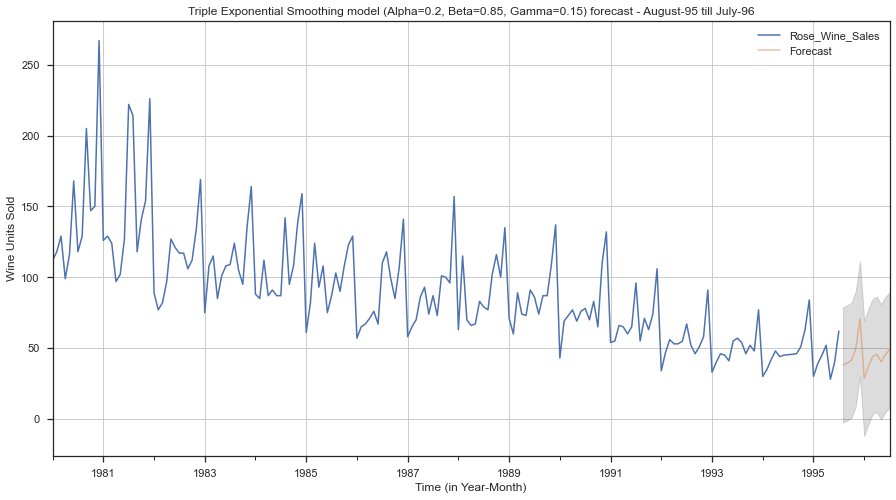

In [415]:
# plot the forecast along with the confidence band

axis = df.plot(label='Actual', figsize=(15,8))
predicted_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(predicted_df.index, predicted_df['lower_ci'], predicted_df['upper_ci'], color='k', alpha=.15)
plt.title('Triple Exponential Smoothing model (Alpha=0.2, Beta=0.85, Gamma=0.15) forecast - August-95 till July-96')
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')
plt.legend(loc='best')
plt.grid()
plt.show()

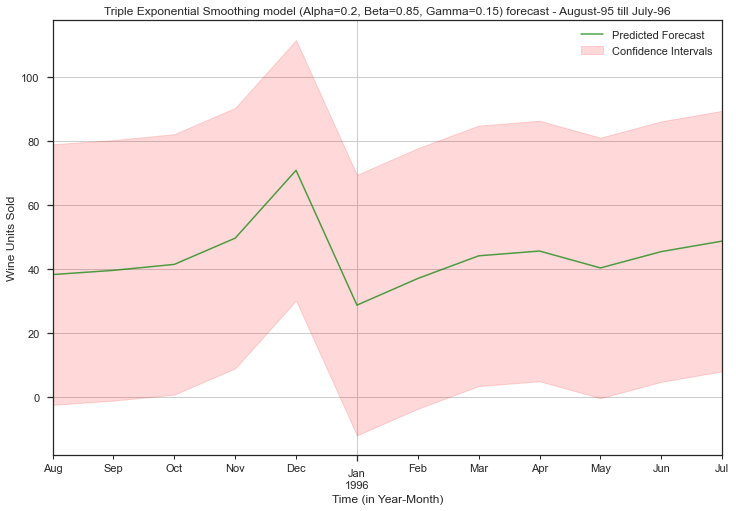

In [416]:
# plot the forecast along with the confidence band
plt.figure(figsize=(12,8))
axis = prediction.plot(color='Green', label='Predicted Forecast', alpha=0.7)
axis.fill_between(predicted_df.index, predicted_df['lower_ci'], predicted_df['upper_ci'], color='Red', alpha=.15, label='Confidence Intervals')
axis.set_title('Triple Exponential Smoothing model (Alpha=0.2, Beta=0.85, Gamma=0.15) forecast - August-95 till July-96')
axis.set_xlabel('Time (in Year-Month)')
axis.set_ylabel('Wine Units Sold')
plt.legend(loc='best')
plt.grid()
plt.show()

In [417]:
TES_Fullmodel.forecast(steps=12)

1995-08-31    38.192836
1995-09-30    39.507936
1995-10-31    41.376231
1995-11-30    49.568179
1995-12-31    70.756166
1996-01-31    28.650607
1996-02-29    36.970781
1996-03-31    44.051727
1996-04-30    45.545566
1996-05-31    40.265771
1996-06-30    45.364841
1996-07-31    48.647156
Freq: M, dtype: float64

In [418]:
TES_Fullmodel.forecast(steps=12).describe()

count    12.000000
mean     44.074816
std      10.146313
min      28.650607
25%      39.179161
50%      42.713979
75%      46.320964
max      70.756166
dtype: float64

In [419]:
#Calculating the percentage of sales in the last 4 months
(39+41+49+70)/TES_Fullmodel.forecast(steps=12).sum()

0.3762541670646793

We needed to construct an optimum model to forecast the rose wine sales for the next 12 months. The model information, insights and recommendations are as follows.  


Model Insights:

•	The time series in consideration exhibits a declining trend and stable seasonality. When comparing the various models, we can see that Triple Exponential Smoothing and SARIMA models frequently deliver the greatest results. This is due to the fact that these models are excellent at predicting time series that demonstrate trend and seasonality. Apart from these Double Exponential Smoothing and Moving Average Models also tend to perform moderately good.
•	We examine the root mean squared value of the forecast model to assess its performance (RMSE). The model with the lowest RMSE value and characteristics that match the test data is regarded as being a superior model.
•	We observed that Triple Exponential Smoothing model had the lowest RMSE and the characteristics that most closely fit test data. As a result, its regarded as the best model for forecasting.
Historical Insights:
•	The rose wine sales have declined throughout time. Rose wine sales peaked in 1980 & 1981 and fell to their present low position in 1995 (as we have data for only first 7 months). 
•	The monthly sales trajectory appears to be exactly the opposite of the yearly plot, with a progressive increase towards the end of each year. January has the lowest wine sales, while December has the highest. From January to August, sales increase gradually, and then they quickly increase after that.
•	The average monthly sales of Rose wine are 90 bottles. More than 50% of the sold units of rose wine fall between 62 and 111. 28 units were sold as the lowest and 267 units as the most. Only 20% of monthly sales that were recorded were for more than 120 units.
•	Around 70 to 75 percent of the units sold are fewer than 100, and 90% of the units sold are less than 150. Only 15% of sales involved more than 50 items. Therefore, it is clear that the bulk of sales were in the range of 50 to 100 units.


Forecast Insights:

•	Based on the forecast made by the Triple Exponential Smoothing model previously presented, the following insights are offered.
•	The forecast calls for average sale of 44 units, down by 45 units from the historical average of 89 units. Thus, we might observe an alarming decrease in average sales by 50%.
•	The prediction for minimum sales volume of 28 units equals the minimum sales volume in the past. Consequently, a no percentage change could be seen in minimum quantity sold.
•	The projection estimates a maximum sales volume of 70 units, which is 197 units fewer than the largest sales volume recorded in the past, which was 267 units. Consequently, a 73% decrease in maximum sales is visible.
•	In comparison to the historical standard deviation of 62 recorded in the past, the forecast's standard deviation is 10 units, or 52 units lower. It's gone down by 83%. This is not anticipated because historical data tends to have less volatility than future data.
•	We can see from the prediction that the months of October, November, and December have increased sales. December is often when the sales are at their highest. There is a startling decline in sales in January following December. The months after January appear to witness a gradual improvement in sales until October, when it jumps sharply.



Recommendations:

•	Records show that the months of September, October, November, and December account for 40% of the total sales forecast. Many festivities take place in these months, and many people travel during this time. One of the most premium types of wine used during festive and event celebrations is rose wine.
•	Wine sales often climb in the final two months of the year as people hurry to buy holiday beverages. For forthcoming occasions like Thanksgiving, Christmas, and New Year's, people typically stock up. The majority of individuals also buy in bulk for holiday gatherings and gift-giving. 
•	Many individuals choose wine as their go-to gift when it comes to occasions like parties and gift-giving. Sales of Rose wine rise just before the winter holidays as more collectors purchase these wines as presents or look for vintages to serve at holiday gatherings.
•	This blush wine works nicely with nearly anything, including spicy dishes, sushi, salads, grilled meats, roasts, and rich sauces. It is well renowned for its outdoor-friendly drinking style.
•	The festival seasons may vary depending on where you are geographically, however the most of the celebrations take place in the last four months.
	In these months, promotional offers might be implemented to lower costs and significantly boost revenue.
	To increase sales, we must take advantage of all holiday events and set prices appropriately.
	Many individuals order in bulk to prepare for upcoming festivities, which may result in a high shipping expenditure. Businesses may provide significant discounts or free shipping beyond a certain threshold at these times.
	Giving customers gifts to improve their user experience is one of the greatest marketing strategies to deploy. In order to attract more consumers and increase sales, the company might provide free gifts on orders with significant sales.
	To target various client demographics, the proper marketing campaigns must be run
	Numerous ecommerce campaigns and competitions may be performed to broaden the product's audience and enhance sales.
•	The period from January to June is one of the key challenges for Rose wine sales.
	To identify the elements affecting sales, in-depth market research must be conducted.
	Due to the fact that rose wines are premium category of wine, a market-friendly version of the existing product might be introduced by the company, helping to make up for the drop in sales. Long-term, this may bring in additional clients.
•	There are other key elements that might be driving the sales, despite the present model's ability to closely track the historical sales trend.
	The forecast might be improved by doing in-depth market research on the factors that influence sales and incorporating that information into the model for projection.
